<a href="https://colab.research.google.com/github/innewiadro/YachtPriceForecast/blob/main/YachtPriceForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project

The project predicts the price of a yacht using machine learning. The aim of this project is to find a suitable regression technique that can predict the price of a yacht.

The project has developed code that retrieves data from the website https://www.yachtworld.co.uk. It is based on the development of linear regression, polynomial regression, ridge regression and decision tree regression. The project demonstrates regression techniques with different correlations.

#Imports

Importing the necessary libraries in this project.

In [ ]:
import os
import time
import random
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, ARDRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from yellowbrick.classifier import confusion_matrix
from google.colab import drive
from time import sleep
drive.mount('/content/drive')

Mounted at /content/drive


#Introduction

The yachting industry stands as a symbol of luxury, adventure, and leisure, captivating enthusiasts and wanderers alike. As the demand for yachts continues to evolve, understanding the factors influencing their prices becomes essential for both buyers and sellers. This project delves into realm of predicting yacht prices through the application of regression analysis.

**Project Background:**


Yacht prices are influenced by a myriad of factors, ranging from technical specifications and amenities to the whims of the market. Using the power of regression models, I aim to unravel the complex relationships between these features and the final price tag of a yacht. The ability to accurately predict yacht prices not only empowers potential buyers to make informed decisions, but also provides sellers with a valuable tool for pricing their offerings competitively.

**Objective:**


The primary objective of this project is to develop a regression model that can predict yacht prices based on various features and characteristics. By analyzing historical data encompassing yacht specifications, amenities, and their corresponding prices, I aim to create a robust predictive model that offers insights into how different attributes contribute to the overall valuation of a yacht.

**Importance:**


The implementation of an accurate regression model holds immense practical significance. Potential buyers can benefit from an estimated price range when considering yacht options, ensuring that they receive fair value for their investment. Similarly, yacht manufacturers and sellers can optimize their pricing strategies by gaining insights into which features influence prices the most. This project bridges the gap between data-driven analysis and the complex world of luxury yacht pricing.

**Approach:**


I will embark on this journey by first collecting and preprocessing a comprehensive dataset containing details of various yachts along with their corresponding prices. Exploratory data analysis will shed light on data distributions, correlations, and potential outliers. Armed with this understanding, I will proceed to select relevant features and construct a regression model using appropriate algorithms. The model will be trained and evaluated rigorously to ensure its predictive capabilities.



In summary, this project endeavors to decode the intricate relationship between yacht features and their prices, contributing to a better-informed yachting community and a deeper understanding of the luxury market dynamics.

#Webscrapper

Webscrapper to get information about yachts from https://www.yachtworld.co.uk/.

Download content from a single ad page

In [ ]:
def get_page(condition, power_or_sail, type_of_yacht, page_number, type_of_sort):
  url = f'https://www.yachtworld.co.uk/boats-for-sale/condition-{condition}/type-{power_or_sail}/class-{power_or_sail}-{type_of_yacht}/page-{page_number}/sort-updated:{type_of_sort}/'
  try:
    response = requests.get(url)
    content = response.content
    sleep(1)
    return content
  except:
    print('Fail')

Download links to each ad from a page of 15 ads

In [ ]:
def parse_url(content):
  soup = BeautifulSoup(content, 'html.parser')
  links = soup.find_all('a', {'class': 'inner'})
  return ['https://www.yachtworld.co.uk' + link['href'] for link in links]

Extract ad details from a single URL

In [ ]:
def get_yacht(link, sleep_time=2):
  yacht_data = {}

  response = requests.get(link)
  url = link
  content = response.content
  soup = BeautifulSoup(content, "html.parser")


  try:
    script = soup.find_all("script")[11].text.strip()[20:]
    data_json = json.loads(script)
  except:
    print("fail json")
    print(url)
    return {}

  id = data_json['app']['data']["id"]

  try:
    model = data_json['app']['data']['model']
  except:
    model = None

  try:
    condition = data_json['app']['data']['condition']
  except:
      condition = None

  try:
    year_of_production = data_json['app']['data']['year']
  except:
        year_of_production = None

  try:
    price = data_json['app']['data']['price']['type']['amount']['EUR']
  except:
    price = None

  try:
    yacht_class = data_json['app']['data']['class']
  except:
    yacht_class = None

  try:
    yacht_classes = data_json['app']['data']['classes']
  except:
    yacht_classes = None

  try:
    yacht_type = data_json['app']['data']['type']
  except:
    yacht_type = None

  try:
    fuel_type = data_json['app']['data']['fuelType']
  except:
    fuel_type = None

  try:
    hull_material = data_json['app']['data']['hull']['material']
  except:
    hull_material = None

  try:
    hull_shape = data_json['app']['data']['hull']['shape']
  except:
    hull_shape = None

    data_json['app']['data']['hull']['includesBowsprit']

  try:
    bowsprit = data_json['app']['data']['hull']['includesBowsprit']
  except:
    bowsprit = None

  try:
    length = data_json['app']['data']['specifications']['dimensions']['lengths']['overall']['m']
  except:
    length = None

  try:
    beam = data_json['app']['data']['specifications']['dimensions']['beam']['m']

  except:
    beam = None

  try:
    maxDraft = data_json['app']['data']['specifications']['dimensions']['maxDraft']['m']

  except:
    maxDraft = None

  # cabines

  try:
    number_of_cabins = data_json['app']['data']['specifications']['accommodation']['cabins']
  except:
    number_of_cabins = 0

  try:
    doubleBerths = data_json['app']['data']['specifications']['accommodation']['doubleBerths']
  except:
    doubleBerths = 0

  try:
    twinBerths = data_json['app']['data']['specifications']['accommodation']['twinBerths']
  except:
    twinBerths = 0

  try:
    singleBerths = data_json['app']['data']['specifications']['accommodation']['singleBerths']
  except:
    singleBerths = 0

  try:
    heads = data_json['app']['data']['specifications']['accommodation']['heads']
  except:
    heads = 0

  try:
    bathrooms = data_json['app']['data']['specifications']['accommodation']['bathrooms']
  except:
    bathrooms = 0

  try:
    number_of_cabins_2 =  doubleBerths + twinBerths + singleBerths
  except:
    number_of_cabins_2 =  0

  #speed and range

  try:
    cruisingSpeed = data_json['app']['data']['specifications']['speedDistance']['cruisingSpeed']['kn']
  except:
    cruisingSpeed = None

  try:
    maxHullSpeed = data_json['app']['data']['specifications']['speedDistance']['maxHullSpeed']['kn']
  except:
    maxHullSpeed = None

  try:
    range_in_mi = data_json['app']['data']['specifications']['speedDistance']['range']['nmi']
  except:
    range_in_mi = None

  # engines
  engines = {}
  try:
    number_of_engines = len(data_json['app']['data']['propulsion']['engines'])
  except:
    number_of_engines = 0
  for i in range(len(data_json['app']['data']['propulsion']['engines'])):
    try:
      engines[i] = data_json['app']['data']['propulsion']['engines'][i]['power']['hp']
    except:
      engines[i] = 0

  horse_power_sum = sum(engines.values())

  try:
    number_of_photos = data_json['app']['data']['media'][::-1][0]["sortOrder"] + 1
  except:
    number_of_photos = None

  yacht_data.update({'id': id, 'url': url, 'condition': condition, "year_of_production": year_of_production, "price": price,"yacht_class": yacht_class, "yacht_classes": yacht_classes, 'yacht_type': yacht_type,
                "fuel_type": fuel_type, "hull_material": hull_material, "hull_shape": hull_shape, "bowsprit": bowsprit,
                "length": length, 'beam': beam,'maxDraft': maxDraft, 'cruisingSpeed': cruisingSpeed,'maxHullSpeed': maxHullSpeed,
                'range_in_mi': range_in_mi, 'number_of_engines': number_of_engines,'engines': engines, 'horse_power_sum': horse_power_sum,
                'number_of_cabins': number_of_cabins,'number_of_cabins_2': number_of_cabins_2,"bathrooms":bathrooms,'heads':heads,
                'number_of_photos': number_of_photos})

  sleep(random.uniform(0.1, sleep_time))

  return yacht_data

Extract data from each ad in the list of ads

In [ ]:
def get_data(condition, power_or_sail, type_of_yacht, type_of_sort, start_page, end_page):
  yachts_list = []
  for page_number in range(start_page, end_page + 1):
    content = get_page(condition, power_or_sail, type_of_yacht, page_number, type_of_sort)
    urls = parse_url(content)
    for i, url in enumerate(urls):
      yacht = get_yacht(url)
      yachts_list.append(yacht)
      sleep(1./100)
      if i % 14 == 0:
        print(f'Downloaded {i} yachts from page {page_number}')
  return yachts_list

Requirements for downloading the relevant URL

In [ ]:
condition="used"
power_or_sail="power"
type_of_yacht="cruiser"

The get_data function is called 2 times because the URL limits the scan of the ads to 250 pages. To get more data, the download is done twice: the first time starting with the freshest ads and the second time starting with the oldest ads. In this way, 2 times as much data is downloaded.

In [ ]:
data_asc = get_data(condition, power_or_sail, type_of_yacht,'asc', 1, 250)

In [ ]:
data_desc = get_data(condition, power_or_sail, type_of_yacht, 'desc', 1, 250)

Create a folder on Google Drive

In [ ]:
!mkdir '/content/drive/My Drive/data_science_projects/YachtPriceForecast/data'

Save data to a json file

In [ ]:
from google.colab import drive

def save_json(file_path, data):
    drive.mount('/content/drive')
    with open('/content/drive/My Drive/' + file_path, 'w') as f:
        json.dump(data, f)

Storage location

In [ ]:
links_desc = save_json('data_science_projects/YachtPriceForecast/data/motor_yacht_1_to_250_page_desc.json', data_desc)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
links_asc = save_json('data_science_projects/YachtPriceForecast/data/motor_yacht_1_to_250_page_asc.json', data_asc)

Combine all downloaded data into one file

In [ ]:
def merge_data(file_path_list, file_path):
  data = []

  for i in os.listdir(file_path_list):
    print(i)
    yachts_list = load_json_file(file_path + i)
    data.extend(yachts_list)
  return data

motor_yacht_1_to_80_page_asc.json
motor_yacht_1_to_80_page_desc.json
motor_yacht_81_to_160_page_asc.json
motor_yacht_80_to_250_page_desc.json
motor_yacht_201_to_250_page_asc.json
motor_yacht_161_to_200_page_asc.json


In [ ]:
file_path_list = 'drive/MyDrive/data_science_projects/YachtPriceForecast/data/'
file_path = 'data_science_projects/YachtPriceForecast/data/'

In [ ]:
data = merge_data(file_path_list, file_path)

Save the combined data to Google Drive

In [ ]:
save_json('data_science_projects/YachtPriceForecast/data/data.json', data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Analysis and Data Exploration

##Data source

The data came from https://www.yachtworld.co.uk/ and was obtained using the webscrapper application. The data was saved in a folder on Google Drive.

Data such as:

- **id:** Unique identifier of the yacht.
- **url:** URL that points to a page containing detailed information about the yacht.
- **condition:** The technical condition of the yacht (new, used, etc.). Used yachts are downloaded for the project.
- **year_of_production:** Year of production of the yacht.
- **price:** Yacht price.
- **yacht_class:** Main class for yacht.
- **yacht_classes:** Subclass for a yacht.
- **yacht_type:** Type of yacht (e.g. motor, sailing, catamaran, etc.). Motor yachts alone were downloaded for the project.
- **fuel_type:** Type of fuel used by the yacht.
- **hull_material:** Hull material of the yacht.
- **hull_shape:** The shape of the yacht's hull.
- **bowsprit:** Information about the foresail (whether the yacht has a foresail).
- **length:** Yacht length.
- **beam:** The width of the yacht.
- **maxDraft:** Maximum draught of the yacht.
- **cruisingSpeed:** Average cruising speed of the yacht.
- **maxHullSpeed:** Maximum cruising speed of the yacht.
- **range_in_mi:** Yacht's range expressed in nautical miles.
- **number_of_engines:** Number of engines of the yacht.
- **engines:** Information about the yacht's engines.
- **horse_power_sum:** Sum of the power of all the engines.
- **number_of_cabins:** Number of cabins on the yacht.
- **number_of_cabins_2:** Another column with information about the number of cabins on the yacht.
- **bathrooms:** Number of bathrooms on the yacht.
- **heads:** Number of toilets (WC) on the yacht.
- **number_of_photos:** Number of photos available for the yacht.

##Load data

Load a json file of data from Google Drive

In [ ]:
def load_json_file(file_path):
  with open('/content/drive/MyDrive/' + file_path, 'r') as f:
      json_data = json.load(f)
  return json_data

In [ ]:
data = load_json_file('data_science_projects/YachtPriceForecast/data/data.json')

Create a Data Frame

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

id                                                url condition  \
0     5625176.0  https://www.yachtworld.co.uk/yacht/2002-cranch...      used   
1     5624169.0  https://www.yachtworld.co.uk/yacht/2007-atlant...      used   
2     5428459.0  https://www.yachtworld.co.uk/yacht/2008-bertra...      used   
3     5895772.0  https://www.yachtworld.co.uk/yacht/2007-ferret...      used   
4     6194015.0  https://www.yachtworld.co.uk/yacht/2014-draco-...      used   
...         ...                                                ...       ...   
7510  8575370.0  https://www.yachtworld.co.uk/yacht/2012-sunsee...      used   
7511  8946778.0  https://www.yachtworld.co.uk/yacht/2003-benete...      used   
7512  8485810.0  https://www.yachtworld.co.uk/yacht/2004-chapar...      used   
7513  8729930.0  https://www.yachtworld.co.uk/yacht/1999-admira...      used   
7514  8474618.0  https://www.yachtworld.co.uk/yacht/2019-benete...      used   

      year_of_production      price    yacht_class  \
0                 2002.0  166070.66  power-cruiser   
1                 2007.0  322915.17  power-cruiser   
2                 2008.0  750000.00  power-cruiser   
3                 2007.0  442855.09  power-cruiser   
4                 2014.0   70000.00  power-cruiser   
...                  ...        ...            ...   
7510              2012.0  525457.14    power-motor   
7511              2003.0   88747.90  power-cruiser   
7512              2004.0   46005.24  power-cruiser   
7513              1999.0  880000.00  power-cruiser   
7514              2019.0  375000.00  power-cruiser   

                       yacht_classes yacht_type fuel_type hull_material  ...  \
0                      [power-motor]      power    diesel    fiberglass  ...   
1                               None      power    diesel    fiberglass  ...   
2     [power-flybridge, power-fresh]      power    diesel    fiberglass  ...   
3                      [power-motor]      power    diesel    fiberglass  ...   
4                               None      power  gasoline    fiberglass  ...   
...                              ...        ...       ...           ...  ...   
7510                 [power-cruiser]      power    diesel    fiberglass  ...   
7511                   [power-motor]      power    diesel    fiberglass  ...   
7512                            None      power  gasoline    fiberglass  ...   
7513                            None      power    diesel      aluminum  ...   
7514    [power-cruiser, power-motor]      power    diesel    fiberglass  ...   

     maxHullSpeed range_in_mi  number_of_engines               engines  \
0             NaN         NaN                2.0  {'0': 370, '1': 370}   
1             NaN         NaN                0.0                    {}   
2             NaN         NaN                2.0      {'0': 0, '1': 0}   
3             NaN         NaN                2.0  {'0': 575, '1': 575}   
4             NaN         NaN                1.0            {'0': 300}   
...           ...         ...                ...                   ...   
7510         30.0         NaN                2.0  {'0': 435, '1': 435}   
7511          NaN         NaN                2.0  {'0': 285, '1': 285}   
7512          NaN         NaN                1.0            {'0': 375}   
7513          NaN         NaN                0.0                    {}   
7514          NaN         NaN                2.0  {'0': 300, '1': 300}   

      horse_power_sum  number_of_cabins  number_of_cabins_2  bathrooms  heads  \
0               740.0               0.0                 0.0        0.0    0.0   
1                 0.0               0.0                 0.0        0.0    0.0   
2                 0.0               3.0                 6.0        2.0    0.0   
3              1150.0               0.0                 0.0        0.0    0.0   
4               300.0               2.0                 4.0        1.0    1.0   
...               ...               ...                 ...        

In [ ]:
list(df.columns.values.tolist())

['id',
 'url',
 'condition',
 'year_of_production',
 'price',
 'yacht_class',
 'yacht_classes',
 'yacht_type',
 'fuel_type',
 'hull_material',
 'hull_shape',
 'bowsprit',
 'length',
 'beam',
 'maxDraft',
 'cruisingSpeed',
 'maxHullSpeed',
 'range_in_mi',
 'number_of_engines',
 'engines',
 'horse_power_sum',
 'number_of_cabins',
 'number_of_cabins_2',
 'bathrooms',
 'heads',
 'number_of_photos']

Extracting a dataset where yachts do not have a price. The data can then be used to verify the models.

In [ ]:
df_price_nan = df[df['price'].isna()]
df_price_nan

id                                                url condition  \
21    5785456.0  https://www.yachtworld.co.uk/yacht/2016-pershi...      used   
51    6916602.0  https://www.yachtworld.co.uk/yacht/1989-baglie...      used   
84    7864775.0  https://www.yachtworld.co.uk/yacht/1989-riva-4...      used   
131   7223240.0  https://www.yachtworld.co.uk/yacht/1964-benett...      used   
154   8119604.0  https://www.yachtworld.co.uk/yacht/2005-innova...      used   
...         ...                                                ...       ...   
7315  8622646.0  https://www.yachtworld.co.uk/yacht/2018-cranch...      used   
7327  8525818.0  https://www.yachtworld.co.uk/yacht/2009-carnev...      used   
7357  8839904.0  https://www.yachtworld.co.uk/yacht/1990-baia-6...      used   
7358  8845850.0  https://www.yachtworld.co.uk/yacht/2012-azimut...      used   
7378  8185646.0  https://www.yachtworld.co.uk/yacht/1999-mangus...      used   

      year_of_production  price    yacht_class      yacht_classes yacht_type  \
21                2016.0    NaN  power-cruiser               None      power   
51                1989.0    NaN  power-cruiser  [power-flybridge]      power   
84                1989.0    NaN  power-cruiser               None      power   
131               1964.0    NaN  power-cruiser               None      power   
154               2005.0    NaN  power-cruiser               None      power   
...                  ...    ...            ...                ...        ...   
7315              2018.0    NaN  power-cruiser    [power-trawler]      power   
7327              2009.0    NaN  power-cruiser      [power-motor]      power   
7357              1990.0    NaN  power-cruiser               None      power   
7358              2012.0    NaN  power-trawler    [power-cruiser]      power   
7378              1999.0    NaN    power-motor    [power-cruiser]      power   

     fuel_type hull_material  ... maxHullSpeed range_in_mi  number_of_engines  \
21      diesel    fiberglass  ...        46.00       280.0                2.0   
51      diesel      aluminum  ...        32.00         NaN                2.0   
84      diesel    fiberglass  ...        32.00         NaN                2.0   
131     diesel         steel  ...        15.50         NaN                0.0   
154     diesel         other  ...          NaN         NaN                2.0   
...        ...           ...  ...          ...         ...                ...   
7315    diesel    fiberglass  ...        27.00         NaN                2.0   
7327    diesel    fiberglass  ...        16.74         NaN                2.0   
7357    diesel    fiberglass  ...          NaN         NaN                2.0   
7358    diesel    fiberglass  ...        17.00         NaN                2.0   
7378    diesel    fiberglass  ...          NaN         NaN                0.0   

                     engines  horse_power_sum  number_of_cabins  \
21    {'0': 1623, '1': 1623}           3246.0               3.0   
51          {'0': 0, '1': 0}              0.0               0.0   
84      {'0': 575, '1': 575}           1150.0               2.0   
131                       {}              0.0               0.0   
154     {'0': 260, '1': 260}            520.0               2.0   
...                      ...              ...               ...   
7315    {'0': 375, '1': 375}            750.0               3.0   
7327  {'0': 1360, '1': 1360}           2720.0               4.0   
7357  {'0': 1000, '1': 1000}           2000.0               0.0   
7358    {'0': 425, '1': 425}            850.0               3.0   
7378                      {}              0.0               3.0   

      number_of_cabins_2  bathrooms  heads number_of_photos  
21                   0.0        3.0    3.0             48.0  
51                   0.0        0.0    5.0             70.0  
84                   0.0        2.0    2.0             25.0  
131                  0.0        0.0    6.0             29.0  
154

In [ ]:
df_price_nan.isna().sum()

id                     5
url                    5
condition              5
year_of_production     5
price                 82
yacht_class            5
yacht_classes         47
yacht_type             5
fuel_type              5
hull_material          5
hull_shape            47
bowsprit              82
length                 5
beam                   5
maxDraft              27
cruisingSpeed         35
maxHullSpeed          39
range_in_mi           78
number_of_engines      5
engines                5
horse_power_sum        5
number_of_cabins       5
number_of_cabins_2     5
bathrooms              5
heads                  5
number_of_photos       5
dtype: int64

In [ ]:
zero_counts = (df_price_nan == 0).sum()
zero_counts

id                     0
url                    0
condition              0
year_of_production     0
price                  0
yacht_class            0
yacht_classes          0
yacht_type             0
fuel_type              0
hull_material          0
hull_shape             0
bowsprit               0
length                 0
beam                   0
maxDraft               0
cruisingSpeed          0
maxHullSpeed           0
range_in_mi            0
number_of_engines     10
engines                0
horse_power_sum       19
number_of_cabins      17
number_of_cabins_2    41
bathrooms             32
heads                 11
number_of_photos       0
dtype: int64

Delete rows in the 'price' column where the value is Nan

In [ ]:
df = df.dropna(subset=['price'])

Reset indexes in the Data Frame

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

id                                                url condition  \
0     5625176.0  https://www.yachtworld.co.uk/yacht/2002-cranch...      used   
1     5624169.0  https://www.yachtworld.co.uk/yacht/2007-atlant...      used   
2     5428459.0  https://www.yachtworld.co.uk/yacht/2008-bertra...      used   
3     5895772.0  https://www.yachtworld.co.uk/yacht/2007-ferret...      used   
4     6194015.0  https://www.yachtworld.co.uk/yacht/2014-draco-...      used   
...         ...                                                ...       ...   
7428  8575370.0  https://www.yachtworld.co.uk/yacht/2012-sunsee...      used   
7429  8946778.0  https://www.yachtworld.co.uk/yacht/2003-benete...      used   
7430  8485810.0  https://www.yachtworld.co.uk/yacht/2004-chapar...      used   
7431  8729930.0  https://www.yachtworld.co.uk/yacht/1999-admira...      used   
7432  8474618.0  https://www.yachtworld.co.uk/yacht/2019-benete...      used   

      year_of_production      price    yacht_class  \
0                 2002.0  166070.66  power-cruiser   
1                 2007.0  322915.17  power-cruiser   
2                 2008.0  750000.00  power-cruiser   
3                 2007.0  442855.09  power-cruiser   
4                 2014.0   70000.00  power-cruiser   
...                  ...        ...            ...   
7428              2012.0  525457.14    power-motor   
7429              2003.0   88747.90  power-cruiser   
7430              2004.0   46005.24  power-cruiser   
7431              1999.0  880000.00  power-cruiser   
7432              2019.0  375000.00  power-cruiser   

                       yacht_classes yacht_type fuel_type hull_material  ...  \
0                      [power-motor]      power    diesel    fiberglass  ...   
1                               None      power    diesel    fiberglass  ...   
2     [power-flybridge, power-fresh]      power    diesel    fiberglass  ...   
3                      [power-motor]      power    diesel    fiberglass  ...   
4                               None      power  gasoline    fiberglass  ...   
...                              ...        ...       ...           ...  ...   
7428                 [power-cruiser]      power    diesel    fiberglass  ...   
7429                   [power-motor]      power    diesel    fiberglass  ...   
7430                            None      power  gasoline    fiberglass  ...   
7431                            None      power    diesel      aluminum  ...   
7432    [power-cruiser, power-motor]      power    diesel    fiberglass  ...   

     maxHullSpeed range_in_mi  number_of_engines               engines  \
0             NaN         NaN                2.0  {'0': 370, '1': 370}   
1             NaN         NaN                0.0                    {}   
2             NaN         NaN                2.0      {'0': 0, '1': 0}   
3             NaN         NaN                2.0  {'0': 575, '1': 575}   
4             NaN         NaN                1.0            {'0': 300}   
...           ...         ...                ...                   ...   
7428         30.0         NaN                2.0  {'0': 435, '1': 435}   
7429          NaN         NaN                2.0  {'0': 285, '1': 285}   
7430          NaN         NaN                1.0            {'0': 375}   
7431          NaN         NaN                0.0                    {}   
7432          NaN         NaN                2.0  {'0': 300, '1': 300}   

      horse_power_sum  number_of_cabins  number_of_cabins_2  bathrooms  heads  \
0               740.0               0.0                 0.0        0.0    0.0   
1                 0.0               0.0                 0.0        0.0    0.0   
2                 0.0               3.0                 6.0        2.0    0.0   
3              1150.0               0.0                 0.0        0.0    0.0   
4               300.0               2.0                 4.0        1.0    1.0   
...               ...               ...                 ...        

##Basic data information

Display information about the data in the Data Frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7433 non-null   float64
 1   url                 7433 non-null   object 
 2   condition           7433 non-null   object 
 3   year_of_production  7433 non-null   float64
 4   price               7433 non-null   float64
 5   yacht_class         7433 non-null   object 
 6   yacht_classes       5023 non-null   object 
 7   yacht_type          7433 non-null   object 
 8   fuel_type           7431 non-null   object 
 9   hull_material       7433 non-null   object 
 10  hull_shape          3797 non-null   object 
 11  bowsprit            13 non-null     object 
 12  length              7279 non-null   float64
 13  beam                7219 non-null   float64
 14  maxDraft            4827 non-null   float64
 15  cruisingSpeed       2453 non-null   float64
 16  maxHul

From the above exercise, it can be seen that there is a lot of Nan in some columns. Using expert knowledge, it is impossible to complete these data using the remaining columns.

Description of the data from the Data Frame

In [ ]:
df.describe()

id  year_of_production         price       length  \
count  7.433000e+03         7433.000000  7.433000e+03  7279.000000   
mean   8.609178e+06         2006.255348  3.465381e+05    12.647931   
std    6.714097e+05           11.814812  7.435265e+05    20.446458   
min    5.784180e+05         1902.000000  9.210000e+00     1.220000   
25%    8.526371e+06         2001.000000  5.996996e+04     9.200000   
50%    8.833681e+06         2007.000000  1.380986e+05    11.020000   
75%    8.954506e+06         2015.000000  3.505013e+05    13.690000   
max    9.021770e+06         2024.000000  1.706293e+07  1210.000000   

              beam     maxDraft  cruisingSpeed  maxHullSpeed   range_in_mi  \
count  7219.000000  4827.000000    2453.000000   2270.000000    386.000000   
mean      4.425686     1.463261      22.472609     30.516101    457.276503   
std      17.054554     7.335506      10.072848     10.454888   1069.391273   
min       0.100000     0.050000       4.000000      5.000000     65.000000   
25%       3.000000     0.890000      18.000000     25.000000    200.000000   
50%       3.560000     0.990000      23.000000     30.410000    271.865000   
75%       4.220000     1.120000      26.070000     36.000000    350.000000   
max     581.000000   210.000000     258.000000    120.000000  13034.000000   

       number_of_engines  horse_power_sum  number_of_cabins  \
count        7433.000000      7433.000000       7433.000000   
mean            1.687878       654.677822          1.080587   
std             0.620110       745.914876          1.282108   
min             0.000000         0.000000          0.000000   
25%             1.000000       225.290000          0.000000   
50%             2.000000       520.000000          1.000000   
75%             2.000000       760.000000          2.000000   
max             5.000000      8130.000000         11.000000   

       number_of_cabins_2    bathrooms        heads  number_of_photos  
count         7433.000000  7433.000000  7433.000000       7423.000000  
mean             1.977129     0.387999     1.356115         32.101711  
std              2.176549     0.886829     4.010756         22.254651  
min              0.000000     0.000000     0.000000          1.000000  
25%              0.000000     0.000000     1.000000         17.000000  
50%              2.000000     0.000000     1.000000         26.000000  
75%              4.000000     0.000000     2.000000         41.000000  
max             20.000000     8.000000   320.000000        255.000000

**CONCLUSIONS:**

Looking at the minimum and maximum values, it is clear that some of the data is incorrect. It is most likely that they were filled in incorrectly on the form by the advertisement. For example, this applies to the columns ***'length'***, ***'beam'***, ***'maxDraft'***, ***'cruisingSpeed'***.

##Charts and basic analysis

###Features

Generates pairplots for selected variables, with ***'price'*** as the variable on the y-axis. The graphs are generated for the variables specified in *selected_vars*.

In [ ]:
def plot_pairplot(df, y_vars, selected_vars):
  sns.pairplot(df, y_vars=y_vars, x_vars=selected_vars)
  plt.show()

Generate of a boxplot for prices ***'price'*** depending on the year of production ***'year_of_production'***

In [ ]:
def plot_boxplot(df):
  data = pd.concat([df['price'], df['year_of_production']], axis=1)

  f, ax = plt.subplots(figsize=(20, 10))
  fig = sns.boxplot(x=df['year_of_production'], y='price', data=data)
  fig.axis(ymin=0, ymax=7000000)
  plt.xticks(rotation=90)

  plt.show()

Correlation is a statistical measure that describes the strength and direction of a linear relationship between two variables. The correlation result is in the range from -1 to 1, where:

- **1** indicates a perfect positive correlation (when one variable increases, the other also increases linearly),
- **-1** indicates a perfect negative correlation (when one variable increases, the other decreases linearly),
- **0** indicates no linear correlation between the variables.

The ***df.corr()*** function calculates the correlation for all pairs of variables in the DataFrame and returns a matrix where the values on the diagonal are always 1 (correlation of a variable with itself), and the remaining elements reflect the correlation between the respective pairs of variables. This correlation matrix is very useful in data analysis, especially in identifying relationships between variables.

Creation and display of a correlation heatmap

In [ ]:
def plot_correlation_heatmap(df):
  plt.figure(figsize=(14, 14))

  ax = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12})
  ax.set_title('Correlation Heatmap', fontsize=20)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
  plt.show()

Create and display a heatmap of the most highly correlated features. Adjust the *top_n* parameter to select the desired number of top features to display.

In [ ]:
def plot_top_correlation_heatmap(df, target_column, top_n=10):
  correlation_matrix = df.corr()

  top_features = correlation_matrix.nlargest(top_n, target_column)[target_column].index
  top_correlation_matrix = df[top_features].corr()

  plt.figure(figsize=(12, 10))
  ax = sns.heatmap(top_correlation_matrix, annot=True, annot_kws={"size": 14})
  ax.set_title(f'Top {top_n} Correlated Features Heatmap', fontsize=20)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
  plt.show()

Create and display the scatterplot of ***'x'*** versus ***'y'***, coloured by ***'hue'***

In [ ]:
def plot_scatter_x_vs_y(df, x, y, hue):
  plt.figure(figsize=(15, 8))
  sns.scatterplot(x=x, y=y, data=df, hue=hue)
  plt.show()

###Charts

Example pairplot diagrams

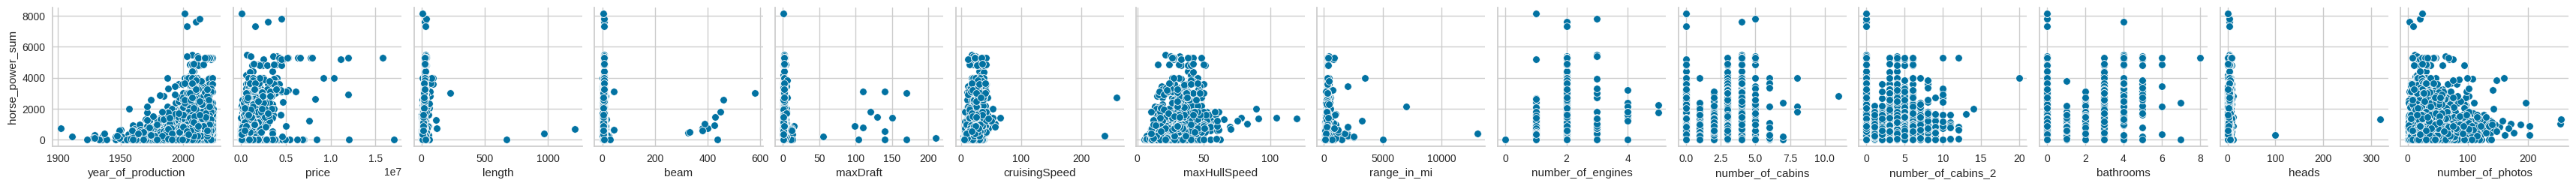

In [ ]:
plot_pairplot(df, 'horse_power_sum', ['year_of_production', 'price', 'length', 'beam', 'maxDraft',
                            'cruisingSpeed', 'maxHullSpeed', 'range_in_mi', 'number_of_engines',
                            'number_of_cabins', 'number_of_cabins_2',
                            'bathrooms', 'heads', 'number_of_photos'])

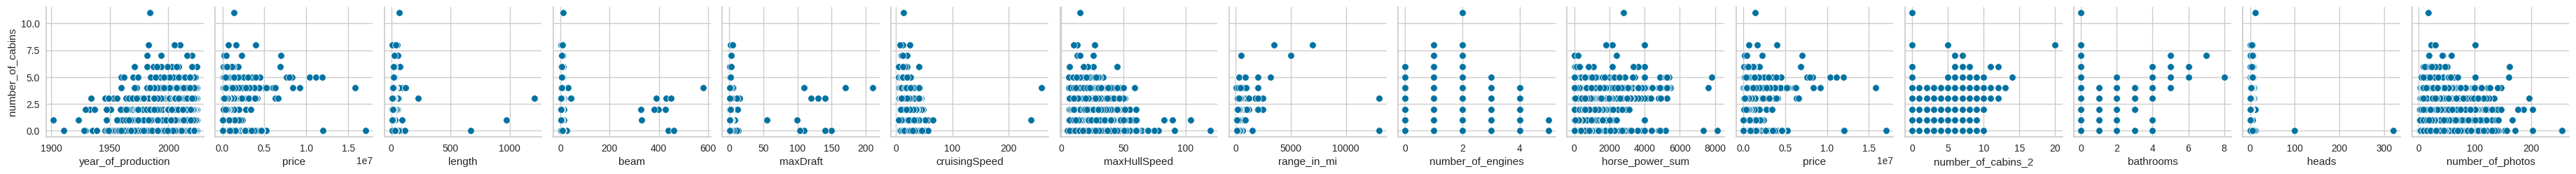

In [ ]:
plot_pairplot(df, 'number_of_cabins', ['year_of_production', 'price', 'length', 'beam', 'maxDraft',
                            'cruisingSpeed', 'maxHullSpeed', 'range_in_mi', 'number_of_engines',
                            'horse_power_sum', 'price', 'number_of_cabins_2',
                            'bathrooms', 'heads', 'number_of_photos'])

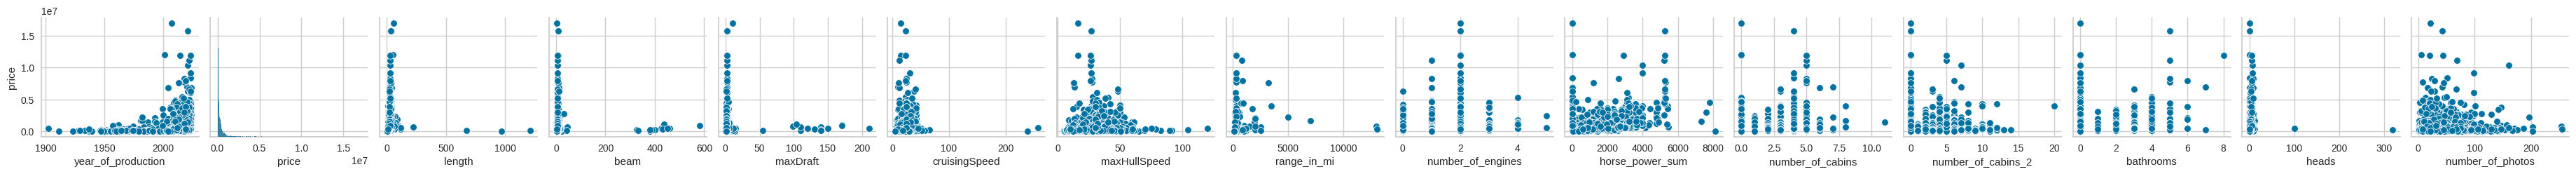

In [ ]:
plot_pairplot(df, 'price', ['year_of_production', 'price', 'length', 'beam', 'maxDraft',
                            'cruisingSpeed', 'maxHullSpeed', 'range_in_mi', 'number_of_engines',
                            'horse_power_sum', 'number_of_cabins', 'number_of_cabins_2',
                            'bathrooms', 'heads', 'number_of_photos'])

**CONCLUSIONS:**

The pair plot diagrams show that there are many nulls, errors and outliers in the data. In the remainder of the project the data will be cleaned and supplemented using various methods.

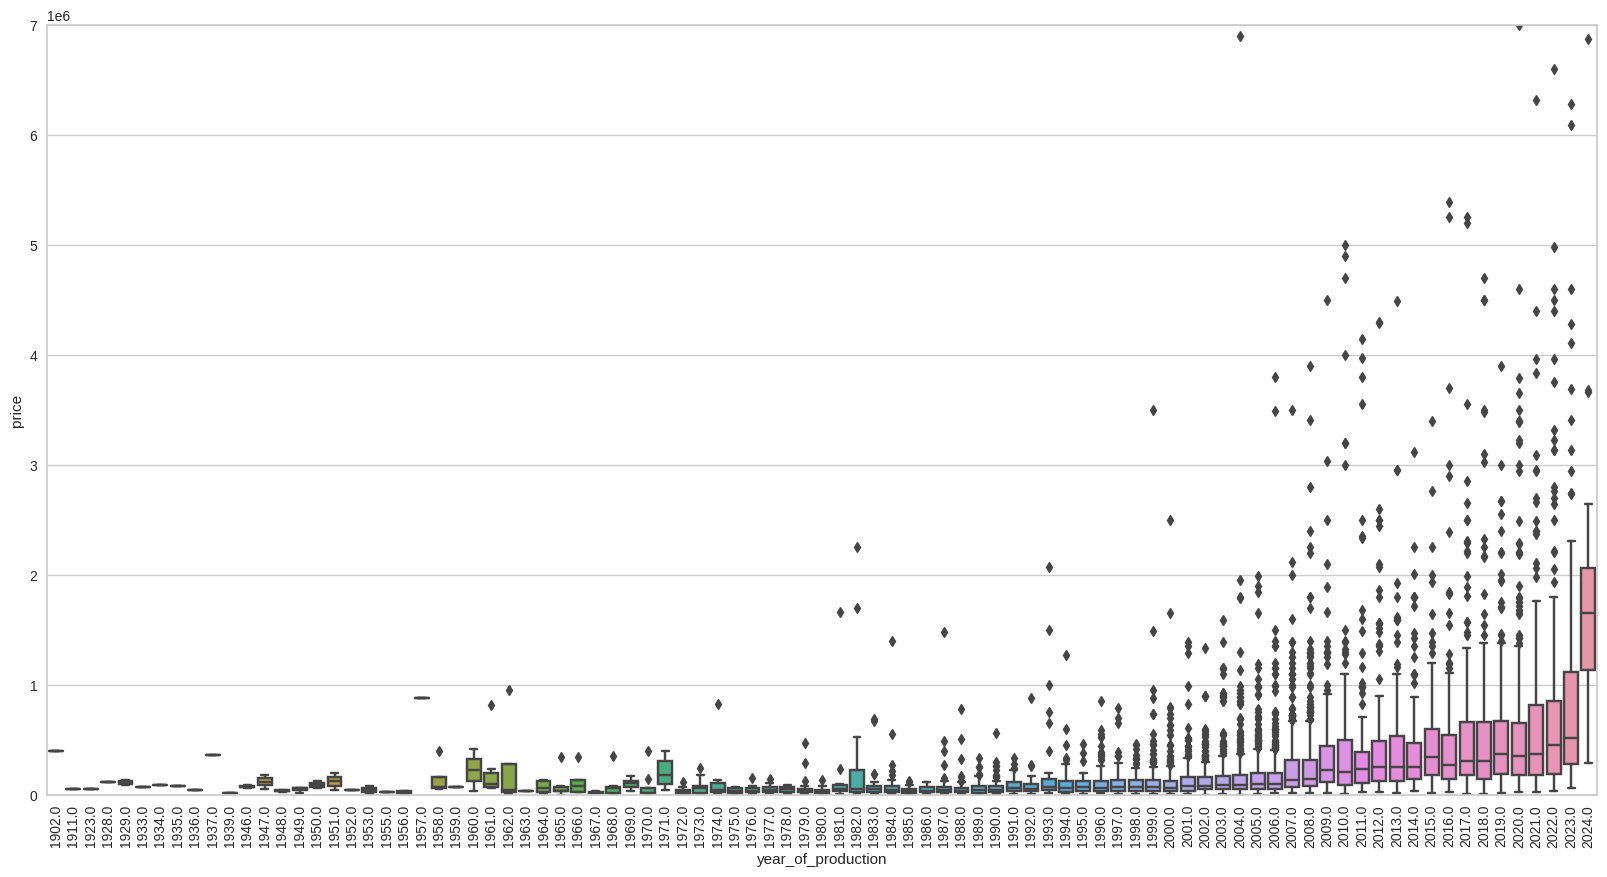

In [ ]:
plot_boxplot(df)

**CONCLUSIONS:**

The box plot above allows to see the distribution of prices by year of production and to identify outliers and characteristics of the price distribution by year. The data contains a large number of top outliners.

<ipython-input-18-c33774997c52>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


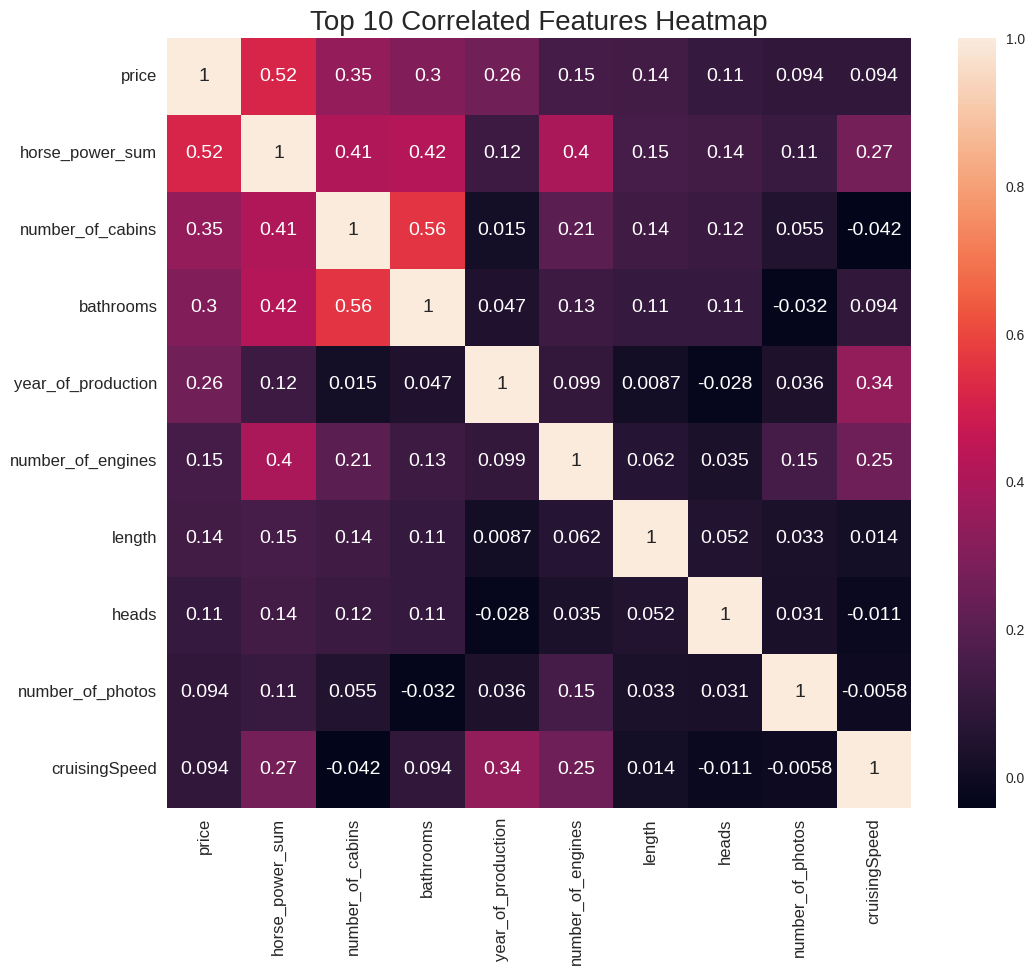

In [ ]:
plot_top_correlation_heatmap(df, 'price', top_n=10)

**CONCLUSIONS:**

**Horse power sum:** The correlation is about 0.516, indicating a moderate positive correlation. The higher the horsepower, the higher the price of the vehicle.

**Number of cabins:** The correlation is approximately 0.349, indicating a positive correlation. A higher number of cabins may lead to a higher vehicle price.

**Bathrooms (number of bathrooms):** The correlation is approximately 0.300, indicating a moderate positive correlation. A higher number of bathrooms may be associated with a higher price.

**Year of construction:** The correlation is around 0.261, indicating a moderate positive correlation. Older cars may be associated with a lower price.

**Number of engines:** The correlation is around 0.146, suggesting a slight positive correlation. A higher number of engines may slightly increase the price.

**Length:**
 The correlation is approximately 0.143, indicating a slight positive correlation. Greater vehicle length may be associated with a slight increase in price.

Create and display a scatter plot of ***'length'*** against ***'beam'***, coloured by ***'price'***

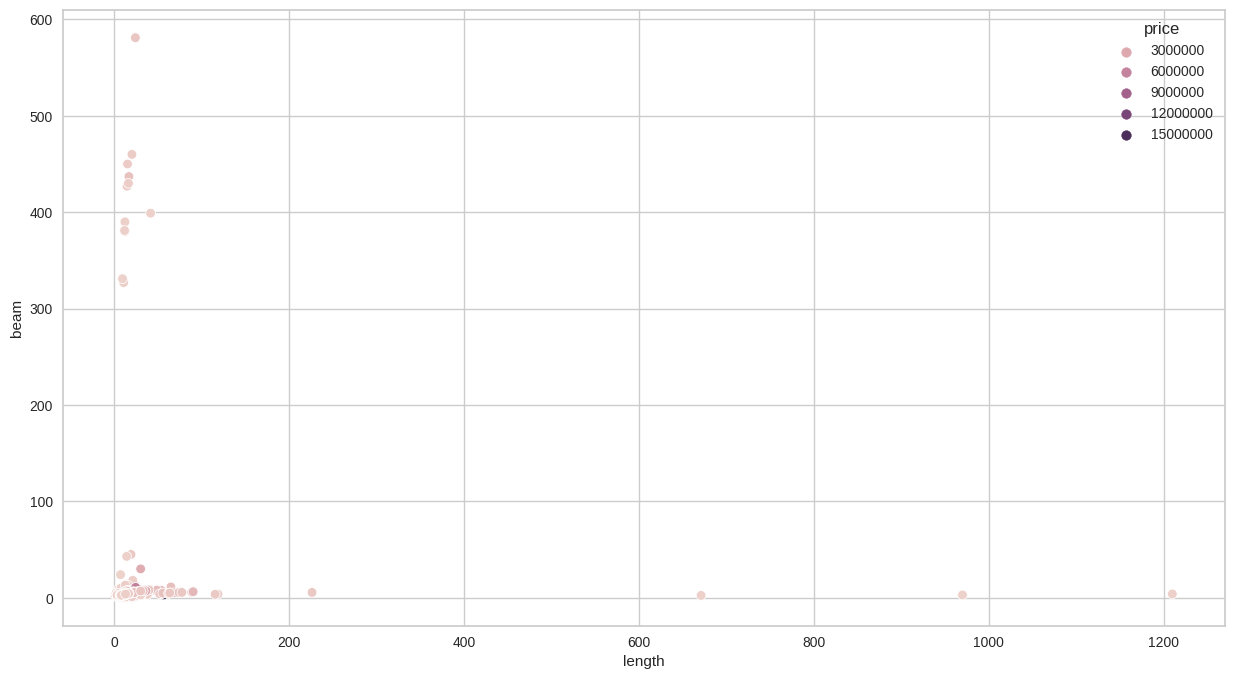

In [ ]:
plot_scatter_x_vs_y(df, 'length', 'beam', 'price')

Create and display a scatter plot of ***'length'*** against ***'year_of_production'***, coloured by ***'price'***

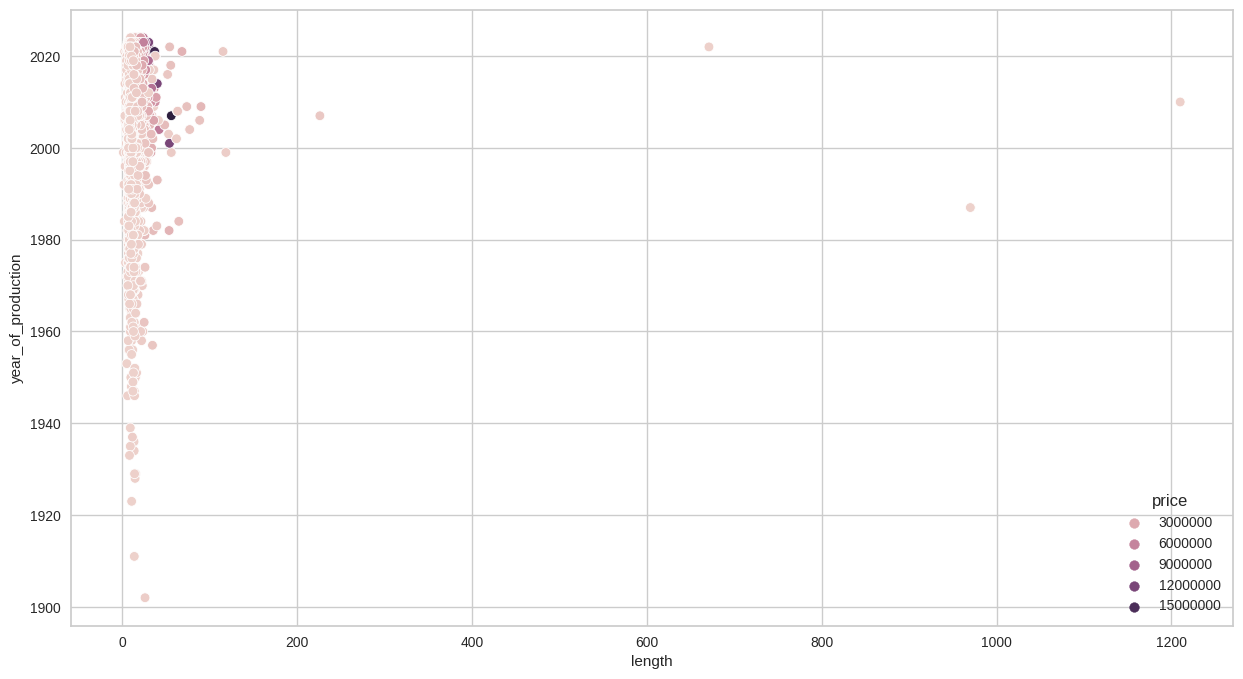

In [ ]:
plot_scatter_x_vs_y(df, 'length', 'year_of_production', 'price')

**CONCLUSIONS:**

The scatter plot diagrams show that there are many nulls, errors and outliers in the data. In the remainder of the project the data will be cleaned and supplemented using various methods.

In [ ]:
zero_counts = (df == 0).sum()
zero_counts

id                       0
url                      0
condition                0
year_of_production       0
price                    0
yacht_class              0
yacht_classes            0
yacht_type               0
fuel_type                0
hull_material            0
hull_shape               0
bowsprit                13
length                   0
beam                     0
maxDraft                 0
cruisingSpeed            0
maxHullSpeed             0
range_in_mi              0
number_of_engines      319
engines                  0
horse_power_sum       1283
number_of_cabins      3661
number_of_cabins_2    3208
bathrooms             5858
heads                  985
number_of_photos         0
dtype: int64

**CONCLUSIONS:**

- **bowsprit:** There are 13 cases where the bowsprit information is 0. It is likely that the yacht does not have a bowsprit.

- **Number_of_engines:** There are 319 cases where the number of engines is 0. This is incorrect or missing data, as the number of engines should not be zero, as the data was downloaded for motor yachts.

- **horse_power_sum:** There are 1283 instances where the sum of the power of the engines is 0. This is invalid or missing data, as the number of engines should not be zero, as the data was downloaded for motor yachts.

- **number_of_cabins:** There are 3661 instances where the number of cabins is 0. This may be incorrect or missing data, as the number of cabins on a motor yacht should not be zero, but there is a ***'number_of_cabins_2'*** column where the data may be. There will be 2 columns replaced by 1 at a later stage.

- **number_of_cabins_2:** There are 3208 cases where the other column containing the number of cabins (number_of_cabins_2) is 0. This may be incorrect or missing data, as the number of cabins on a motor yacht should not be zero, but there is still a ***'number_of_cabins'*** column where the data may be. At a later stage there will be 2 columns replaced by 1.

- **bathrooms:** There are 5858 instances where the number of bathrooms is 0. This could be incorrect or missing data, as the number of bathrooms should not be zero, but there is still a ***'heads'*** column in the data frame where the data could be. The difference between the two names is the size of the room.

- **heads:** There are 985 instances where the number of toilets (WCs) is 0. This may be incorrect or missing data, as the number of toilets should not be zero, but there is still a ***'bathrooms'*** column in the data frame where the data can be found. The difference between the two names is the size of the room.

In the case of columns with null values, the data should be examined carefully to determine whether it is valid data, errors or missing data. If they are errors or omissions, they may need to be corrected or supplemented with appropriate values.

In [ ]:
df.isna().sum()

id                       0
url                      0
condition                0
year_of_production       0
price                    0
yacht_class              0
yacht_classes         2410
yacht_type               0
fuel_type                2
hull_material            0
hull_shape            3636
bowsprit              7420
length                 154
beam                   214
maxDraft              2606
cruisingSpeed         4980
maxHullSpeed          5163
range_in_mi           7047
number_of_engines        0
engines                  0
horse_power_sum          0
number_of_cabins         0
number_of_cabins_2       0
bathrooms                0
heads                    0
number_of_photos        10
dtype: int64

**CONCLUSIONS:**

- **yacht_classes:** There are 2410 missing values in the column ***'yacht_classes'***. This may indicate that some yachts were not classified in certain classes or were only included in the ***'yacht_class'*** column.

- **fuel_type:** There are 2 missing values in the ***'fuel_type'*** column. These are probably cases where the fuel type was not specified for the yacht.

- **hull_shape:** There are 3636 missing values in the column ***'hull_shape'***. Missing data in this column may suggest that hull shape information has not been completed by the advertiser.

- **bowsprit:** here are 7420 missing values in the bowsprit column, suggesting that the majority of yachts do not have bowsprit information, as motor yachts have been downloaded and by definition do not have a bowsprit.

- **length:** There are 154 missing values in the ***'length'*** column. Missing data in this column may suggest that the length of the yacht has not been entered and this data will be removed at a later stage by removing outliers.

- **beam:** There are 214 missing values in the 'beam' column. Missing data in this column may suggest that the width of the yacht has not been specified and this data will be removed in later stages by outlier removal in later stages.

- **maxDraft:** There are 2606 missing values in the 'maxDraft' column. Missing data in this column may suggest that the maximum draught of the yacht has not been specified. This data will be filled in at a later stage of the project.

- **cruisingSpeed:** There are 4980 missing values in the ***'cruisingSpeed'*** column. Missing data in this column may mean that the average cruising speed of the yacht has not been provided. Due to the large amount of missing data in later stages of the project, this data is not used.

- **maxHullSpeed:** There are 5163 missing values in the ***'maxHullSpeed'*** column. Missing data in this column may suggest that the maximum speed of the yacht has not been specified. Due to the large amount of missing data in later stages of the project, this data is not used.


- **range_in_mi:** There are 7047 missing values in the ***'range_in_mi'*** column. Missing data in this column may suggest that the range of the yacht in nautical miles has not been provided.

- **number_of_photos:** There are 10 missing values in the ***'number_of_photos'*** column. The missing data in this column may suggest that the number of photos of the yacht has not been provided.


In summary, missing data can be due to a number of reasons, such as lack of information provided, errors in data collection or incomplete records in the database. To improve the quality of the data, consideration can be given to imputing missing values or removing rows with missing data where appropriate. It is also important to understand the context of the data and the purpose of the analysis before making decisions on how to deal with missing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7433 non-null   float64
 1   url                 7433 non-null   object 
 2   condition           7433 non-null   object 
 3   year_of_production  7433 non-null   float64
 4   price               7433 non-null   float64
 5   yacht_class         7433 non-null   object 
 6   yacht_classes       5023 non-null   object 
 7   yacht_type          7433 non-null   object 
 8   fuel_type           7431 non-null   object 
 9   hull_material       7433 non-null   object 
 10  hull_shape          3797 non-null   object 
 11  bowsprit            13 non-null     object 
 12  length              7279 non-null   float64
 13  beam                7219 non-null   float64
 14  maxDraft            4827 non-null   float64
 15  cruisingSpeed       2453 non-null   float64
 16  maxHul

**CONCLUSIONS:**

- **Number of rows and columns:** The DataFrame consists of 7433 rows and 26 columns.

- **Data types:** In the DataFrame we have columns with numeric data (float64) and columns with text data (object).

- **Missing data:** Some columns have missing data (non-null count less than the number of rows):
  - The column "yacht_classes" has 2410 missing values.
  - The column  "fuel_type" has 2 missing values.
  - The column  "hull_shape" has 3636 missing values.
  - The column  "bowsprit"  has 7420 missing values.
  - The columns for boat dimensions columns (length, beam, maxDraft, cruisingSpeed, maxHullSpeed, range_in_mi) have a varying numbers of missing values, ranging from a few to several thousand cases.
  - The column "number_of_photos" has 10 missing values.
- **Memory used:** DataFrame uses about 1.5+ MB of memory.
- **Description of columns:** Information about each column, including its name, non-null count, data type (Dtype), and notation of the number of unique values in the columns.

In summary, the DataFrame contains data about yachts, but there is missing data in some columns. This missing data may need to be analysed and possibly processed in order to interpret and use the data correctly.

#Feature importances

In machine learning, feature importance scores are used to determine the relative importance of each feature in a dataset when building a predictive model. These scores are calculated using a variety of techniques, such as decision trees, random forests, linear models.

Feature importance can provide a way to rank the features based on their contribution to the final prediction. It can be used for feature selection, which is the process of selecting a subset of relevant features for use in building a model, although this might require domain expertise.

Feature importance is useful for machine learning tasks because it allows practitioners to understand which features in a dataset are contributing most to the final prediction, and which features are less important. This information can be used in a variety of ways:

- **Feature selection:** By identifying the most important features, practitioners can select a subset of relevant features for use in building a model, reducing dimensionality and noise in the data, and improving model interpretability.
- **Model interpretability:** By understanding which features are most important, practitioners can gain insights into the underlying relationships in the data and how the model is making predictions.
- **Model debugging:** If a model is not performing well, feature importance can be used to identify which features may be causing problems and require further investigation.
- **Business decision-making:** By understanding which features are most important, practitioners can make more informed decisions about which features to collect and how to allocate resources.
- **Improving model performance:** By removing less important features, practitioners can improve model performance by reducing overfitting and training time.

##Data cleaning for Future Selection

Add a 'all_cabins' column to the Data Frame to leave a one column containing information on the number of cabins

In [ ]:
def add_all_cabins(df):
  df['all_cabins'] = df.apply(lambda row: row['number_of_cabins'] if row['number_of_cabins'] != 0 else row['number_of_cabins_2'], axis=1)
  return df

In [ ]:
df_fs = df
df_fs = add_all_cabins(df_fs)
df_fs

<ipython-input-32-7cdfe599cf74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_cabins'] = df.apply(lambda row: row['number_of_cabins'] if row['number_of_cabins'] != 0 else row['number_of_cabins_2'], axis=1)


id                                                url condition  \
0     5625176.0  https://www.yachtworld.co.uk/yacht/2002-cranch...      used   
1     5624169.0  https://www.yachtworld.co.uk/yacht/2007-atlant...      used   
2     5428459.0  https://www.yachtworld.co.uk/yacht/2008-bertra...      used   
3     5895772.0  https://www.yachtworld.co.uk/yacht/2007-ferret...      used   
4     6194015.0  https://www.yachtworld.co.uk/yacht/2014-draco-...      used   
...         ...                                                ...       ...   
7428  8575370.0  https://www.yachtworld.co.uk/yacht/2012-sunsee...      used   
7429  8946778.0  https://www.yachtworld.co.uk/yacht/2003-benete...      used   
7430  8485810.0  https://www.yachtworld.co.uk/yacht/2004-chapar...      used   
7431  8729930.0  https://www.yachtworld.co.uk/yacht/1999-admira...      used   
7432  8474618.0  https://www.yachtworld.co.uk/yacht/2019-benete...      used   

      year_of_production      price    yacht_class  \
0                 2002.0  166070.66  power-cruiser   
1                 2007.0  322915.17  power-cruiser   
2                 2008.0  750000.00  power-cruiser   
3                 2007.0  442855.09  power-cruiser   
4                 2014.0   70000.00  power-cruiser   
...                  ...        ...            ...   
7428              2012.0  525457.14    power-motor   
7429              2003.0   88747.90  power-cruiser   
7430              2004.0   46005.24  power-cruiser   
7431              1999.0  880000.00  power-cruiser   
7432              2019.0  375000.00  power-cruiser   

                       yacht_classes yacht_type fuel_type hull_material  ...  \
0                      [power-motor]      power    diesel    fiberglass  ...   
1                               None      power    diesel    fiberglass  ...   
2     [power-flybridge, power-fresh]      power    diesel    fiberglass  ...   
3                      [power-motor]      power    diesel    fiberglass  ...   
4                               None      power  gasoline    fiberglass  ...   
...                              ...        ...       ...           ...  ...   
7428                 [power-cruiser]      power    diesel    fiberglass  ...   
7429                   [power-motor]      power    diesel    fiberglass  ...   
7430                            None      power  gasoline    fiberglass  ...   
7431                            None      power    diesel      aluminum  ...   
7432    [power-cruiser, power-motor]      power    diesel    fiberglass  ...   

     range_in_mi number_of_engines               engines  horse_power_sum  \
0            NaN               2.0  {'0': 370, '1': 370}            740.0   
1            NaN               0.0                    {}              0.0   
2            NaN               2.0      {'0': 0, '1': 0}              0.0   
3            NaN               2.0  {'0': 575, '1': 575}           1150.0   
4            NaN               1.0            {'0': 300}            300.0   
...          ...               ...                   ...              ...   
7428         NaN               2.0  {'0': 435, '1': 435}            870.0   
7429         NaN               2.0  {'0': 285, '1': 285}            570.0   
7430         NaN               1.0            {'0': 375}            375.0   
7431         NaN               0.0                    {}              0.0   
7432         NaN               2.0  {'0': 300, '1': 300}            600.0   

      number_of_cabins  number_of_cabins_2  bathrooms  heads  \
0                  0.0                 0.0        0.0    0.0   
1                  0.0                 0.0        0.0    0.0   
2                  3.0                 6.0        2.0    0.0   
3                  0.0                 0.0        0.0    0.0   
4                  2.0                 4.0        1.0    1.0   
...                ...                 ...        ...    ...   
7428               2.0                 0.0        0.0    2.0   
7429 

Remove unnecessary columns from the Data Frame



In [ ]:
def delete_unnecessary_columns(df_fs, columns):
  df_fs = df_fs.drop(columns=columns, axis=1)
  return df_fs

In [ ]:
columns = ['id', 'url', 'condition', 'yacht_classes', 'yacht_type', 'hull_shape', 'bowsprit', 'cruisingSpeed', 'maxHullSpeed', 'range_in_mi', 'engines', 'number_of_cabins', 'number_of_cabins_2', 'bathrooms', 'heads']
df_fs = delete_unnecessary_columns(df_fs, columns)
df_fs

year_of_production      price    yacht_class fuel_type hull_material  \
0                 2002.0  166070.66  power-cruiser    diesel    fiberglass   
1                 2007.0  322915.17  power-cruiser    diesel    fiberglass   
2                 2008.0  750000.00  power-cruiser    diesel    fiberglass   
3                 2007.0  442855.09  power-cruiser    diesel    fiberglass   
4                 2014.0   70000.00  power-cruiser  gasoline    fiberglass   
...                  ...        ...            ...       ...           ...   
7428              2012.0  525457.14    power-motor    diesel    fiberglass   
7429              2003.0   88747.90  power-cruiser    diesel    fiberglass   
7430              2004.0   46005.24  power-cruiser  gasoline    fiberglass   
7431              1999.0  880000.00  power-cruiser    diesel      aluminum   
7432              2019.0  375000.00  power-cruiser    diesel    fiberglass   

      length  beam  maxDraft  number_of_engines  horse_power_sum  \
0      13.16  3.83       NaN                2.0            740.0   
1        NaN   NaN      4.45                0.0              0.0   
2      16.73  4.93      1.52                2.0              0.0   
3      14.35  4.34       NaN                2.0           1150.0   
4        NaN  2.60       NaN                1.0            300.0   
...      ...   ...       ...                ...              ...   
7428   16.18  4.29      1.30                2.0            870.0   
7429   10.80  3.43       NaN                2.0            570.0   
7430    7.92  2.59      0.89                1.0            375.0   
7431   30.00  7.00       NaN                0.0              0.0   
7432   12.67  3.85       NaN                2.0            600.0   

      number_of_photos  all_cabins  
0                  8.0         0.0  
1                 11.0         0.0  
2                 11.0         3.0  
3                 26.0         0.0  
4                 15.0         2.0  
...                ...         ...  
7428              21.0         2.0  
7429              60.0         2.0  
7430              21.0         2.0  
7431              31.0         0.0  
7432               8.0         2.0  

[7433 rows x 12 columns]

Remove rows where the value is '0' to obtain a Data Frame to assess the importance of the characteristic

In [ ]:
def delete_columns_zero_cabins(df_fs):
  df_fs = df_fs[(df_fs != 0).all(axis=1) & ~df_fs.isnull().any(axis=1)]
  return df_fs

In [ ]:
df_fs = delete_columns_zero_cabins(df_fs)
df_fs

year_of_production       price      yacht_class fuel_type hull_material  \
18                2010.0    90323.99    power-cruiser  gasoline    fiberglass   
19                2007.0    71897.02    power-cruiser  gasoline    fiberglass   
21                2007.0   369045.91  power-flybridge    diesel    fiberglass   
25                2004.0   829430.67       power-mega    diesel    fiberglass   
27                2005.0  1150000.00    power-cruiser    diesel    fiberglass   
...                  ...         ...              ...       ...           ...   
7424              1988.0   100000.00    power-cruiser    diesel      aluminum   
7425              2020.0   219000.00    power-cruiser  gasoline    fiberglass   
7427              1991.0    39652.18    power-cruiser    diesel    fiberglass   
7428              2012.0   525457.14      power-motor    diesel    fiberglass   
7430              2004.0    46005.24    power-cruiser  gasoline    fiberglass   

      length  beam  maxDraft  number_of_engines  horse_power_sum  \
18      8.53  2.87      0.99                1.0            375.0   
19      9.45  3.05      0.89                2.0            450.0   
21     21.34  5.79      4.60                2.0           1100.0   
25     19.30  5.28      1.52                2.0           2800.0   
27     26.60  6.20      1.30                2.0           4000.0   
...      ...   ...       ...                ...              ...   
7424   14.00  3.93      2.50                1.0             40.0   
7425   10.45  3.47      0.69                2.0            600.0   
7427    7.39  2.95      0.71                1.0             38.0   
7428   16.18  4.29      1.30                2.0            870.0   
7430    7.92  2.59      0.89                1.0            375.0   

      number_of_photos  all_cabins  
18                31.0         4.0  
19                16.0         6.0  
21                 9.0         3.0  
25                37.0         6.0  
27                24.0         4.0  
...                ...         ...  
7424              25.0         3.0  
7425              30.0         3.0  
7427              18.0         1.0  
7428              21.0         2.0  
7430              21.0         2.0  

[3396 rows x 12 columns]

In [ ]:
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396 entries, 18 to 7430
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year_of_production  3396 non-null   float64
 1   price               3396 non-null   float64
 2   yacht_class         3396 non-null   object 
 3   fuel_type           3396 non-null   object 
 4   hull_material       3396 non-null   object 
 5   length              3396 non-null   float64
 6   beam                3396 non-null   float64
 7   maxDraft            3396 non-null   float64
 8   number_of_engines   3396 non-null   float64
 9   horse_power_sum     3396 non-null   float64
 10  number_of_photos    3396 non-null   float64
 11  all_cabins          3396 non-null   float64
dtypes: float64(9), object(3)
memory usage: 344.9+ KB


**CONCLUSIONS:**

From the above information, it appears that there are no Nan in df_fs.

Function using Random Forest Regressor to select important features

In [ ]:
def train_random_forest_regressor(df_fs, X_fs, y_fs):
  scaler = StandardScaler()
  X_fs_scaled = scaler.fit_transform(X_fs)

  X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs_scaled, y_fs, random_state=42)

  regressor = RandomForestRegressor(random_state=42)
  regressor.fit(X_fs_train, y_fs_train)

  y_pred = regressor.predict(X_fs_test)

  return y_pred, regressor

Activate function and split df_fs into X_fs and y_fs

In [ ]:
X_fs = df_fs[['year_of_production', 'length', 'beam', 'maxDraft', 'horse_power_sum', 'all_cabins', 'number_of_photos']]
y_fs = df_fs[['price']]

y_pred, regressor = train_random_forest_regressor(df_fs, X_fs, y_fs)

<ipython-input-39-930163a2402b>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_fs_train, y_fs_train)


Function to display important features in graphical form.

In [ ]:
def plot_feature_importances(original_feature_names, importances, threshold=0.01):
  filtered_features = [feature for feature, importance in zip(original_feature_names, importances) if importance > threshold]
  filtered_importances = [importance for importance in importances if importance > threshold]

  forest_importances_sorted = pd.Series(filtered_importances, index=filtered_features).sort_values(ascending=False)

  fig, ax = plt.subplots(figsize=(12, 8))

  colors = plt.cm.Blues(np.linspace(1, 0.5, len(filtered_importances)))

  ax.bar(forest_importances_sorted.index, forest_importances_sorted, color=colors)

  ax.set_title("Feature importances using MDI (above {:.2f})".format(threshold))
  ax.set_ylabel("Feature Importance")
  ax.set_xlabel("Features")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

  fig.tight_layout()

  plt.show()

<ipython-input-41-fc20f5028000>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Ustawienie etykiet w pionie


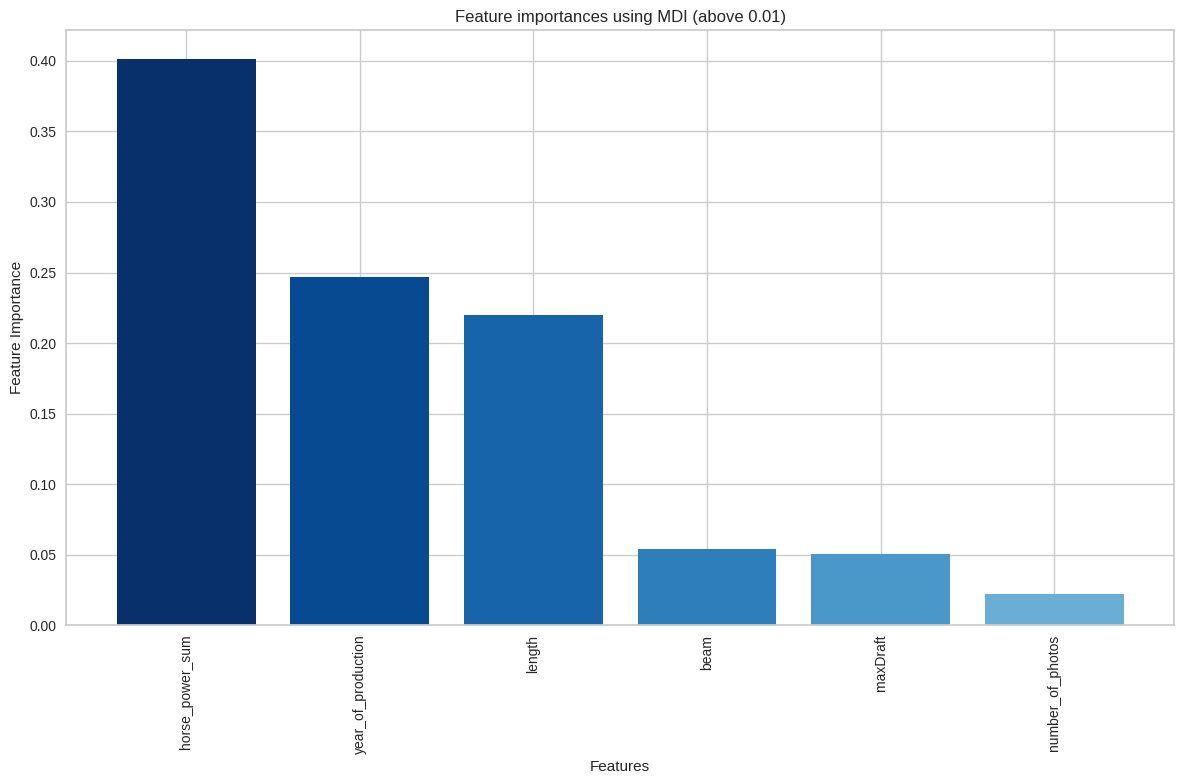

In [ ]:
plot_feature_importances(X_fs, regressor.feature_importances_, threshold=0.01)

**CONCLUSIONS:**

The chart above shows that the most important features are ***'horse_power_sum'***, ***'year_of_production'***, ***'length'***, ***'beam'***, ***'maxDraft'*** and ***'number_of_photos'***.

#Training and test sets

##Split into train and test collection

The data was split into a training set and a test set to assess the effectiveness of the model. The training set was used to teach the model, while the test set was reserved to evaluate its effectiveness.

Division of the Data Frame into X (features) and y (values).

In [ ]:
X = df[['year_of_production', 'length', 'beam', 'maxDraft', 'horse_power_sum', 'number_of_cabins', 'number_of_cabins_2', 'bathrooms', 'heads','number_of_photos']]
y = df[['price']]

Split of X and y into a training set and a test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train

year_of_production  length  beam  maxDraft  horse_power_sum  \
6375              2006.0    9.14  3.35      0.84            440.0   
6082              1966.0   16.76  4.70      1.22            560.0   
2585              2012.0   11.46  3.71       NaN            600.0   
1049              2008.0   14.00  6.55      1.40            660.0   
626               1987.0   12.60  4.22      1.80             50.0   
...                  ...     ...   ...       ...              ...   
5191              2005.0     NaN   NaN       NaN              0.0   
5226              2006.0   10.36  3.20      0.41            350.0   
5390              2007.0    9.30  3.05      1.01            440.0   
860               2006.0    8.35  2.98       NaN            456.0   
7270              2016.0   10.44  3.10       NaN            600.0   

      number_of_cabins  number_of_cabins_2  bathrooms  heads  number_of_photos  
6375               0.0                 3.0        0.0    1.0              27.0  
6082               3.0                 0.0        0.0    3.0               2.0  
2585               2.0                 0.0        0.0    1.0              28.0  
1049               3.0                 3.0        3.0    3.0              26.0  
626                3.0                 0.0        2.0    1.0              22.0  
...                ...                 ...        ...    ...               ...  
5191               0.0                 0.0        0.0    0.0              22.0  
5226               0.0                 0.0        0.0    1.0              79.0  
5390               0.0                 6.0        0.0    1.0              16.0  
860                1.0                 0.0        0.0    1.0              14.0  
7270               0.0                 0.0        0.0    1.0              24.0  

[5946 rows x 10 columns]

In [ ]:
y_train

price
6375   54379.53
6082  340444.85
2585  199000.00
1049  474829.87
626    75000.00
...         ...
5191  299849.80
5226  207587.40
5390   55264.62
860    48000.00
7270  259900.00

[5946 rows x 1 columns]

In [ ]:
X_test

year_of_production  length  beam  maxDraft  horse_power_sum  \
625               2008.0   12.00  3.00      1.00            900.0   
7031              2002.0   10.31  3.40      1.09              0.0   
101               2009.0   20.75  5.38       NaN           2400.0   
3956              2000.0   10.13  3.30      0.94            560.0   
2018              1996.0   13.72  4.62       NaN              0.0   
...                  ...     ...   ...       ...              ...   
751               2018.0   13.80  3.50       NaN              0.0   
2184              2015.0    8.53  2.44       NaN              0.0   
1872              2008.0    8.53  2.00      1.00            300.0   
4019              1973.0    6.40  2.00      0.80             10.0   
7010              2005.0   12.19  3.96      1.07            660.0   

      number_of_cabins  number_of_cabins_2  bathrooms  heads  number_of_photos  
625                1.0                 2.0        1.0    1.0              13.0  
7031               0.0                 6.0        0.0    1.0              17.0  
101                3.0                 0.0        0.0    3.0               9.0  
3956               0.0                 4.0        0.0    1.0              40.0  
2018               0.0                 0.0        0.0    2.0              41.0  
...                ...                 ...        ...    ...               ...  
751                0.0                 0.0        0.0    1.0              14.0  
2184               0.0                 0.0        0.0    0.0              30.0  
1872               1.0                 4.0        0.0    1.0              10.0  
4019               0.0                 1.0        0.0    1.0              16.0  
7010               0.0                 0.0        0.0    1.0              60.0  

[1487 rows x 10 columns]

In [ ]:
y_test

price
625   199000.00
7031   53934.00
101   855000.00
3956   36904.97
2018  134625.10
...         ...
751   340000.00
2184   91543.03
1872   45412.57
4019    8114.15
7010  109711.90

[1487 rows x 1 columns]

##Remove outliers and complete data


Removing noise and outliers is an essential step in data processing and
statistical analysis, aimed at improving model quality, accuracy, and reliability. Here's why it's important:

- **Enhancing Model Quality:**
Noise and outliers can introduce distortions in the data, leading to unstable and less accurate models. Removing noise allows for a better representation of actual relationships between the data, resulting in more reliable and accurate model predictions.

- **Increasing Model Accuracy:**
Noise and outliers can disrupt the model learning process, affecting prediction quality. Eliminating these irregular points can enhance model accuracy, enabling more precise predictions.

- **Guarding Against Outlier Effects:**
Outliers can significantly impact model parameter estimation, especially in models based on minimizing squared errors (e.g., regression). Removing outliers can minimize their influence on the model parameters.

- **Facilitating Better Data Interpretation:**
Removing noise and outliers provides a better, more balanced perspective on the data, making it easier to interpret relationships between features and target variables.

- **Optimizing Machine Learning Algorithms:**
Some learning algorithms, particularly those sensitive to outliers (e.g., k-means in clustering), may yield poor results if the data contains outliers. Removing them can enhance the performance of these algorithms.


However, it's important to note that removing noise and outliers should be done cautiously and in accordance with best practices. Removing outliers without proper understanding of the context can lead to the loss of important information and distortion of analysis. It's essential to carefully monitor the process of removing noise and outliers and understand the impact of this process on the data and models.

###Features

Removal of outliers in the 'length' and 'beam' columns of the Data Frame.

In [ ]:
def filter_length_beam(X):
  upper_lim_length = X['length'].mean() + 3 * X['length'].std()
  lower_lim_length = X['length'].mean() - 3 * X['length'].std()

  upper_lim_beam = X['beam'].mean() + 3 * X['beam'].std()
  lower_lim_beam = X['beam'].mean() - 3 * X['beam'].std()

  filter_length_beam = X[(X['length'] >= lower_lim_length) & (X['length'] <= upper_lim_length) &
              (X['beam'] >= lower_lim_beam) & (X['beam'] <= upper_lim_beam)]

  return filter_length_beam

This function is used to return only those rows where the value in the specified column is less than the specified ***'value'***.

In [ ]:
def filter_data(X, column, value):
  filter_x = X[column < value]
  return filter_x

The ***'heads'*** and ***'bathrooms'*** columns generally represent rooms of a sanitary nature, used for personal hygiene activities requiring the use of water, but vary in size. Therefore, both columns have been reduced to one ***'all_bathrooms'***.

In [ ]:
def add_all_bathrooms(X):
  X['all_bathrooms'] = X.apply(lambda row: row['heads'] + row['bathrooms'], axis=1)
  X.drop(['heads', 'bathrooms'], axis =1, inplace=True)
  return X

Convert Nan value to '0'. The conversion of these values is necessary to avoid an error when running the regression.

In [ ]:
def fill_nan(X, column):
  X[column].fillna(0, inplace=True)
  return X

Completion of ***'horse_power_sum'*** using the median of yachts of the same length.

In [ ]:
def fill_horse_power_median_by_length(X):
  unique_lengths = X['length'].unique()

  X_copy = X.copy()

  for length_value in unique_lengths:
    valid_rows = X_copy[(X_copy['length'] == length_value) &
                    (X_copy['horse_power_sum'] != 0)]

    median_horse_power = valid_rows['horse_power_sum'].median()

    X_copy.loc[(X_copy['length'] == length_value) &
            (X_copy['horse_power_sum'] == 0),
            'horse_power_sum'] = median_horse_power

  return X_copy

Fill in the gaps in the ***'horse_power_sum'*** column using the median of yachts of similar length. Used when there are no other yachts for a yacht of a given length and it is not possible to calculate the median. In this case, yachts of similar length are used to calculate the median for ***'horse_power_sum'***.

In [ ]:
def fill_horse_power_for_zero(df):
  zero_horse_power_lengths = df.loc[df['horse_power_sum'] == 0, 'length'].unique()

  for value_length in zero_horse_power_lengths:
    values_smaller_than_length = df.loc[(df['length'] < value_length) & (df['horse_power_sum'] != 0), 'length'].nsmallest(2).values
    values_greater_than_length = df.loc[(df['length'] > value_length) & (df['horse_power_sum'] != 0), 'length'].nlargest(2).values

    median_horse_power_smaller_than_length = df.loc[df['length'].isin(values_smaller_than_length), 'horse_power_sum'].median()
    median_horse_power_greater_than_length = df.loc[df['length'].isin(values_greater_than_length), 'horse_power_sum'].median()

    median_horse_power_combined = np.mean([median_horse_power_smaller_than_length, median_horse_power_greater_than_length])

    df.loc[df['length'] == value_length, 'horse_power_sum'] = median_horse_power_combined

  return df

Estimating the draft of a motor yacht based solely on its length and width is an approximation, as draft depends on many factors, including hull shape, vessel weight, displacement, waterline, and others. However, we can apply certain general proportions to estimate the draft.

Typically, for motor yachts, specific draft-to-length and draft-to-width ratios are applied to the hull. Here are some general ratios that can be used as a starting point:

For motor yachts with a standard hull shape, the draft can be around 10-20% of the overall length and approximately 25-35% of the hull width.

You can also use ratios based on the length-to-width ratio, assuming certain proportion coefficients. For example, the draft might be 0.1-0.15 times the length and 0.25-0.35 times the width.

\

A sample calculation for draft could look like this:

\

> ***Draft = k1 × length + k2 × width***

\

where:

***k1*** and ***k2*** are proportion coefficients that can be adjusted according to the expected draft-to-length and draft-to-width ratio.

That these values and ratios are only a general approximation, and the actual draft will depend on many factors, including hull shape, yacht weight, waterline, etc. It's always recommended to consult with a maritime expert or naval architect for more precise information regarding the draft of a motor yacht.

Using expert knowledge, it can be deduced that not all draught values are correct and not all draught values have been entered in the advertisement. This can be done by estimating the draught of the boat using the length/width ratio. This can be used to check the draught and fill in the missing information. In the end, the ***'Draft'*** column of the boat remains with the correct data.

In [ ]:
def x_draft_process(X):
  X['estimatedDraft'] = X.apply(lambda row: (0.1 * row['length'] + 0.2 * row['beam']), axis=1)
  X['Draft'] = np.where((X['estimatedDraft'] < X['maxDraft']) | (X['maxDraft'].isna()), X['estimatedDraft'], X['maxDraft'])
  x_draft = X.drop(['estimatedDraft', 'maxDraft'], axis=1)
  return x_draft

Create a scatterplot for the ***'x'*** and ***'y'*** columns.

In [ ]:
def plot_custom_scatter(x, y, X, hue):
  plt.figure(figsize=(30, 16))
  custom_colors = ['#FF5733', '#FFBD33', '#C70039', '#900C3F', '#581845',
                    '#33FF57', '#33FFBD', '#0033FF', '#3303FF', '#8A2BE2']
  point_size = 10
  sns.scatterplot(x=x, y=y, data=X, palette=custom_colors, hue=hue, s=point_size)
  plt.show()

The function implements a K-Nearest Neighbours (*KNN*) classifier to predict the value of the ***'all_cabins'*** column based on other columns in the data frame.

**K-NN (K-Nearest Neighbors)** is a classification and regression algorithm based on instances, using training data to predict values for new samples. It is a simple yet effective machine learning algorithm commonly used in classification problems.

The fundamental idea of the K-NN algorithm is that a new sample is classified based on the majority vote (or average value) of the K nearest neighbors from the training samples. "Nearest neighbors" refer to the samples that have the closest feature values to the analyzed sample.

The general steps of the K-NN algorithm are:

- **Choosing the number of neighbors (K):** Determine the number of nearest neighbors you want to consider during classification.

- **Calculating distances:** For a given new sample, calculate the distance (e.g., Euclidean, Manhattan) from each training sample.

- **Identifying the nearest neighbors:** Select K samples with the smallest distances from the new sample.

- **Classification/Regression:** For classification problems, classify the new sample based on the majority classification among the nearest neighbors. For regression problems, predict the value based on the average value of the nearest neighbors.

The K-NN algorithm is called a "lazy learner" because it doesn't learn from the training set in the traditional sense. Instead, it stores the training data and performs calculations on the fly during predictions for new samples.

The main advantages of K-NN are ease of implementation, no assumptions about data distribution, and adaptability to changes in data. However, it may be sensitive to data scaling, has limited use with high-dimensional data, and may require significant computational resources with a large number of training samples.

In [ ]:
def knn_classificator_cabins(df, idx_drop_cabins, test_size=0.2, random_state=42):
  pipe_knn = Pipeline([('sc', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

  params_knn = {'knn__n_neighbors': [36, 37, 38, 39, 40, 41, 42],
              'knn__weights': ['uniform', 'distance'],
              'knn__p': [1, 2],
              'knn__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}

  gs_knn = GridSearchCV(pipe_knn,
                      param_grid=params_knn,
                      cv=10)

  X_knn = df.drop(idx_drop_cabins)[['length', 'beam', 'all_bathrooms', 'horse_power_sum', 'year_of_production']]
  y_knn = df.drop(idx_drop_cabins)['all_cabins']

  y_knn = y_knn.replace({1:2, 5:6, 8:6, 7:6, 9:6, 10:6})

  X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=test_size, random_state=random_state, stratify=y_knn)

  gs_knn.fit(X_train_knn, y_train_knn)

  print("Best parameters:", gs_knn.best_params_)

  score_test_knn = gs_knn.score(X_test_knn, y_test_knn)
  print("Test Accuracy:", score_test_knn)

  score_train_knn = gs_knn.score(X_train_knn, y_train_knn)
  print("Train Accuracy:", score_train_knn)

  accuracy_knn = gs_knn.score(X_test_knn, y_test_knn)
  print(accuracy_knn)

  y_train_pred_knn = gs_knn.predict(X_train_knn)

  y_test_pred_knn = gs_knn.predict(X_test_knn)

  return gs_knn, X_train_knn, y_train_knn, y_train_pred_knn, X_test_knn, y_test_knn, y_test_pred_knn

Generate and plot a **confusion matrix** for a classification model. The confusion matrix is a classification analysis tool that shows the number of correct and incorrect classifications made by the model.

In [ ]:
def plot_confusion_matrix(gs, X, y):
  cm = confusion_matrix(gs.best_estimator_, X, y)
  plt.tight_layout()

This function implements a K-Nearest Neighbours (K-NN) classifier, which is used to predict the number of bathrooms based on other features provided in the dataset.

In [ ]:
def knn_classificator_bathrooms(df, idx_drop_bath, test_size=0.2, random_state=42):
  pipe_knn = Pipeline([('sc', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

  params_knn = {'knn__n_neighbors': [41, 42, 43, 44, 45],
              'knn__weights': ['uniform', 'distance'],
              'knn__p': [1, 2],
              'knn__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}

  gs_knn = GridSearchCV(pipe_knn,
                      param_grid=params_knn,
                      cv=10)

  X_knn = df.drop(idx_drop_bath)[['length', 'beam', 'all_cabins', 'horse_power_sum', 'year_of_production']]
  y_knn = df.drop(idx_drop_bath)['all_bathrooms']

  y_knn = y_knn.replace({3:4, 6:5, 7:5, 8:5, 9:5, 10:5, 11:5, 12:5, 13:5, 14:5})

  X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=test_size, random_state=random_state, stratify=y_knn)

  gs_knn.fit(X_train_knn, y_train_knn)

  print("Best parameters:", gs_knn.best_params_)

  score_test_knn = gs_knn.score(X_test_knn, y_test_knn)
  print("Test Accuracy:", score_test_knn)

  score_train_knn = gs_knn.score(X_train_knn, y_train_knn)
  print("Train Accuracy:", score_train_knn)

  accuracy_knn = gs_knn.score(X_test_knn, y_test_knn)
  print(accuracy_knn)

  y_train_pred_knn = gs_knn.predict(X_train_knn)

  y_test_pred_knn = gs_knn.predict(X_test_knn)

  return gs_knn, X_train_knn, y_train_knn, y_train_pred_knn, X_test_knn, y_test_knn, y_test_pred_knn

Determine the indexes of the rows remaining after the data has been cleaned.

In [ ]:
def select_index_x(X):
  select_index_X = X.index.tolist()
  return select_index_X

Selecting specific indexes for ***'y'*** values, based on the indexes of the rows left in ***'X'***.

In [ ]:
def select_index_y(y, select_index_X):
  select_index_y = y.loc[select_index_X]
  return select_index_y

Create a Data Frame based on the combination of ***'X'*** features with ***'y'*** values.

In [ ]:
def create_df_fill(X, y):
  df_no_outliers = pd.DataFrame(X, columns=X.columns.tolist())
  df_no_outliers['price'] = y
  return df_no_outliers

###Train set

####X_train

#####Create an ***'all_cabins'*** column

In [ ]:
x_train_add_all_cabins = add_all_cabins(X_train)
x_train_add_all_cabins

year_of_production  length  beam  maxDraft  horse_power_sum  \
6375              2006.0    9.14  3.35      0.84            440.0   
6082              1966.0   16.76  4.70      1.22            560.0   
2585              2012.0   11.46  3.71       NaN            600.0   
1049              2008.0   14.00  6.55      1.40            660.0   
626               1987.0   12.60  4.22      1.80             50.0   
...                  ...     ...   ...       ...              ...   
5191              2005.0     NaN   NaN       NaN              0.0   
5226              2006.0   10.36  3.20      0.41            350.0   
5390              2007.0    9.30  3.05      1.01            440.0   
860               2006.0    8.35  2.98       NaN            456.0   
7270              2016.0   10.44  3.10       NaN            600.0   

      number_of_cabins  number_of_cabins_2  bathrooms  heads  \
6375               0.0                 3.0        0.0    1.0   
6082               3.0                 0.0        0.0    3.0   
2585               2.0                 0.0        0.0    1.0   
1049               3.0                 3.0        3.0    3.0   
626                3.0                 0.0        2.0    1.0   
...                ...                 ...        ...    ...   
5191               0.0                 0.0        0.0    0.0   
5226               0.0                 0.0        0.0    1.0   
5390               0.0                 6.0        0.0    1.0   
860                1.0                 0.0        0.0    1.0   
7270               0.0                 0.0        0.0    1.0   

      number_of_photos  all_cabins  
6375              27.0         3.0  
6082               2.0         3.0  
2585              28.0         2.0  
1049              26.0         3.0  
626               22.0         3.0  
...                ...         ...  
5191              22.0         0.0  
5226              79.0         0.0  
5390              16.0         6.0  
860               14.0         1.0  
7270              24.0         0.0  

[5946 rows x 11 columns]

Remove unnecessary columns from the Data Frame

In [ ]:
columns = ['number_of_cabins', 'number_of_cabins_2']
x_train_cabins = delete_unnecessary_columns(x_train_add_all_cabins, columns)
x_train_cabins

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
6375              2006.0    9.14  3.35      0.84            440.0        0.0   
6082              1966.0   16.76  4.70      1.22            560.0        0.0   
2585              2012.0   11.46  3.71       NaN            600.0        0.0   
1049              2008.0   14.00  6.55      1.40            660.0        3.0   
626               1987.0   12.60  4.22      1.80             50.0        2.0   
...                  ...     ...   ...       ...              ...        ...   
5191              2005.0     NaN   NaN       NaN              0.0        0.0   
5226              2006.0   10.36  3.20      0.41            350.0        0.0   
5390              2007.0    9.30  3.05      1.01            440.0        0.0   
860               2006.0    8.35  2.98       NaN            456.0        0.0   
7270              2016.0   10.44  3.10       NaN            600.0        0.0   

      heads  number_of_photos  all_cabins  
6375    1.0              27.0         3.0  
6082    3.0               2.0         3.0  
2585    1.0              28.0         2.0  
1049    3.0              26.0         3.0  
626     1.0              22.0         3.0  
...     ...               ...         ...  
5191    0.0              22.0         0.0  
5226    1.0              79.0         0.0  
5390    1.0              16.0         6.0  
860     1.0              14.0         1.0  
7270    1.0              24.0         0.0  

[5946 rows x 9 columns]

#####Remove outlines on ***'length'***, ***'beam'***

In [ ]:
x_train_length_beam = filter_length_beam(x_train_cabins)
x_train_length_beam

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
6375              2006.0    9.14  3.35      0.84            440.0        0.0   
6082              1966.0   16.76  4.70      1.22            560.0        0.0   
2585              2012.0   11.46  3.71       NaN            600.0        0.0   
1049              2008.0   14.00  6.55      1.40            660.0        3.0   
626               1987.0   12.60  4.22      1.80             50.0        2.0   
...                  ...     ...   ...       ...              ...        ...   
3772              2019.0    8.03  2.59      0.97            300.0        0.0   
5226              2006.0   10.36  3.20      0.41            350.0        0.0   
5390              2007.0    9.30  3.05      1.01            440.0        0.0   
860               2006.0    8.35  2.98       NaN            456.0        0.0   
7270              2016.0   10.44  3.10       NaN            600.0        0.0   

      heads  number_of_photos  all_cabins  
6375    1.0              27.0         3.0  
6082    3.0               2.0         3.0  
2585    1.0              28.0         2.0  
1049    3.0              26.0         3.0  
626     1.0              22.0         3.0  
...     ...               ...         ...  
3772    1.0              36.0         2.0  
5226    1.0              79.0         0.0  
5390    1.0              16.0         6.0  
860     1.0              14.0         1.0  
7270    1.0              24.0         0.0  

[5706 rows x 9 columns]

In [ ]:
x_train_length_beam.describe()

year_of_production       length         beam     maxDraft  \
count         5706.000000  5706.000000  5706.000000  3829.000000   
mean          2006.198037    12.212387     3.733728     1.357153   
std             11.865993     5.057613     1.199137     6.378790   
min           1902.000000     1.220000     0.540000     0.050000   
25%           2001.000000     9.180000     3.000000     0.890000   
50%           2007.000000    11.000000     3.550000     0.990000   
75%           2015.000000    13.720000     4.240000     1.140000   
max           2024.000000    77.080000    45.000000   210.000000   

       horse_power_sum    bathrooms        heads  number_of_photos  \
count      5706.000000  5706.000000  5706.000000       5703.000000   
mean        667.035174     0.400105     1.360498         32.083289   
std         759.964940     0.892029     1.675176         22.474427   
min           0.000000     0.000000     0.000000          1.000000   
25%         250.000000     0.000000     1.000000         17.000000   
50%         520.000000     0.000000     1.000000         26.000000   
75%         770.000000     0.000000     2.000000         41.000000   
max        8130.000000     7.000000   100.000000        255.000000   

        all_cabins  
count  5706.000000  
mean      1.932352  
std       1.669224  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max      11.000000

**CONCLUSIONS:**

It can be seen from the summary above that outliers in the columns ***'length'*** and ***'beam'*** have been removed.

#####Remove **'beam'** >**'length'**

Delete rows where the value in the ***'beam'*** column > the value in the ***'length'*** column.
It is clear from experience that yachts cannot be wider than they are longer. These errors are due to poor completion of the form by the person placing the ad on the website.

In [ ]:
x_train_filter_beam_length = filter_data(x_train_length_beam, x_train_length_beam['beam'], x_train_length_beam['length'])
x_train_filter_beam_length

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
6375              2006.0    9.14  3.35      0.84            440.0        0.0   
6082              1966.0   16.76  4.70      1.22            560.0        0.0   
2585              2012.0   11.46  3.71       NaN            600.0        0.0   
1049              2008.0   14.00  6.55      1.40            660.0        3.0   
626               1987.0   12.60  4.22      1.80             50.0        2.0   
...                  ...     ...   ...       ...              ...        ...   
3772              2019.0    8.03  2.59      0.97            300.0        0.0   
5226              2006.0   10.36  3.20      0.41            350.0        0.0   
5390              2007.0    9.30  3.05      1.01            440.0        0.0   
860               2006.0    8.35  2.98       NaN            456.0        0.0   
7270              2016.0   10.44  3.10       NaN            600.0        0.0   

      heads  number_of_photos  all_cabins  
6375    1.0              27.0         3.0  
6082    3.0               2.0         3.0  
2585    1.0              28.0         2.0  
1049    3.0              26.0         3.0  
626     1.0              22.0         3.0  
...     ...               ...         ...  
3772    1.0              36.0         2.0  
5226    1.0              79.0         0.0  
5390    1.0              16.0         6.0  
860     1.0              14.0         1.0  
7270    1.0              24.0         0.0  

[5688 rows x 9 columns]

#####Delete **'year_of_production'** > 2023

Delete rows where the value in the ***'year_of_production'*** column is greater than 2023. This is due to the fact that when downloading information from the website using the webscraper, only used yachts have been filtered out. It is therefore impossible for a yacht produced in 2024 to be used.

In [ ]:
x_train_year_of_production = filter_data(x_train_filter_beam_length, x_train_filter_beam_length['year_of_production'], 2024)
x_train_year_of_production

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
6375              2006.0    9.14  3.35      0.84            440.0        0.0   
6082              1966.0   16.76  4.70      1.22            560.0        0.0   
2585              2012.0   11.46  3.71       NaN            600.0        0.0   
1049              2008.0   14.00  6.55      1.40            660.0        3.0   
626               1987.0   12.60  4.22      1.80             50.0        2.0   
...                  ...     ...   ...       ...              ...        ...   
3772              2019.0    8.03  2.59      0.97            300.0        0.0   
5226              2006.0   10.36  3.20      0.41            350.0        0.0   
5390              2007.0    9.30  3.05      1.01            440.0        0.0   
860               2006.0    8.35  2.98       NaN            456.0        0.0   
7270              2016.0   10.44  3.10       NaN            600.0        0.0   

      heads  number_of_photos  all_cabins  
6375    1.0              27.0         3.0  
6082    3.0               2.0         3.0  
2585    1.0              28.0         2.0  
1049    3.0              26.0         3.0  
626     1.0              22.0         3.0  
...     ...               ...         ...  
3772    1.0              36.0         2.0  
5226    1.0              79.0         0.0  
5390    1.0              16.0         6.0  
860     1.0              14.0         1.0  
7270    1.0              24.0         0.0  

[5670 rows x 9 columns]

#####Delete **'heads'** > 8

Remove rows where the value in the ***'heads'*** column is greater than 8. Some advertisers have entered the number of possible passengers on a yacht instead of the number of toilets.

In [ ]:
x_train_heads = filter_data(x_train_year_of_production, x_train_year_of_production['heads'], 9)
x_train_heads

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
6375              2006.0    9.14  3.35      0.84            440.0        0.0   
6082              1966.0   16.76  4.70      1.22            560.0        0.0   
2585              2012.0   11.46  3.71       NaN            600.0        0.0   
1049              2008.0   14.00  6.55      1.40            660.0        3.0   
626               1987.0   12.60  4.22      1.80             50.0        2.0   
...                  ...     ...   ...       ...              ...        ...   
3772              2019.0    8.03  2.59      0.97            300.0        0.0   
5226              2006.0   10.36  3.20      0.41            350.0        0.0   
5390              2007.0    9.30  3.05      1.01            440.0        0.0   
860               2006.0    8.35  2.98       NaN            456.0        0.0   
7270              2016.0   10.44  3.10       NaN            600.0        0.0   

      heads  number_of_photos  all_cabins  
6375    1.0              27.0         3.0  
6082    3.0               2.0         3.0  
2585    1.0              28.0         2.0  
1049    3.0              26.0         3.0  
626     1.0              22.0         3.0  
...     ...               ...         ...  
3772    1.0              36.0         2.0  
5226    1.0              79.0         0.0  
5390    1.0              16.0         6.0  
860     1.0              14.0         1.0  
7270    1.0              24.0         0.0  

[5664 rows x 9 columns]

#####Adding **'all_bathrooms'**

In [ ]:
x_train_bathrooms = add_all_bathrooms(x_train_heads)
x_train_bathrooms

<ipython-input-51-62b761c5c561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['all_bathrooms'] = X.apply(lambda row: row['heads'] + row['bathrooms'], axis=1)
<ipython-input-51-62b761c5c561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['heads', 'bathrooms'], axis =1, inplace=True)


year_of_production  length  beam  maxDraft  horse_power_sum  \
6375              2006.0    9.14  3.35      0.84            440.0   
6082              1966.0   16.76  4.70      1.22            560.0   
2585              2012.0   11.46  3.71       NaN            600.0   
1049              2008.0   14.00  6.55      1.40            660.0   
626               1987.0   12.60  4.22      1.80             50.0   
...                  ...     ...   ...       ...              ...   
3772              2019.0    8.03  2.59      0.97            300.0   
5226              2006.0   10.36  3.20      0.41            350.0   
5390              2007.0    9.30  3.05      1.01            440.0   
860               2006.0    8.35  2.98       NaN            456.0   
7270              2016.0   10.44  3.10       NaN            600.0   

      number_of_photos  all_cabins  all_bathrooms  
6375              27.0         3.0            1.0  
6082               2.0         3.0            3.0  
2585              28.0         2.0            1.0  
1049              26.0         3.0            6.0  
626               22.0         3.0            3.0  
...                ...         ...            ...  
3772              36.0         2.0            1.0  
5226              79.0         0.0            1.0  
5390              16.0         6.0            1.0  
860               14.0         1.0            1.0  
7270              24.0         0.0            1.0  

[5664 rows x 8 columns]

In [ ]:
zero_counts = (x_train_bathrooms == 0).sum()
zero_counts

year_of_production       0
length                   0
beam                     0
maxDraft                 0
horse_power_sum        900
number_of_photos         0
all_cabins            1440
all_bathrooms          516
dtype: int64

In [ ]:
x_train_bathrooms.isna().sum()

year_of_production       0
length                   0
beam                     0
maxDraft              1865
horse_power_sum          0
number_of_photos         3
all_cabins               0
all_bathrooms            0
dtype: int64

**CONCLUSIONS:**


A single column ***'all_bathrooms'*** has been created to replace the columns ***'heads'*** and ***'bathrooms'***.

#####Change the Nan value in the **'number_of_photos'** column to '0'

In [ ]:
x_train_photo = fill_nan(x_train_bathrooms, 'number_of_photos')
x_train_photo

<ipython-input-52-21fa41f7bda4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(0, inplace=True)


year_of_production  length  beam  maxDraft  horse_power_sum  \
6375              2006.0    9.14  3.35      0.84            440.0   
6082              1966.0   16.76  4.70      1.22            560.0   
2585              2012.0   11.46  3.71       NaN            600.0   
1049              2008.0   14.00  6.55      1.40            660.0   
626               1987.0   12.60  4.22      1.80             50.0   
...                  ...     ...   ...       ...              ...   
3772              2019.0    8.03  2.59      0.97            300.0   
5226              2006.0   10.36  3.20      0.41            350.0   
5390              2007.0    9.30  3.05      1.01            440.0   
860               2006.0    8.35  2.98       NaN            456.0   
7270              2016.0   10.44  3.10       NaN            600.0   

      number_of_photos  all_cabins  all_bathrooms  
6375              27.0         3.0            1.0  
6082               2.0         3.0            3.0  
2585              28.0         2.0            1.0  
1049              26.0         3.0            6.0  
626               22.0         3.0            3.0  
...                ...         ...            ...  
3772              36.0         2.0            1.0  
5226              79.0         0.0            1.0  
5390              16.0         6.0            1.0  
860               14.0         1.0            1.0  
7270              24.0         0.0            1.0  

[5664 rows x 8 columns]

In [ ]:
x_train_photo.isna().sum()

year_of_production       0
length                   0
beam                     0
maxDraft              1865
horse_power_sum          0
number_of_photos         0
all_cabins               0
all_bathrooms            0
dtype: int64

In [ ]:
zero_counts = (x_train_photo == 0).sum()
zero_counts

year_of_production       0
length                   0
beam                     0
maxDraft                 0
horse_power_sum        900
number_of_photos         3
all_cabins            1440
all_bathrooms          516
dtype: int64

**CONSLUSIONS:**

All Nan values in the ***'number_of_photos'*** column have been changed to '0' values, as there are no photos in these ads and the missing values need to be filled in with a digit for the rest of the project.

#####Complete **'horse_power_sum'**

In [ ]:
x_train_horse_power_1 = fill_horse_power_median_by_length(x_train_photo)
x_train_horse_power_1

year_of_production  length  beam  maxDraft  horse_power_sum  \
6375              2006.0    9.14  3.35      0.84            440.0   
6082              1966.0   16.76  4.70      1.22            560.0   
2585              2012.0   11.46  3.71       NaN            600.0   
1049              2008.0   14.00  6.55      1.40            660.0   
626               1987.0   12.60  4.22      1.80             50.0   
...                  ...     ...   ...       ...              ...   
3772              2019.0    8.03  2.59      0.97            300.0   
5226              2006.0   10.36  3.20      0.41            350.0   
5390              2007.0    9.30  3.05      1.01            440.0   
860               2006.0    8.35  2.98       NaN            456.0   
7270              2016.0   10.44  3.10       NaN            600.0   

      number_of_photos  all_cabins  all_bathrooms  
6375              27.0         3.0            1.0  
6082               2.0         3.0            3.0  
2585              28.0         2.0            1.0  
1049              26.0         3.0            6.0  
626               22.0         3.0            3.0  
...                ...         ...            ...  
3772              36.0         2.0            1.0  
5226              79.0         0.0            1.0  
5390              16.0         6.0            1.0  
860               14.0         1.0            1.0  
7270              24.0         0.0            1.0  

[5664 rows x 8 columns]

In [ ]:
zero_counts = (x_train_horse_power_1 == 0).sum()
zero_counts

year_of_production       0
length                   0
beam                     0
maxDraft                 0
horse_power_sum          0
number_of_photos         3
all_cabins            1440
all_bathrooms          516
dtype: int64

In [ ]:
x_train_horse_power_1.isna().sum()

year_of_production       0
length                   0
beam                     0
maxDraft              1865
horse_power_sum         89
number_of_photos         0
all_cabins               0
all_bathrooms            0
dtype: int64

In [ ]:
x_train_horse_power_2 = fill_nan(x_train_horse_power_1, 'horse_power_sum')
x_train_horse_power_2

year_of_production  length  beam  maxDraft  horse_power_sum  \
6375              2006.0    9.14  3.35      0.84            440.0   
6082              1966.0   16.76  4.70      1.22            560.0   
2585              2012.0   11.46  3.71       NaN            600.0   
1049              2008.0   14.00  6.55      1.40            660.0   
626               1987.0   12.60  4.22      1.80             50.0   
...                  ...     ...   ...       ...              ...   
3772              2019.0    8.03  2.59      0.97            300.0   
5226              2006.0   10.36  3.20      0.41            350.0   
5390              2007.0    9.30  3.05      1.01            440.0   
860               2006.0    8.35  2.98       NaN            456.0   
7270              2016.0   10.44  3.10       NaN            600.0   

      number_of_photos  all_cabins  all_bathrooms  
6375              27.0         3.0            1.0  
6082               2.0         3.0            3.0  
2585              28.0         2.0            1.0  
1049              26.0         3.0            6.0  
626               22.0         3.0            3.0  
...                ...         ...            ...  
3772              36.0         2.0            1.0  
5226              79.0         0.0            1.0  
5390              16.0         6.0            1.0  
860               14.0         1.0            1.0  
7270              24.0         0.0            1.0  

[5664 rows x 8 columns]

In [ ]:
zero_counts = (x_train_horse_power_2 == 0).sum()
zero_counts

year_of_production       0
length                   0
beam                     0
maxDraft                 0
horse_power_sum         89
number_of_photos         3
all_cabins            1440
all_bathrooms          516
dtype: int64

In [ ]:
x_train_horse_power_2.isna().sum()

year_of_production       0
length                   0
beam                     0
maxDraft              1865
horse_power_sum          0
number_of_photos         0
all_cabins               0
all_bathrooms            0
dtype: int64

In [ ]:
x_train_horse_power = fill_horse_power_for_zero(x_train_horse_power_2)
x_train_horse_power

year_of_production  length  beam  maxDraft  horse_power_sum  \
6375              2006.0    9.14  3.35      0.84            440.0   
6082              1966.0   16.76  4.70      1.22            560.0   
2585              2012.0   11.46  3.71       NaN            600.0   
1049              2008.0   14.00  6.55      1.40            660.0   
626               1987.0   12.60  4.22      1.80             50.0   
...                  ...     ...   ...       ...              ...   
3772              2019.0    8.03  2.59      0.97            300.0   
5226              2006.0   10.36  3.20      0.41            350.0   
5390              2007.0    9.30  3.05      1.01            440.0   
860               2006.0    8.35  2.98       NaN            456.0   
7270              2016.0   10.44  3.10       NaN            600.0   

      number_of_photos  all_cabins  all_bathrooms  
6375              27.0         3.0            1.0  
6082               2.0         3.0            3.0  
2585              28.0         2.0            1.0  
1049              26.0         3.0            6.0  
626               22.0         3.0            3.0  
...                ...         ...            ...  
3772              36.0         2.0            1.0  
5226              79.0         0.0            1.0  
5390              16.0         6.0            1.0  
860               14.0         1.0            1.0  
7270              24.0         0.0            1.0  

[5664 rows x 8 columns]

In [ ]:
zero_counts = (x_train_horse_power == 0).sum()
zero_counts

year_of_production       0
length                   0
beam                     0
maxDraft                 0
horse_power_sum          0
number_of_photos         3
all_cabins            1440
all_bathrooms          516
dtype: int64

In [ ]:
x_train_horse_power.isna().sum()

year_of_production       0
length                   0
beam                     0
maxDraft              1865
horse_power_sum          0
number_of_photos         0
all_cabins               0
all_bathrooms            0
dtype: int64

**CONCLUSIONS:**

All data in the ***'horse_power_sum'*** column has been completed.

#####Complete the **'Draft'**

In [ ]:
x_train_draft = x_draft_process(x_train_horse_power)
x_train_draft

year_of_production  length  beam  horse_power_sum  number_of_photos  \
6375              2006.0    9.14  3.35            440.0              27.0   
6082              1966.0   16.76  4.70            560.0               2.0   
2585              2012.0   11.46  3.71            600.0              28.0   
1049              2008.0   14.00  6.55            660.0              26.0   
626               1987.0   12.60  4.22             50.0              22.0   
...                  ...     ...   ...              ...               ...   
3772              2019.0    8.03  2.59            300.0              36.0   
5226              2006.0   10.36  3.20            350.0              79.0   
5390              2007.0    9.30  3.05            440.0              16.0   
860               2006.0    8.35  2.98            456.0              14.0   
7270              2016.0   10.44  3.10            600.0              24.0   

      all_cabins  all_bathrooms  Draft  
6375         3.0            1.0  0.840  
6082         3.0            3.0  1.220  
2585         2.0            1.0  1.888  
1049         3.0            6.0  1.400  
626          3.0            3.0  1.800  
...          ...            ...    ...  
3772         2.0            1.0  0.970  
5226         0.0            1.0  0.410  
5390         6.0            1.0  1.010  
860          1.0            1.0  1.431  
7270         0.0            1.0  1.664  

[5664 rows x 8 columns]

In [ ]:
zero_counts = (x_train_draft == 0).sum()
zero_counts

year_of_production       0
length                   0
beam                     0
horse_power_sum          0
number_of_photos         3
all_cabins            1440
all_bathrooms          516
Draft                    0
dtype: int64

In [ ]:
x_train_draft.isna().sum()

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      0
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

**CONCLUSIONS:**

Instead of the ***'maxDraft'*** column with the missing data, a ***'Draft'*** column has been created with the completed data.

#####Complete **'all_cabins'**

Create a scatterplot for the number of cabs against ***'length'*** and ***'beam'***.

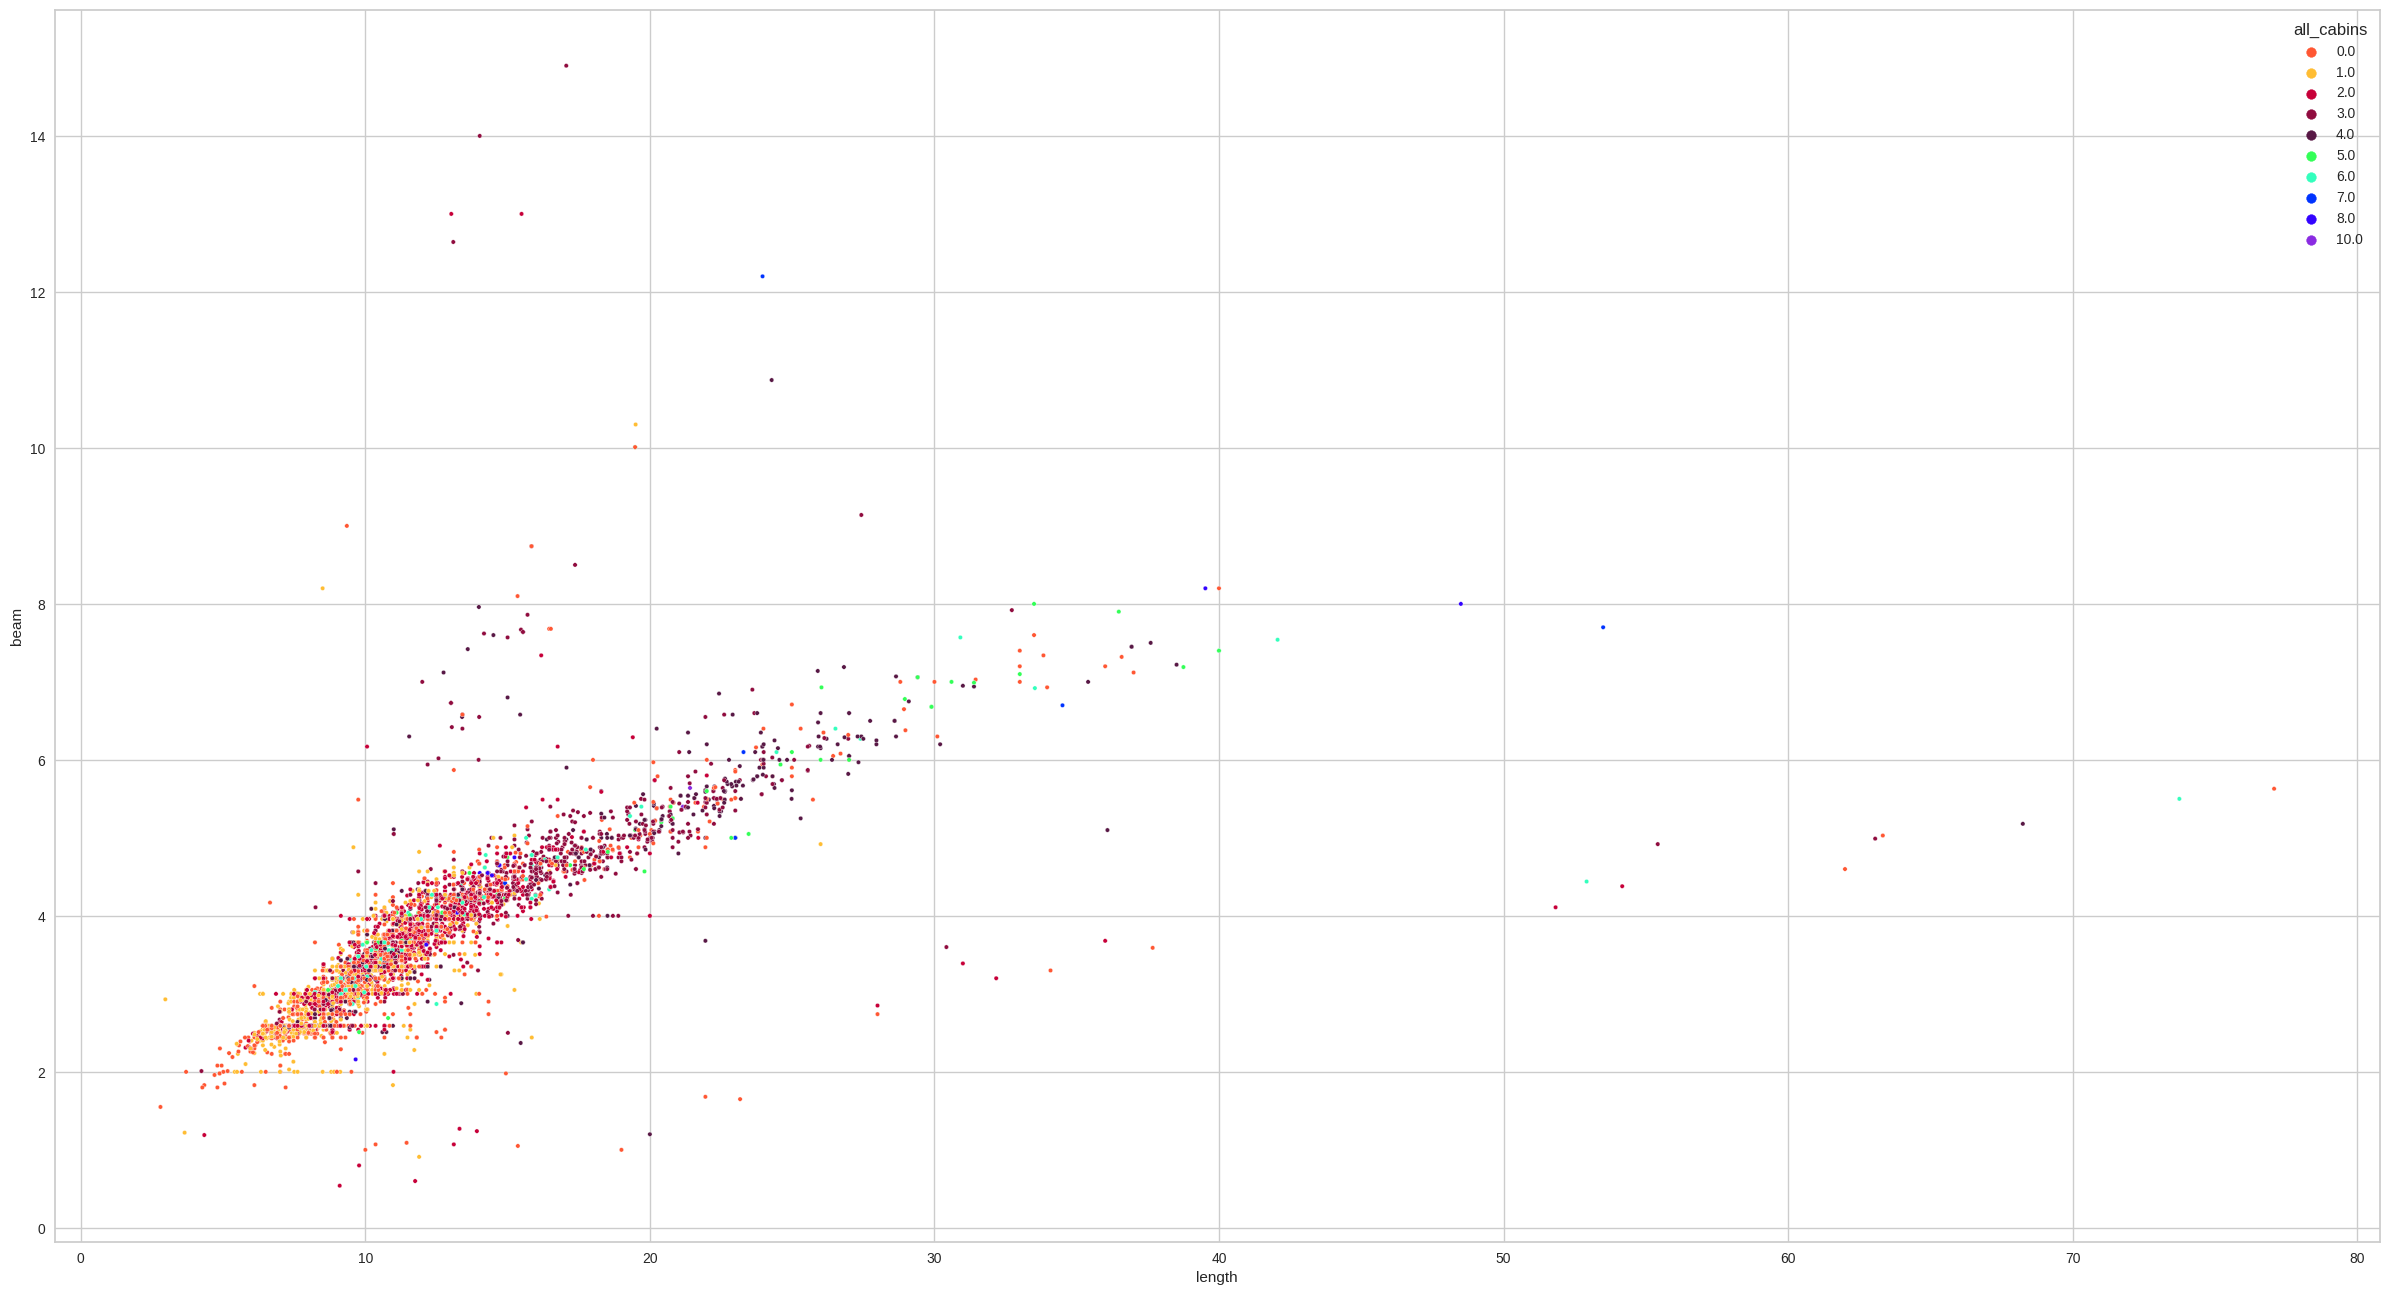

In [ ]:
plot_custom_scatter('length', 'beam', x_train_draft, 'all_cabins')

**CONCLUSIONS:**

A noticeable trend is that the larger the yacht the more cabins it has.

In [ ]:
x_train_draft['all_cabins'].value_counts()

2.0     1526
0.0     1440
1.0      955
3.0      747
4.0      628
6.0      266
5.0       79
8.0       14
7.0        7
10.0       2
Name: all_cabins, dtype: int64

Copy ***x_train_draft*** to avoid modifying the data

In [ ]:
x_train_all_cabins = x_train_draft.copy()

Determine the set where **'all_cabins'** == 0. For this set, the value of **'all_cabins'** is predicted based on KNN.

In [ ]:
zero_cabins_data = x_train_all_cabins[x_train_all_cabins['all_cabins'] == 0]
zero_cabins_data

year_of_production  length  beam  horse_power_sum  number_of_photos  \
1223              1989.0   12.44  4.14            600.0             126.0   
1109              2020.0    8.60  2.98            270.0              23.0   
2215              2004.0    8.84  2.44            500.0              42.0   
5187              2002.0   10.16  3.18            520.0              30.0   
6317              1984.0   10.29  3.66            700.0              20.0   
...                  ...     ...   ...              ...               ...   
5578              2020.0   11.56  3.50            440.0              40.0   
4426              1984.0    6.91  2.44            228.0               9.0   
5334              2019.0    9.63  2.59            300.0              45.0   
5226              2006.0   10.36  3.20            350.0              79.0   
7270              2016.0   10.44  3.10            600.0              24.0   

      all_cabins  all_bathrooms  Draft  
1223         0.0            2.0  2.072  
1109         0.0            1.0  1.456  
2215         0.0            0.0  1.372  
5187         0.0            1.0  1.652  
6317         0.0            1.0  0.840  
...          ...            ...    ...  
5578         0.0            1.0  1.140  
4426         0.0            1.0  1.179  
5334         0.0            1.0  0.860  
5226         0.0            1.0  0.410  
7270         0.0            1.0  1.664  

[1440 rows x 8 columns]

Get index where ***'all_cabins'*** == 0

In [ ]:
x_train_idx_drop_cabins = zero_cabins_data.index
x_train_idx_drop_cabins

Int64Index([1223, 1109, 2215, 5187, 6317, 1498, 6656, 5769, 5911, 4338,
            ...
            1267, 1899, 4843, 4117,  130, 5578, 4426, 5334, 5226, 7270],
           dtype='int64', length=1440)

Prediction of number of cabins based on KNN

In [ ]:
gs_knn_cab, X_train_knn_cab, y_train_knn_cab, y_train_pred_knn_cab, X_test_knn_cab, y_test_knn_cab, y_test_pred_knn_cab = knn_classificator_cabins(x_train_all_cabins, x_train_idx_drop_cabins, test_size=0.2, random_state=42)

Najlepsze parametry: {'knn__metric': 'minkowski', 'knn__n_neighbors': 41, 'knn__p': 1, 'knn__weights': 'distance'}
Test Accuracy: 0.6970414201183432
Train Accuracy: 0.9890500147972773
0.6970414201183432


Display confusion matrix on train set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


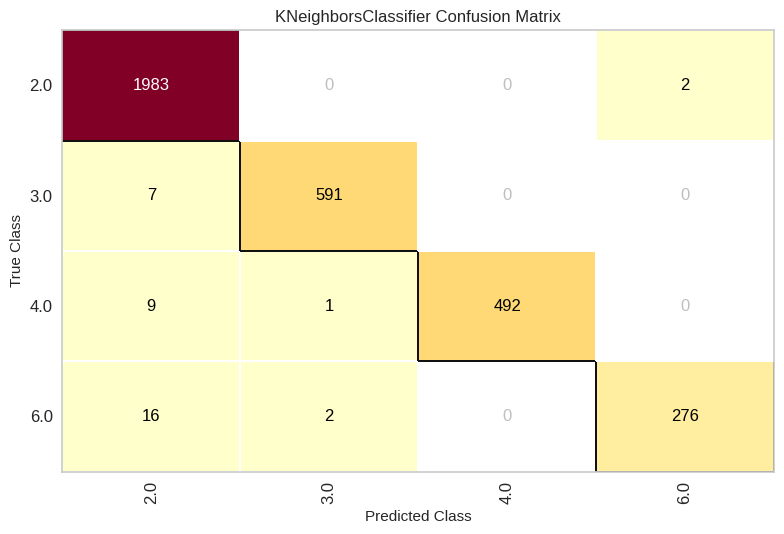

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_cab, X_train_knn_cab, y_train_knn_cab)

In [ ]:
knn_class_report_train = classification_report(y_train_knn_cab, y_train_pred_knn_cab)
print(knn_class_report_train)

              precision    recall  f1-score   support

         2.0       0.98      1.00      0.99      1985
         3.0       0.99      0.99      0.99       598
         4.0       1.00      0.98      0.99       502
         6.0       0.99      0.94      0.97       294

    accuracy                           0.99      3379
   macro avg       0.99      0.98      0.98      3379
weighted avg       0.99      0.99      0.99      3379



**CONCLUSIONS:**

The model performs very well in classification, especially for most classes, achieving high values for precision, recall, and F1 score. Further investigation and optimization may be needed to improve the recall for class 6.0 and to increase the balance between precision and recall for class 4.0

Display confusion matrix on test set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


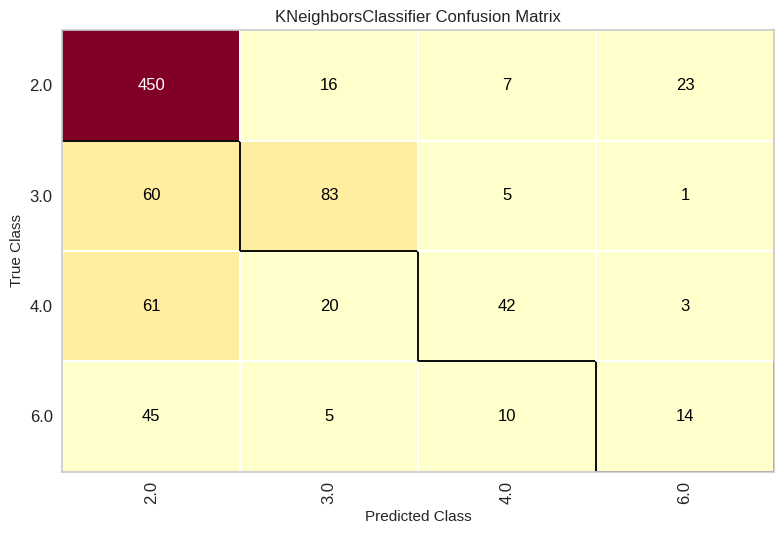

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_cab, X_test_knn_cab, y_test_knn_cab)

In [ ]:
knn_class_report_test = classification_report(y_test_knn_cab, y_test_pred_knn_cab)
print(knn_class_report_test)

              precision    recall  f1-score   support

         2.0       0.73      0.91      0.81       496
         3.0       0.67      0.56      0.61       149
         4.0       0.66      0.33      0.44       126
         6.0       0.34      0.19      0.24        74

    accuracy                           0.70       845
   macro avg       0.60      0.50      0.53       845
weighted avg       0.67      0.70      0.67       845



**CONCLUSIONS:**

Based on the metrics (precision, recall, F1 score) and the overall accuracy of the model on the test data, the following conclusions can be drawn:

Efficiency of the model: The overall accuracy of the model on the test data is 70%, which means that the model is able to correctly classify approximately 70% of the observations in the test set.

Inconsistent performance across classes:

  Class 2.0 has the highest precision (0.73) and sensitivity (0.91), indicating that the model successfully identifies this class.

  Class 3.0 has slightly lower precision (0.67) and sensitivity (0.56), suggesting that this class is slightly more difficult to identify.

  Class 4.0 has lower precision (0.66) and sensitivity (0.33), indicating that the model has difficulty in successfully classifying this class.

  Class 6.0 has the lowest precision (0.34) and sensitivity (0.19), indicating that the model has considerable difficulty in identifying this class.

Lowest scores for class 6.0: Class 6.0 has the lowest values for precision, sensitivity and F1, indicating that the model has significant difficulty in correctly identifying this class.



In summary, the model has some difficulty in correctly identifying classes, particularly for class 6.0, which may require further action such as model optimisation, hyperparameter adjustment or additional feature engineering to improve classification performance.

Prediction of data in ***'all_cabins'*** column using KNN model

In [ ]:
x_train_fillled_cabins = gs_knn_cab.predict(zero_cabins_data[['length', 'beam','all_bathrooms','horse_power_sum', 'year_of_production']])

Inserting predicted values into the data frame

In [ ]:
zero_cabins_data['all_cabins'] = x_train_fillled_cabins
zero_cabins_data

<ipython-input-99-c3ed5bd843d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_cabins_data['all_cabins'] = x_train_fillled_cabins


year_of_production  length  beam  horse_power_sum  number_of_photos  \
1223              1989.0   12.44  4.14            600.0             126.0   
1109              2020.0    8.60  2.98            270.0              23.0   
2215              2004.0    8.84  2.44            500.0              42.0   
5187              2002.0   10.16  3.18            520.0              30.0   
6317              1984.0   10.29  3.66            700.0              20.0   
...                  ...     ...   ...              ...               ...   
5578              2020.0   11.56  3.50            440.0              40.0   
4426              1984.0    6.91  2.44            228.0               9.0   
5334              2019.0    9.63  2.59            300.0              45.0   
5226              2006.0   10.36  3.20            350.0              79.0   
7270              2016.0   10.44  3.10            600.0              24.0   

      all_cabins  all_bathrooms  Draft  
1223         2.0            2.0  2.072  
1109         2.0            1.0  1.456  
2215         2.0            0.0  1.372  
5187         6.0            1.0  1.652  
6317         2.0            1.0  0.840  
...          ...            ...    ...  
5578         2.0            1.0  1.140  
4426         2.0            1.0  1.179  
5334         2.0            1.0  0.860  
5226         2.0            1.0  0.410  
7270         2.0            1.0  1.664  

[1440 rows x 8 columns]

Fill in the data in the column ***'all_cabins'*** with the required data.

In [ ]:
x_train_draft.loc[x_train_draft['all_cabins'] == 0, 'all_cabins'] = zero_cabins_data['all_cabins']
x_train_draft

year_of_production  length  beam  horse_power_sum  number_of_photos  \
6375              2006.0    9.14  3.35            440.0              27.0   
6082              1966.0   16.76  4.70            560.0               2.0   
2585              2012.0   11.46  3.71            600.0              28.0   
1049              2008.0   14.00  6.55            660.0              26.0   
626               1987.0   12.60  4.22             50.0              22.0   
...                  ...     ...   ...              ...               ...   
3772              2019.0    8.03  2.59            300.0              36.0   
5226              2006.0   10.36  3.20            350.0              79.0   
5390              2007.0    9.30  3.05            440.0              16.0   
860               2006.0    8.35  2.98            456.0              14.0   
7270              2016.0   10.44  3.10            600.0              24.0   

      all_cabins  all_bathrooms  Draft  
6375         3.0            1.0  0.840  
6082         3.0            3.0  1.220  
2585         2.0            1.0  1.888  
1049         3.0            6.0  1.400  
626          3.0            3.0  1.800  
...          ...            ...    ...  
3772         2.0            1.0  0.970  
5226         2.0            1.0  0.410  
5390         6.0            1.0  1.010  
860          1.0            1.0  1.431  
7270         2.0            1.0  1.664  

[5664 rows x 8 columns]

In [ ]:
x_train_draft.isna().sum()

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      0
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

In [ ]:
zero_counts = (x_train_draft == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
horse_power_sum         0
number_of_photos        3
all_cabins              0
all_bathrooms         516
Draft                   0
dtype: int64

**CONCLUSIONS:**

All data in the ***'all_cabins'*** column has been completed.

#####Complete **'all_bathrooms'**

Create a scatterplot for the number of bathrooms against ***'length'*** and ***'beam'***.

<ipython-input-56-216fcd3333fd>:6: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=x, y=y, data=X, palette=custom_colors, hue=hue, s=point_size)


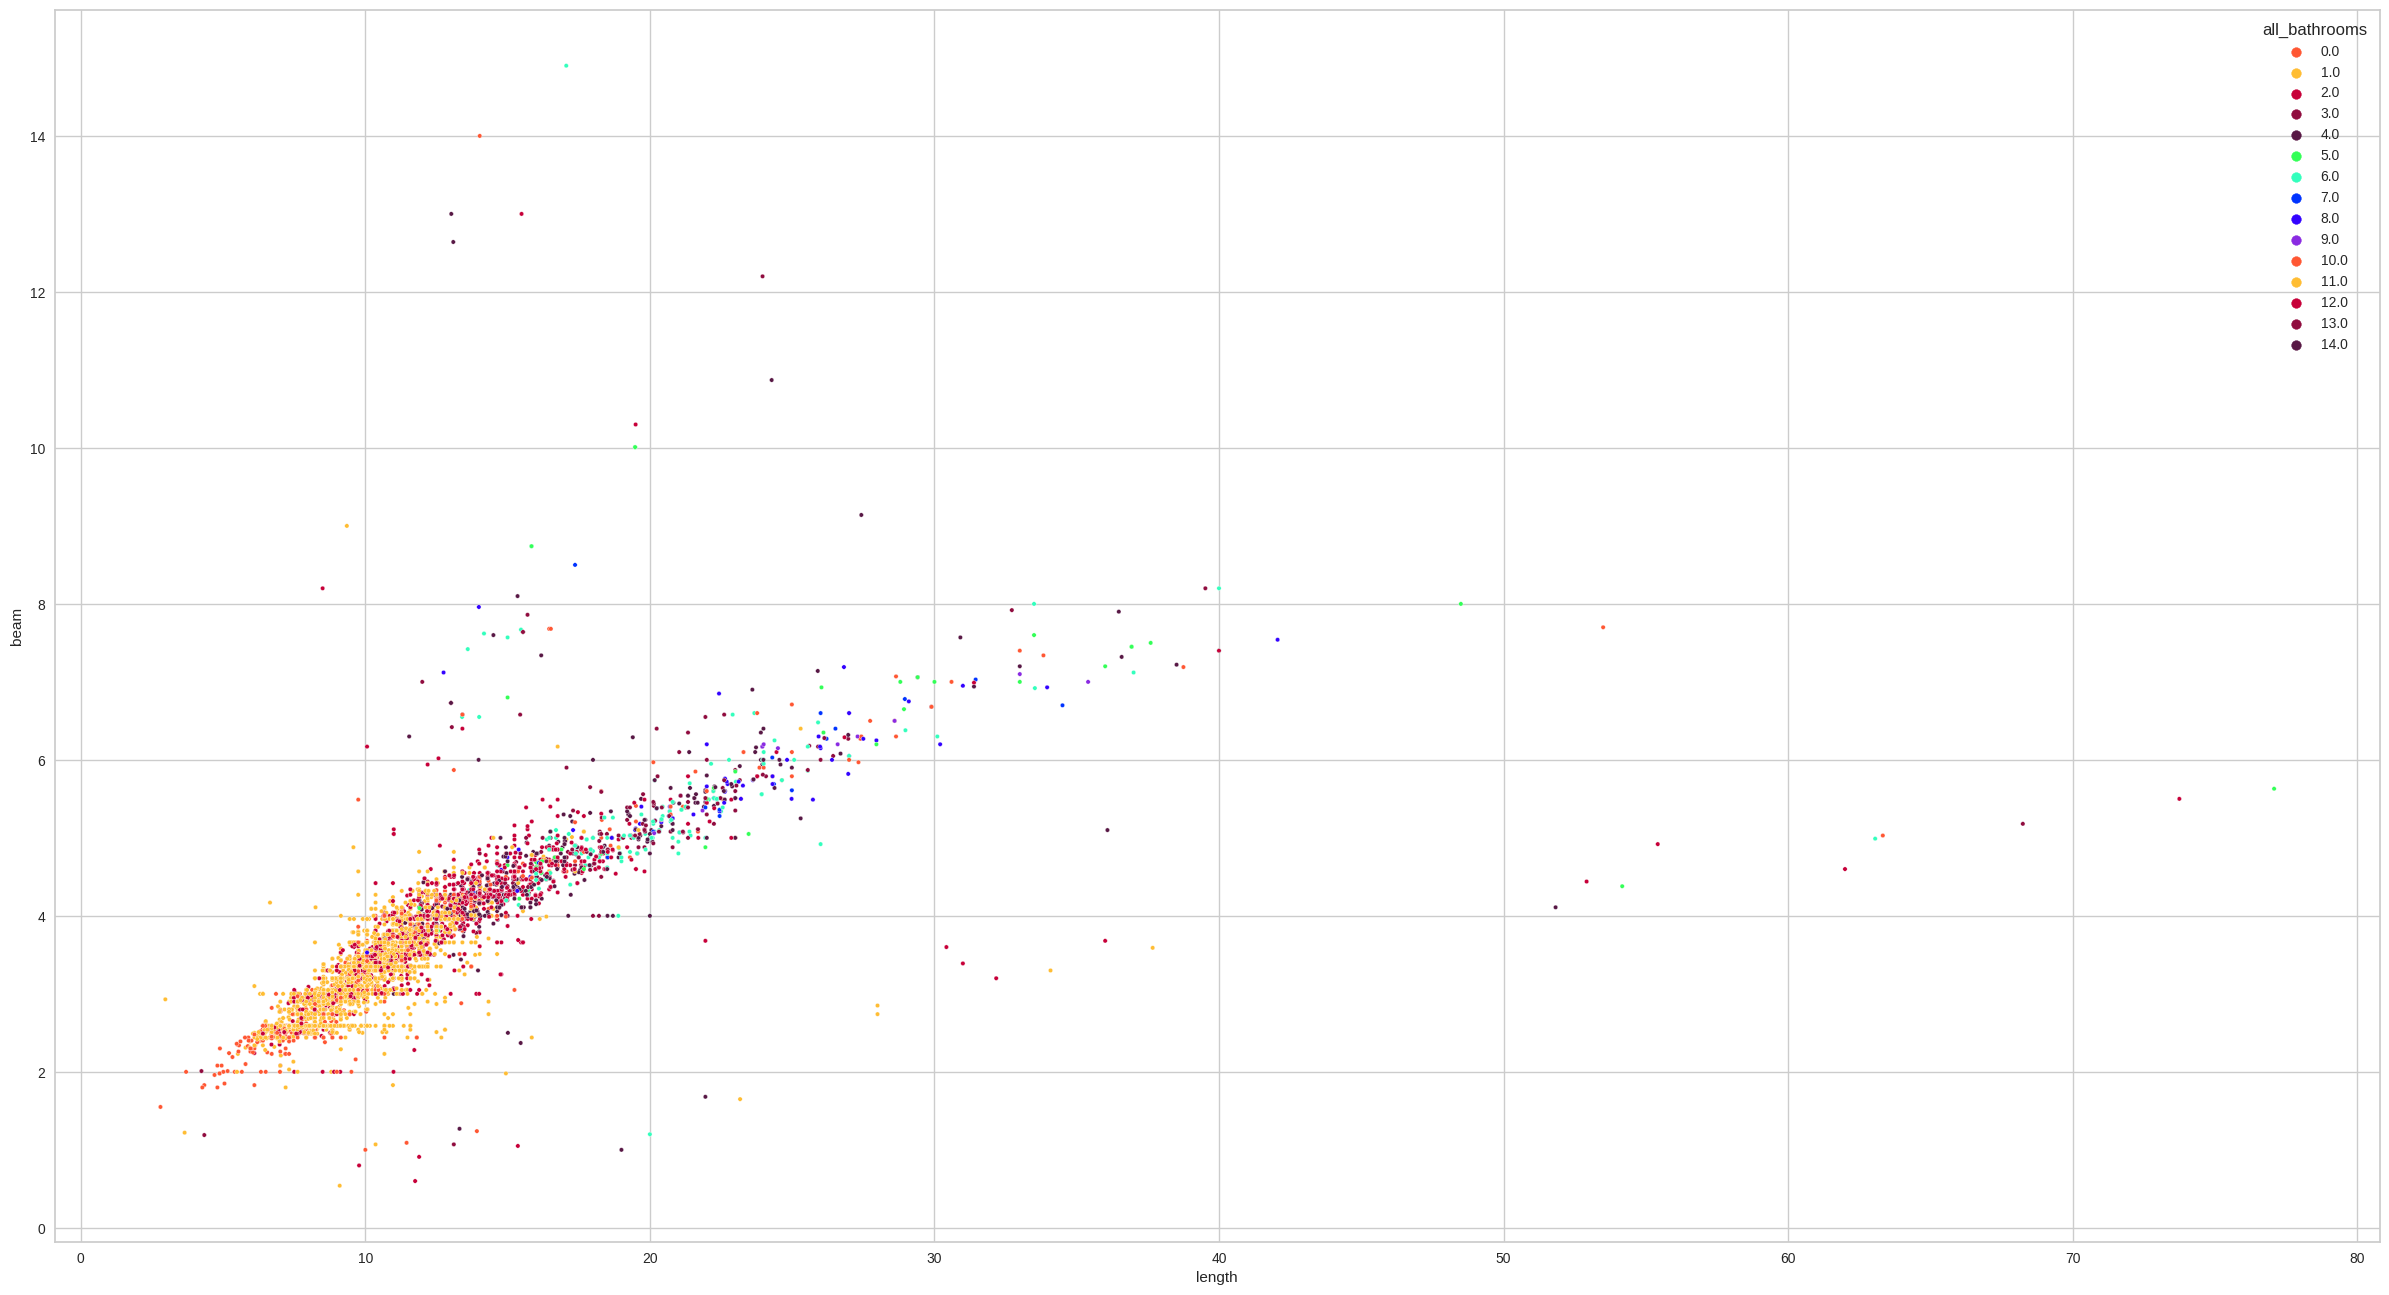

In [ ]:
plot_custom_scatter('length', 'beam', x_train_draft, 'all_bathrooms')

**CONCLUSIONS:**

A noticeable trend is that the larger the yacht the more bathrooms it has.

Add up how many yachts have a certain number of bathrooms.

In [ ]:
x_train_draft['all_bathrooms'].value_counts()

1.0     2981
2.0     1275
0.0      516
4.0      404
3.0      168
6.0      148
8.0       61
5.0       52
7.0       22
10.0      15
9.0       13
12.0       5
13.0       2
11.0       1
14.0       1
Name: all_bathrooms, dtype: int64

Copy ***x_train_draft*** to avoid modifying the data

In [ ]:
x_train_all_bathrooms = x_train_draft.copy()

Determine the set where ***'all_bathrooms'*** == 0. For this set, the value of ***'all_bathrooms'*** is predicted based on KNN.

In [ ]:
zero_bathrooms_data = x_train_all_bathrooms[x_train_all_bathrooms['all_bathrooms'] == 0]
zero_bathrooms_data

year_of_production  length  beam  horse_power_sum  number_of_photos  \
2215              2004.0    8.84  2.44            500.0              42.0   
1498              2006.0   11.43  3.66            740.0              20.0   
4338              2001.0   11.58  4.01            840.0              71.0   
640               2017.0    6.50  2.64            130.0              13.0   
3593              2017.0    9.14  3.05            450.0              24.0   
...                  ...     ...   ...              ...               ...   
2041              2010.0    7.32  2.23            375.0              19.0   
1267              2015.0    9.14  2.95            600.0              16.0   
1899              2005.0    9.45  2.74            500.0              48.0   
4117              2016.0    6.40  2.59            150.0              36.0   
1685              2015.0   10.97  3.74            625.0              19.0   

      all_cabins  all_bathrooms  Draft  
2215         2.0            0.0  1.372  
1498         2.0            0.0  0.810  
4338         2.0            0.0  1.960  
640          2.0            0.0  1.178  
3593         2.0            0.0  1.524  
...          ...            ...    ...  
2041         2.0            0.0  0.710  
1267         2.0            0.0  0.970  
1899         2.0            0.0  1.493  
4117         2.0            0.0  1.158  
1685         2.0            0.0  1.000  

[516 rows x 8 columns]

Get index where ***'all_bathrooms'*** == 0

In [ ]:
x_train_idx_drop_bath = zero_bathrooms_data.index
x_train_idx_drop_bath

Int64Index([2215, 1498, 4338,  640, 3593, 4047, 4034, 1902,  911, 6735,
            ...
            3561, 6331, 1275, 1021, 1585, 2041, 1267, 1899, 4117, 1685],
           dtype='int64', length=516)

Prediction of number of bathrooms based on KNN

In [ ]:
gs_knn_bath, X_train_knn_bath, y_train_knn_bath, y_train_pred_knn_bath, X_test_knn_bath, y_test_knn_bath, y_test_pred_knn_bath = knn_classificator_bathrooms(x_train_all_bathrooms, x_train_idx_drop_bath, test_size=0.2, random_state=42)

Najlepsze parametry: {'knn__metric': 'minkowski', 'knn__n_neighbors': 45, 'knn__p': 1, 'knn__weights': 'distance'}
Test Accuracy: 0.7359223300970874
Train Accuracy: 0.9963574550752793
0.7359223300970874


Display confusion matrix on train set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


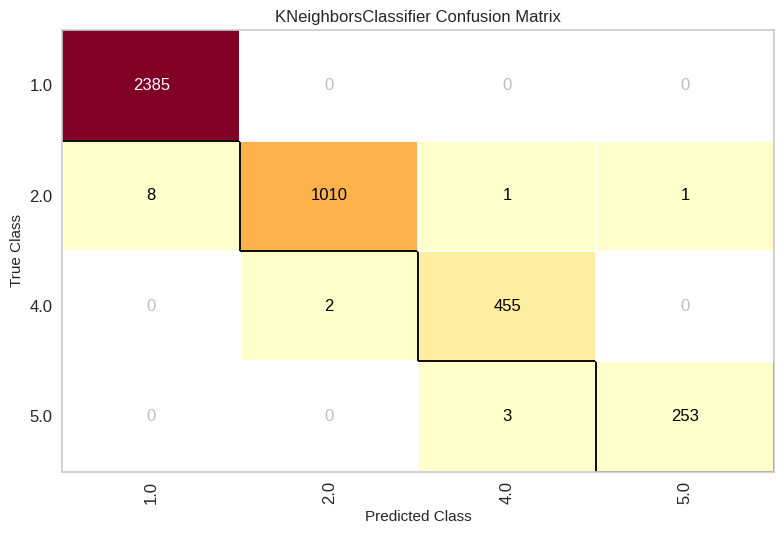

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_bath, X_train_knn_bath, y_train_knn_bath)

In [ ]:
knn_class_report_bath = classification_report(y_train_knn_bath, y_train_pred_knn_bath)
print(knn_class_report_bath)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2385
         2.0       1.00      0.99      0.99      1020
         4.0       0.99      1.00      0.99       457
         5.0       1.00      0.99      0.99       256

    accuracy                           1.00      4118
   macro avg       1.00      0.99      0.99      4118
weighted avg       1.00      1.00      1.00      4118



**CONCLUSIONS:**

In summary, the model appears to perform exceptionally well in classification, achieving excellent overall accuracy and showing very high values for precision, sensitivity and F1 score for most classes.

Display confusion matrix on test set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


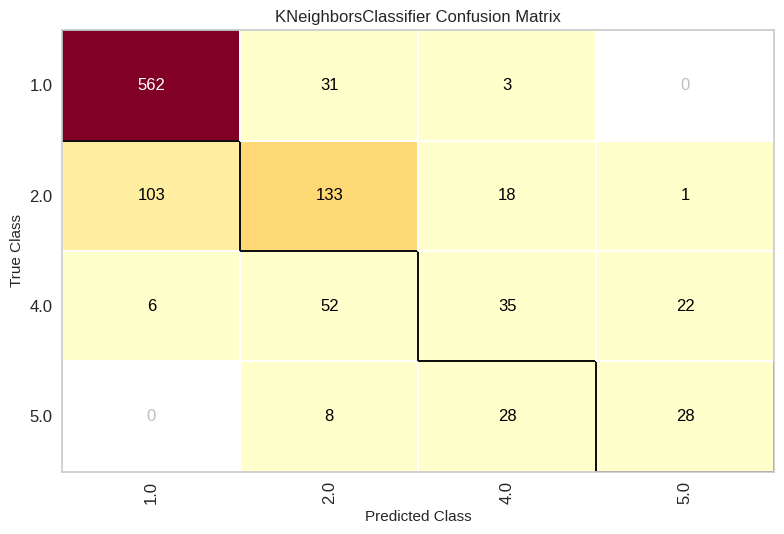

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_bath, X_test_knn_bath, y_test_knn_bath,)

In [ ]:
knn_class_report_bath = classification_report(y_test_knn_bath, y_test_pred_knn_bath)
print(knn_class_report_bath)

              precision    recall  f1-score   support

         1.0       0.84      0.94      0.89       596
         2.0       0.59      0.52      0.56       255
         4.0       0.42      0.30      0.35       115
         5.0       0.55      0.44      0.49        64

    accuracy                           0.74      1030
   macro avg       0.60      0.55      0.57      1030
weighted avg       0.71      0.74      0.72      1030



**CONCLUSIONS:**

The classification model has an overall accuracy (precision) of 74%. This means that the model is able to correctly classify approximately 74% of the observations in the dataset.

The performance of the classes is uneven:

Class 1.0 has a relatively high precision (0.84), recall (0.94), and F1 score (0.89), suggesting an effective identification of this class by the model.

Class 2.0 has lower precision (0.59) and recall (0.52), which may indicate some difficulty in identifying this class.

Class 4.0 has even lower values for precision (0.42) and recall (0.30), suggesting challenges in successfully classifying this class.

Class 5.0 also has moderate values for precision (0.55) and recall (0.44), which may indicate difficulties in identifying this class.

In summary, the model has some difficulty in correctly identifying classes, particularly for class 4.0 which may require further action such as model optimisation, hyperparameter adjustment or additional feature engineering to improve classification performance.

Prediction of data in ***'all_bathrooms'*** column using KNN model

In [ ]:
x_train_fillled_bathrooms = gs_knn_bath.predict(zero_bathrooms_data[['length', 'beam', 'all_cabins', 'horse_power_sum', 'year_of_production']])

Inserting predicted values into the data frame

In [ ]:
zero_bathrooms_data['all_bathrooms'] = x_train_fillled_bathrooms
zero_bathrooms_data

<ipython-input-114-0da73bc80f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_bathrooms_data['all_bathrooms'] = x_train_fillled_bathrooms


year_of_production  length  beam  horse_power_sum  number_of_photos  \
2215              2004.0    8.84  2.44            500.0              42.0   
1498              2006.0   11.43  3.66            740.0              20.0   
4338              2001.0   11.58  4.01            840.0              71.0   
640               2017.0    6.50  2.64            130.0              13.0   
3593              2017.0    9.14  3.05            450.0              24.0   
...                  ...     ...   ...              ...               ...   
2041              2010.0    7.32  2.23            375.0              19.0   
1267              2015.0    9.14  2.95            600.0              16.0   
1899              2005.0    9.45  2.74            500.0              48.0   
4117              2016.0    6.40  2.59            150.0              36.0   
1685              2015.0   10.97  3.74            625.0              19.0   

      all_cabins  all_bathrooms  Draft  
2215         2.0            1.0  1.372  
1498         2.0            1.0  0.810  
4338         2.0            1.0  1.960  
640          2.0            1.0  1.178  
3593         2.0            1.0  1.524  
...          ...            ...    ...  
2041         2.0            1.0  0.710  
1267         2.0            1.0  0.970  
1899         2.0            1.0  1.493  
4117         2.0            1.0  1.158  
1685         2.0            1.0  1.000  

[516 rows x 8 columns]

Fill in the data in the column ***'all_bathrooms'*** with the required data.

In [ ]:
x_train_draft.loc[x_train_draft['all_bathrooms'] == 0, 'all_bathrooms'] = zero_bathrooms_data['all_bathrooms']
x_train_draft

year_of_production  length  beam  horse_power_sum  number_of_photos  \
6375              2006.0    9.14  3.35            440.0              27.0   
6082              1966.0   16.76  4.70            560.0               2.0   
2585              2012.0   11.46  3.71            600.0              28.0   
1049              2008.0   14.00  6.55            660.0              26.0   
626               1987.0   12.60  4.22             50.0              22.0   
...                  ...     ...   ...              ...               ...   
3772              2019.0    8.03  2.59            300.0              36.0   
5226              2006.0   10.36  3.20            350.0              79.0   
5390              2007.0    9.30  3.05            440.0              16.0   
860               2006.0    8.35  2.98            456.0              14.0   
7270              2016.0   10.44  3.10            600.0              24.0   

      all_cabins  all_bathrooms  Draft  
6375         3.0            1.0  0.840  
6082         3.0            3.0  1.220  
2585         2.0            1.0  1.888  
1049         3.0            6.0  1.400  
626          3.0            3.0  1.800  
...          ...            ...    ...  
3772         2.0            1.0  0.970  
5226         2.0            1.0  0.410  
5390         6.0            1.0  1.010  
860          1.0            1.0  1.431  
7270         2.0            1.0  1.664  

[5664 rows x 8 columns]

In [ ]:
x_train_draft.isna().sum()

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      0
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

In [ ]:
zero_counts = (x_train_draft == 0).sum()
zero_counts

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      3
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

**CONCLUSIONS:**

All data in the ***'all_bathrooms'*** column has been completed.

####y_train

Search for indexes left over from ***X_train***


In [ ]:
x_train_selected_index_x = select_index_x(x_train_draft)

Selecting the same indexes for ***y_train*** as for ***X_train***

In [ ]:
y_train_selected = select_index_y(y_train, x_train_selected_index_x)
y_train_selected

price
6375   54379.53
6082  340444.85
2585  199000.00
1049  474829.87
626    75000.00
...         ...
3772   95812.27
5226  207587.40
5390   55264.62
860    48000.00
7270  259900.00

[5664 rows x 1 columns]

####df_train

Combination of ***X_train*** and ***y_train*** in a single data frame

In [ ]:
df_train_selected = create_df_fill(x_train_draft, y_train_selected)
df_train_selected

year_of_production  length  beam  horse_power_sum  number_of_photos  \
6375              2006.0    9.14  3.35            440.0              27.0   
6082              1966.0   16.76  4.70            560.0               2.0   
2585              2012.0   11.46  3.71            600.0              28.0   
1049              2008.0   14.00  6.55            660.0              26.0   
626               1987.0   12.60  4.22             50.0              22.0   
...                  ...     ...   ...              ...               ...   
3772              2019.0    8.03  2.59            300.0              36.0   
5226              2006.0   10.36  3.20            350.0              79.0   
5390              2007.0    9.30  3.05            440.0              16.0   
860               2006.0    8.35  2.98            456.0              14.0   
7270              2016.0   10.44  3.10            600.0              24.0   

      all_cabins  all_bathrooms  Draft      price  
6375         3.0            1.0  0.840   54379.53  
6082         3.0            3.0  1.220  340444.85  
2585         2.0            1.0  1.888  199000.00  
1049         3.0            6.0  1.400  474829.87  
626          3.0            3.0  1.800   75000.00  
...          ...            ...    ...        ...  
3772         2.0            1.0  0.970   95812.27  
5226         2.0            1.0  0.410  207587.40  
5390         6.0            1.0  1.010   55264.62  
860          1.0            1.0  1.431   48000.00  
7270         2.0            1.0  1.664  259900.00  

[5664 rows x 9 columns]

In [ ]:
df_train_selected.columns.tolist()

['year_of_production',
 'length',
 'beam',
 'horse_power_sum',
 'number_of_photos',
 'all_cabins',
 'all_bathrooms',
 'Draft',
 'price']

Display rows containing the value '0'

In [ ]:
rows_with_zeros = df_train_selected[df_train_selected.isin([0]).any(axis=1)]
rows_with_zeros

year_of_production  length  beam  horse_power_sum  number_of_photos  \
2195              2017.0    9.75  3.05            600.0               0.0   
2257              2008.0    7.92  3.05            270.0               0.0   
3582              2017.0    9.75  3.05            600.0               0.0   

      all_cabins  all_bathrooms  Draft      price  
2195         2.0            1.0  1.585  205921.46  
2257         1.0            1.0  0.900   81453.04  
3582         2.0            1.0  1.585  207074.79

In [ ]:
zero_counts = (df_train_selected == 0).sum()
zero_counts

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      3
all_cabins            0
all_bathrooms         0
Draft                 0
price                 0
dtype: int64

####Charts

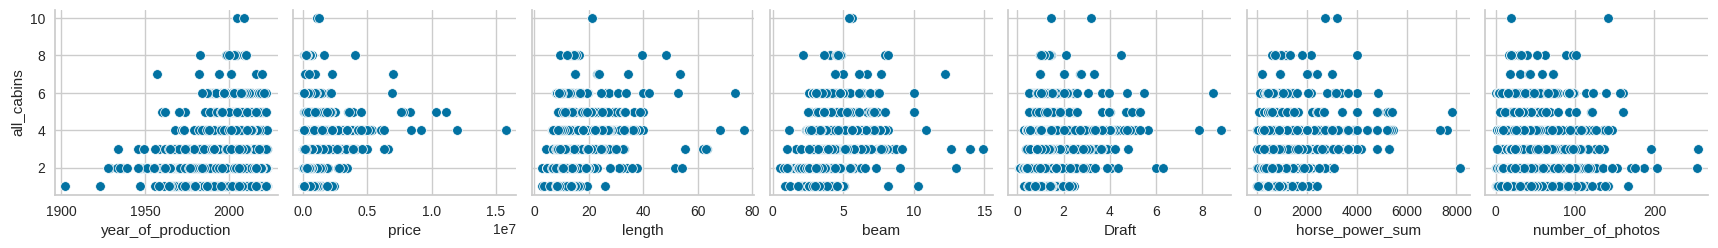

In [ ]:
plot_pairplot(df_train_selected, 'all_cabins', ['year_of_production', 'price', 'length', 'beam', 'Draft',
                              'horse_power_sum', 'number_of_photos'])

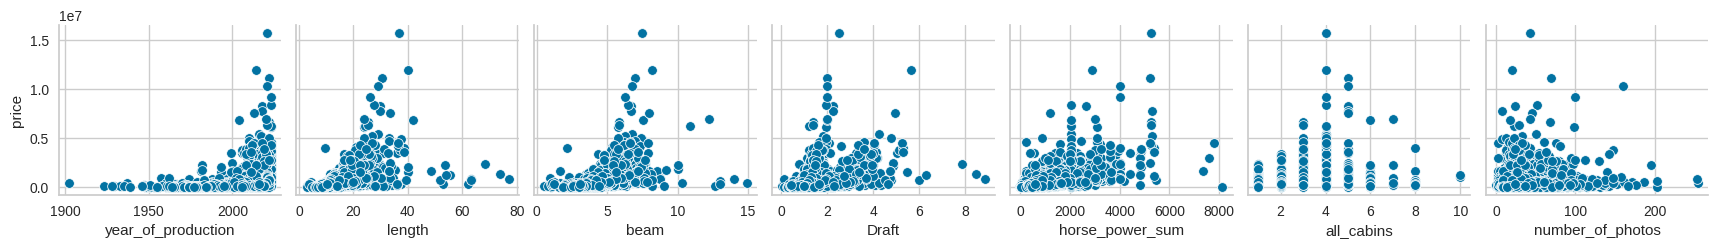

In [ ]:
plot_pairplot(df_train_selected, 'price', ['year_of_production', 'length', 'beam', 'Draft',
                              'horse_power_sum', 'all_cabins', 'number_of_photos'])

Create and display a scatter plot of ***'length'*** against ***'beam'***, coloured by ***'all_cabins'***

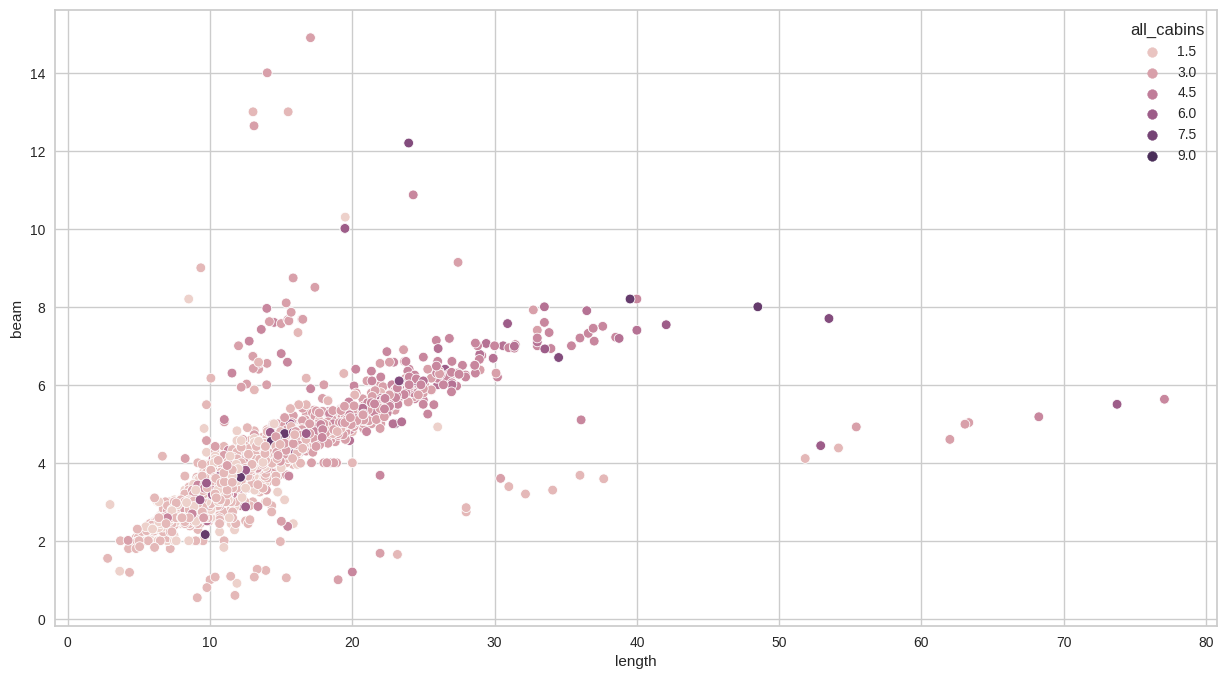

In [ ]:
plot_scatter_x_vs_y(df_train_selected, 'length', 'beam', 'all_cabins')

Create and display a scatter plot of ***'length'*** against ***'beam'***, coloured by ***'price'***

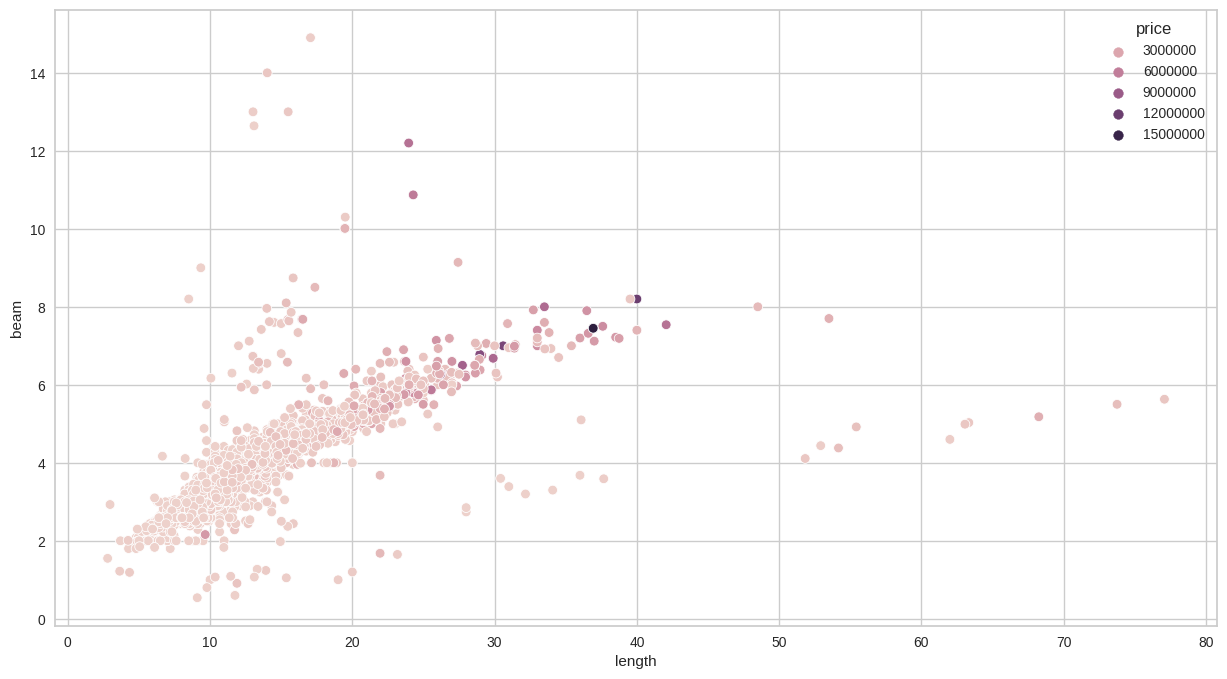

In [ ]:
plot_scatter_x_vs_y(df_train_selected, 'length', 'beam', 'price')

Create and display a scatter plot of ***'length'*** against ***'year_of_production'***, coloured by ***'price'***

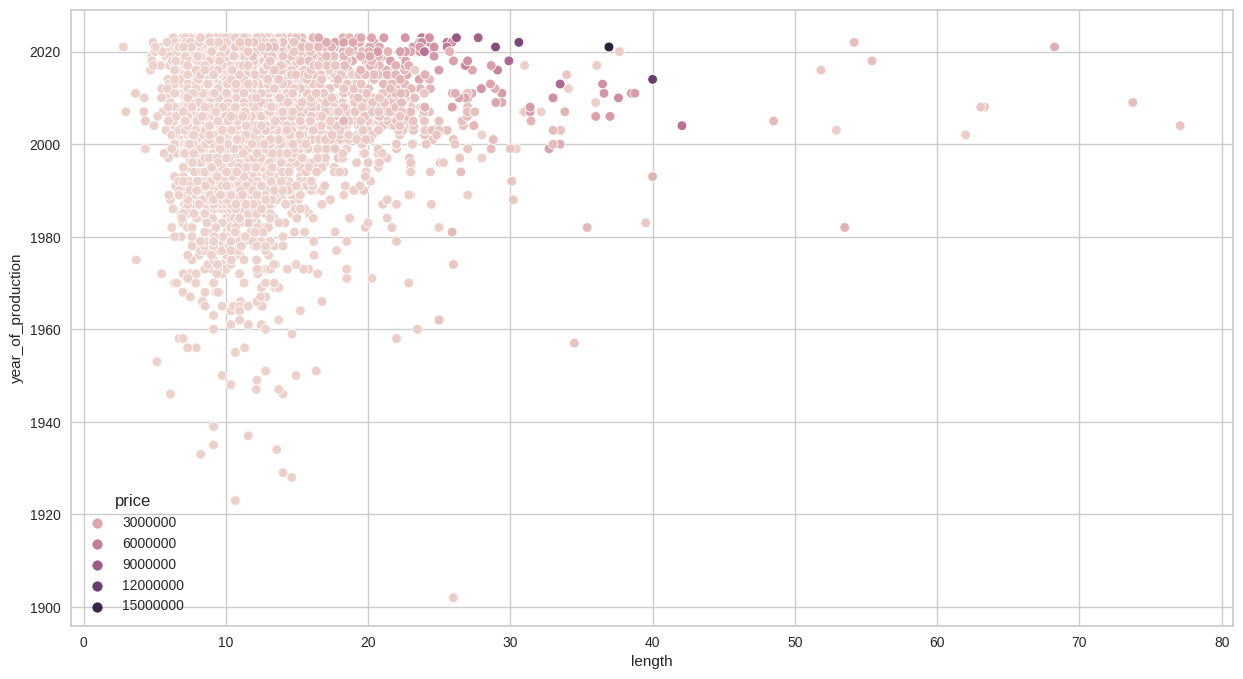

In [ ]:
plot_scatter_x_vs_y(df_train_selected, 'length', 'year_of_production', 'price')

**CONCLUSIONS:**

Analysing the maps, the following conclusions can be drawn
The larger the yacht, the more cabins.
The price of yachts increases significantly with the size of the yacht.
Large yachts depreciate more slowly.


###Test set

####X_test

#####Create an **'all_cabins'** column

In [ ]:
x_test_add_all_cabins = add_all_cabins(X_test)
x_test_add_all_cabins

year_of_production  length  beam  maxDraft  horse_power_sum  \
625               2008.0   12.00  3.00      1.00            900.0   
7031              2002.0   10.31  3.40      1.09              0.0   
101               2009.0   20.75  5.38       NaN           2400.0   
3956              2000.0   10.13  3.30      0.94            560.0   
2018              1996.0   13.72  4.62       NaN              0.0   
...                  ...     ...   ...       ...              ...   
751               2018.0   13.80  3.50       NaN              0.0   
2184              2015.0    8.53  2.44       NaN              0.0   
1872              2008.0    8.53  2.00      1.00            300.0   
4019              1973.0    6.40  2.00      0.80             10.0   
7010              2005.0   12.19  3.96      1.07            660.0   

      number_of_cabins  number_of_cabins_2  bathrooms  heads  \
625                1.0                 2.0        1.0    1.0   
7031               0.0                 6.0        0.0    1.0   
101                3.0                 0.0        0.0    3.0   
3956               0.0                 4.0        0.0    1.0   
2018               0.0                 0.0        0.0    2.0   
...                ...                 ...        ...    ...   
751                0.0                 0.0        0.0    1.0   
2184               0.0                 0.0        0.0    0.0   
1872               1.0                 4.0        0.0    1.0   
4019               0.0                 1.0        0.0    1.0   
7010               0.0                 0.0        0.0    1.0   

      number_of_photos  all_cabins  
625               13.0         1.0  
7031              17.0         6.0  
101                9.0         3.0  
3956              40.0         4.0  
2018              41.0         0.0  
...                ...         ...  
751               14.0         0.0  
2184              30.0         0.0  
1872              10.0         1.0  
4019              16.0         1.0  
7010              60.0         0.0  

[1487 rows x 11 columns]

Remove unnecessary columns from the Data Frame

In [ ]:
columns = ['number_of_cabins', 'number_of_cabins_2']
x_test_cabins = delete_unnecessary_columns(x_test_add_all_cabins, columns)
x_test_cabins

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
625               2008.0   12.00  3.00      1.00            900.0        1.0   
7031              2002.0   10.31  3.40      1.09              0.0        0.0   
101               2009.0   20.75  5.38       NaN           2400.0        0.0   
3956              2000.0   10.13  3.30      0.94            560.0        0.0   
2018              1996.0   13.72  4.62       NaN              0.0        0.0   
...                  ...     ...   ...       ...              ...        ...   
751               2018.0   13.80  3.50       NaN              0.0        0.0   
2184              2015.0    8.53  2.44       NaN              0.0        0.0   
1872              2008.0    8.53  2.00      1.00            300.0        0.0   
4019              1973.0    6.40  2.00      0.80             10.0        0.0   
7010              2005.0   12.19  3.96      1.07            660.0        0.0   

      heads  number_of_photos  all_cabins  
625     1.0              13.0         1.0  
7031    1.0              17.0         6.0  
101     3.0               9.0         3.0  
3956    1.0              40.0         4.0  
2018    2.0              41.0         0.0  
...     ...               ...         ...  
751     1.0              14.0         0.0  
2184    0.0              30.0         0.0  
1872    1.0              10.0         1.0  
4019    1.0              16.0         1.0  
7010    1.0              60.0         0.0  

[1487 rows x 9 columns]

**CONCLUSIONS:**

It can be seen from the summary above that outliers in the columns ***'length'*** and ***'beam'*** have been removed.

#####Remove outlines on **'length'**, **'beam'**

In [ ]:
x_test_length_beam = filter_length_beam(x_test_cabins)
x_test_length_beam

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
625               2008.0   12.00  3.00      1.00            900.0        1.0   
7031              2002.0   10.31  3.40      1.09              0.0        0.0   
101               2009.0   20.75  5.38       NaN           2400.0        0.0   
3956              2000.0   10.13  3.30      0.94            560.0        0.0   
2018              1996.0   13.72  4.62       NaN              0.0        0.0   
...                  ...     ...   ...       ...              ...        ...   
751               2018.0   13.80  3.50       NaN              0.0        0.0   
2184              2015.0    8.53  2.44       NaN              0.0        0.0   
1872              2008.0    8.53  2.00      1.00            300.0        0.0   
4019              1973.0    6.40  2.00      0.80             10.0        0.0   
7010              2005.0   12.19  3.96      1.07            660.0        0.0   

      heads  number_of_photos  all_cabins  
625     1.0              13.0         1.0  
7031    1.0              17.0         6.0  
101     3.0               9.0         3.0  
3956    1.0              40.0         4.0  
2018    2.0              41.0         0.0  
...     ...               ...         ...  
751     1.0              14.0         0.0  
2184    0.0              30.0         0.0  
1872    1.0              10.0         1.0  
4019    1.0              16.0         1.0  
7010    1.0              60.0         0.0  

[1414 rows x 9 columns]

In [ ]:
x_test_length_beam.describe()

year_of_production       length         beam    maxDraft  \
count         1414.000000  1414.000000  1414.000000  924.000000   
mean          2006.024045    11.830050     3.733437    1.176331   
std             11.736587     3.859174     1.621397    3.611645   
min           1911.000000     3.050000     0.100000    0.250000   
25%           2001.250000     9.147500     3.000000    0.890000   
50%           2007.000000    10.970000     3.560000    0.990000   
75%           2014.000000    13.310000     4.110000    1.120000   
max           2024.000000    27.430000    43.000000  110.000000   

       horse_power_sum    bathrooms        heads  number_of_photos  \
count       1414.00000  1414.000000  1414.000000       1413.000000   
mean         626.41582     0.373409     1.531825         32.391366   
std          654.42745     0.863197     8.530951         22.024783   
min            0.00000     0.000000     0.000000          2.000000   
25%          220.00000     0.000000     1.000000         17.000000   
50%          520.00000     0.000000     1.000000         26.000000   
75%          760.00000     0.000000     2.000000         42.000000   
max         5276.00000     6.000000   320.000000        145.000000   

        all_cabins  
count  1414.000000  
mean      1.920792  
std       1.672628  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max       9.000000

#####Remove **'beam'** >**'length'**

Delete rows where the value in the ***'beam'*** column > the value in the ***'length'*** column.
It is clear from experience that yachts cannot be wider than they are longer. These errors are due to poor completion of the form by the person placing the ad on the website.

In [ ]:
x_test_filter_beam_length = filter_data(x_test_length_beam, x_test_length_beam['beam'], x_test_length_beam['length'])
x_test_filter_beam_length

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
625               2008.0   12.00  3.00      1.00            900.0        1.0   
7031              2002.0   10.31  3.40      1.09              0.0        0.0   
101               2009.0   20.75  5.38       NaN           2400.0        0.0   
3956              2000.0   10.13  3.30      0.94            560.0        0.0   
2018              1996.0   13.72  4.62       NaN              0.0        0.0   
...                  ...     ...   ...       ...              ...        ...   
751               2018.0   13.80  3.50       NaN              0.0        0.0   
2184              2015.0    8.53  2.44       NaN              0.0        0.0   
1872              2008.0    8.53  2.00      1.00            300.0        0.0   
4019              1973.0    6.40  2.00      0.80             10.0        0.0   
7010              2005.0   12.19  3.96      1.07            660.0        0.0   

      heads  number_of_photos  all_cabins  
625     1.0              13.0         1.0  
7031    1.0              17.0         6.0  
101     3.0               9.0         3.0  
3956    1.0              40.0         4.0  
2018    2.0              41.0         0.0  
...     ...               ...         ...  
751     1.0              14.0         0.0  
2184    0.0              30.0         0.0  
1872    1.0              10.0         1.0  
4019    1.0              16.0         1.0  
7010    1.0              60.0         0.0  

[1406 rows x 9 columns]

#####Delete **'year_of_production'** > 2023

Delete rows where the value in the ***'year_of_production'*** column is greater than 2023. This is due to the fact that when downloading information from the website using the webscraper, only used yachts have been filtered out. It is therefore impossible for a yacht produced in 2024 to be used.

In [ ]:
x_test_year_of_production = filter_data(x_test_filter_beam_length, x_test_filter_beam_length['year_of_production'], 2024)
x_test_year_of_production

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
625               2008.0   12.00  3.00      1.00            900.0        1.0   
7031              2002.0   10.31  3.40      1.09              0.0        0.0   
101               2009.0   20.75  5.38       NaN           2400.0        0.0   
3956              2000.0   10.13  3.30      0.94            560.0        0.0   
2018              1996.0   13.72  4.62       NaN              0.0        0.0   
...                  ...     ...   ...       ...              ...        ...   
751               2018.0   13.80  3.50       NaN              0.0        0.0   
2184              2015.0    8.53  2.44       NaN              0.0        0.0   
1872              2008.0    8.53  2.00      1.00            300.0        0.0   
4019              1973.0    6.40  2.00      0.80             10.0        0.0   
7010              2005.0   12.19  3.96      1.07            660.0        0.0   

      heads  number_of_photos  all_cabins  
625     1.0              13.0         1.0  
7031    1.0              17.0         6.0  
101     3.0               9.0         3.0  
3956    1.0              40.0         4.0  
2018    2.0              41.0         0.0  
...     ...               ...         ...  
751     1.0              14.0         0.0  
2184    0.0              30.0         0.0  
1872    1.0              10.0         1.0  
4019    1.0              16.0         1.0  
7010    1.0              60.0         0.0  

[1402 rows x 9 columns]

#####Delete **'heads'** > 8

Remove rows where the value in the ***'heads'*** column is greater than 8. Some advertisers have entered the number of possible passengers on a yacht instead of the number of toilets.

In [ ]:
x_test_heads = filter_data(x_test_year_of_production, x_test_year_of_production['heads'], 9)
x_test_heads

year_of_production  length  beam  maxDraft  horse_power_sum  bathrooms  \
625               2008.0   12.00  3.00      1.00            900.0        1.0   
7031              2002.0   10.31  3.40      1.09              0.0        0.0   
101               2009.0   20.75  5.38       NaN           2400.0        0.0   
3956              2000.0   10.13  3.30      0.94            560.0        0.0   
2018              1996.0   13.72  4.62       NaN              0.0        0.0   
...                  ...     ...   ...       ...              ...        ...   
751               2018.0   13.80  3.50       NaN              0.0        0.0   
2184              2015.0    8.53  2.44       NaN              0.0        0.0   
1872              2008.0    8.53  2.00      1.00            300.0        0.0   
4019              1973.0    6.40  2.00      0.80             10.0        0.0   
7010              2005.0   12.19  3.96      1.07            660.0        0.0   

      heads  number_of_photos  all_cabins  
625     1.0              13.0         1.0  
7031    1.0              17.0         6.0  
101     3.0               9.0         3.0  
3956    1.0              40.0         4.0  
2018    2.0              41.0         0.0  
...     ...               ...         ...  
751     1.0              14.0         0.0  
2184    0.0              30.0         0.0  
1872    1.0              10.0         1.0  
4019    1.0              16.0         1.0  
7010    1.0              60.0         0.0  

[1401 rows x 9 columns]

#####Adding **'all_bathrooms'**

In [ ]:
x_test_bathrooms = add_all_bathrooms(x_test_heads)
x_test_bathrooms

<ipython-input-51-62b761c5c561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['all_bathrooms'] = X.apply(lambda row: row['heads'] + row['bathrooms'], axis=1)
<ipython-input-51-62b761c5c561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['heads', 'bathrooms'], axis =1, inplace=True)


year_of_production  length  beam  maxDraft  horse_power_sum  \
625               2008.0   12.00  3.00      1.00            900.0   
7031              2002.0   10.31  3.40      1.09              0.0   
101               2009.0   20.75  5.38       NaN           2400.0   
3956              2000.0   10.13  3.30      0.94            560.0   
2018              1996.0   13.72  4.62       NaN              0.0   
...                  ...     ...   ...       ...              ...   
751               2018.0   13.80  3.50       NaN              0.0   
2184              2015.0    8.53  2.44       NaN              0.0   
1872              2008.0    8.53  2.00      1.00            300.0   
4019              1973.0    6.40  2.00      0.80             10.0   
7010              2005.0   12.19  3.96      1.07            660.0   

      number_of_photos  all_cabins  all_bathrooms  
625               13.0         1.0            2.0  
7031              17.0         6.0            1.0  
101                9.0         3.0            3.0  
3956              40.0         4.0            1.0  
2018              41.0         0.0            2.0  
...                ...         ...            ...  
751               14.0         0.0            1.0  
2184              30.0         0.0            0.0  
1872              10.0         1.0            1.0  
4019              16.0         1.0            1.0  
7010              60.0         0.0            1.0  

[1401 rows x 8 columns]

In [ ]:
zero_counts = (x_test_bathrooms == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
maxDraft                0
horse_power_sum       245
number_of_photos        0
all_cabins            369
all_bathrooms         145
dtype: int64

In [ ]:
x_test_bathrooms.isna().sum()

year_of_production      0
length                  0
beam                    0
maxDraft              486
horse_power_sum         0
number_of_photos        1
all_cabins              0
all_bathrooms           0
dtype: int64

**CONCLUSIONS:**


A single column ***'all_bathrooms'*** has been created to replace the columns ***'heads'*** and ***'bathrooms'***.

#####Change the Nan value in the **'number_of_photos'** column to '0'

In [ ]:
x_test_photo = fill_nan(x_test_bathrooms, 'number_of_photos')
x_test_photo

<ipython-input-52-21fa41f7bda4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(0, inplace=True)


year_of_production  length  beam  maxDraft  horse_power_sum  \
625               2008.0   12.00  3.00      1.00            900.0   
7031              2002.0   10.31  3.40      1.09              0.0   
101               2009.0   20.75  5.38       NaN           2400.0   
3956              2000.0   10.13  3.30      0.94            560.0   
2018              1996.0   13.72  4.62       NaN              0.0   
...                  ...     ...   ...       ...              ...   
751               2018.0   13.80  3.50       NaN              0.0   
2184              2015.0    8.53  2.44       NaN              0.0   
1872              2008.0    8.53  2.00      1.00            300.0   
4019              1973.0    6.40  2.00      0.80             10.0   
7010              2005.0   12.19  3.96      1.07            660.0   

      number_of_photos  all_cabins  all_bathrooms  
625               13.0         1.0            2.0  
7031              17.0         6.0            1.0  
101                9.0         3.0            3.0  
3956              40.0         4.0            1.0  
2018              41.0         0.0            2.0  
...                ...         ...            ...  
751               14.0         0.0            1.0  
2184              30.0         0.0            0.0  
1872              10.0         1.0            1.0  
4019              16.0         1.0            1.0  
7010              60.0         0.0            1.0  

[1401 rows x 8 columns]

In [ ]:
x_test_photo.isna().sum()

year_of_production      0
length                  0
beam                    0
maxDraft              486
horse_power_sum         0
number_of_photos        0
all_cabins              0
all_bathrooms           0
dtype: int64

In [ ]:
zero_counts = (x_test_photo == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
maxDraft                0
horse_power_sum       245
number_of_photos        1
all_cabins            369
all_bathrooms         145
dtype: int64

**CONCLUSIONS:**

All Nan values in the ***'number_of_photos'*** column have been changed to '0' values, as there are no photos in these ads and the missing values need to be filled in with a digit for the rest of the project.

#####Complete **'horse_power_sum'**

In [ ]:
x_test_horse_power_1 = fill_horse_power_median_by_length(x_test_photo)
x_test_horse_power_1

year_of_production  length  beam  maxDraft  horse_power_sum  \
625               2008.0   12.00  3.00      1.00            900.0   
7031              2002.0   10.31  3.40      1.09            520.0   
101               2009.0   20.75  5.38       NaN           2400.0   
3956              2000.0   10.13  3.30      0.94            560.0   
2018              1996.0   13.72  4.62       NaN            840.0   
...                  ...     ...   ...       ...              ...   
751               2018.0   13.80  3.50       NaN            870.0   
2184              2015.0    8.53  2.44       NaN            320.0   
1872              2008.0    8.53  2.00      1.00            300.0   
4019              1973.0    6.40  2.00      0.80             10.0   
7010              2005.0   12.19  3.96      1.07            660.0   

      number_of_photos  all_cabins  all_bathrooms  
625               13.0         1.0            2.0  
7031              17.0         6.0            1.0  
101                9.0         3.0            3.0  
3956              40.0         4.0            1.0  
2018              41.0         0.0            2.0  
...                ...         ...            ...  
751               14.0         0.0            1.0  
2184              30.0         0.0            0.0  
1872              10.0         1.0            1.0  
4019              16.0         1.0            1.0  
7010              60.0         0.0            1.0  

[1401 rows x 8 columns]

In [ ]:
zero_counts = (x_test_horse_power_1 == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
maxDraft                0
horse_power_sum         0
number_of_photos        1
all_cabins            369
all_bathrooms         145
dtype: int64

In [ ]:
x_test_horse_power_1.isna().sum()

year_of_production      0
length                  0
beam                    0
maxDraft              486
horse_power_sum        48
number_of_photos        0
all_cabins              0
all_bathrooms           0
dtype: int64

In [ ]:
x_test_horse_power_2 = fill_nan(x_test_horse_power_1, 'horse_power_sum')
x_test_horse_power_2

year_of_production  length  beam  maxDraft  horse_power_sum  \
625               2008.0   12.00  3.00      1.00            900.0   
7031              2002.0   10.31  3.40      1.09            520.0   
101               2009.0   20.75  5.38       NaN           2400.0   
3956              2000.0   10.13  3.30      0.94            560.0   
2018              1996.0   13.72  4.62       NaN            840.0   
...                  ...     ...   ...       ...              ...   
751               2018.0   13.80  3.50       NaN            870.0   
2184              2015.0    8.53  2.44       NaN            320.0   
1872              2008.0    8.53  2.00      1.00            300.0   
4019              1973.0    6.40  2.00      0.80             10.0   
7010              2005.0   12.19  3.96      1.07            660.0   

      number_of_photos  all_cabins  all_bathrooms  
625               13.0         1.0            2.0  
7031              17.0         6.0            1.0  
101                9.0         3.0            3.0  
3956              40.0         4.0            1.0  
2018              41.0         0.0            2.0  
...                ...         ...            ...  
751               14.0         0.0            1.0  
2184              30.0         0.0            0.0  
1872              10.0         1.0            1.0  
4019              16.0         1.0            1.0  
7010              60.0         0.0            1.0  

[1401 rows x 8 columns]

In [ ]:
zero_counts = (x_test_horse_power_2 == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
maxDraft                0
horse_power_sum        48
number_of_photos        1
all_cabins            369
all_bathrooms         145
dtype: int64

In [ ]:
x_test_horse_power_2.isna().sum()

year_of_production      0
length                  0
beam                    0
maxDraft              486
horse_power_sum         0
number_of_photos        0
all_cabins              0
all_bathrooms           0
dtype: int64

In [ ]:
x_test_horse_power = fill_horse_power_for_zero(x_test_horse_power_2)
x_test_horse_power

year_of_production  length  beam  maxDraft  horse_power_sum  \
625               2008.0   12.00  3.00      1.00            900.0   
7031              2002.0   10.31  3.40      1.09            520.0   
101               2009.0   20.75  5.38       NaN           2400.0   
3956              2000.0   10.13  3.30      0.94            560.0   
2018              1996.0   13.72  4.62       NaN            840.0   
...                  ...     ...   ...       ...              ...   
751               2018.0   13.80  3.50       NaN            870.0   
2184              2015.0    8.53  2.44       NaN            320.0   
1872              2008.0    8.53  2.00      1.00            300.0   
4019              1973.0    6.40  2.00      0.80             10.0   
7010              2005.0   12.19  3.96      1.07            660.0   

      number_of_photos  all_cabins  all_bathrooms  
625               13.0         1.0            2.0  
7031              17.0         6.0            1.0  
101                9.0         3.0            3.0  
3956              40.0         4.0            1.0  
2018              41.0         0.0            2.0  
...                ...         ...            ...  
751               14.0         0.0            1.0  
2184              30.0         0.0            0.0  
1872              10.0         1.0            1.0  
4019              16.0         1.0            1.0  
7010              60.0         0.0            1.0  

[1401 rows x 8 columns]

In [ ]:
zero_counts = (x_test_horse_power == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
maxDraft                0
horse_power_sum         0
number_of_photos        1
all_cabins            369
all_bathrooms         145
dtype: int64

In [ ]:
x_test_horse_power.isna().sum()

year_of_production      0
length                  0
beam                    0
maxDraft              486
horse_power_sum         0
number_of_photos        0
all_cabins              0
all_bathrooms           0
dtype: int64

**CONCLUSIONS:**

All data in the ***'horse_power_sum'*** column has been completed.

#####Complete **'Draft'**

In [ ]:
x_test_draft = x_draft_process(x_test_horse_power)
x_test_draft

year_of_production  length  beam  horse_power_sum  number_of_photos  \
625               2008.0   12.00  3.00            900.0              13.0   
7031              2002.0   10.31  3.40            520.0              17.0   
101               2009.0   20.75  5.38           2400.0               9.0   
3956              2000.0   10.13  3.30            560.0              40.0   
2018              1996.0   13.72  4.62            840.0              41.0   
...                  ...     ...   ...              ...               ...   
751               2018.0   13.80  3.50            870.0              14.0   
2184              2015.0    8.53  2.44            320.0              30.0   
1872              2008.0    8.53  2.00            300.0              10.0   
4019              1973.0    6.40  2.00             10.0              16.0   
7010              2005.0   12.19  3.96            660.0              60.0   

      all_cabins  all_bathrooms  Draft  
625          1.0            2.0  1.000  
7031         6.0            1.0  1.090  
101          3.0            3.0  3.151  
3956         4.0            1.0  0.940  
2018         0.0            2.0  2.296  
...          ...            ...    ...  
751          0.0            1.0  2.080  
2184         0.0            0.0  1.341  
1872         1.0            1.0  1.000  
4019         1.0            1.0  0.800  
7010         0.0            1.0  1.070  

[1401 rows x 8 columns]

In [ ]:
zero_counts = (x_test_draft == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
horse_power_sum         0
number_of_photos        1
all_cabins            369
all_bathrooms         145
Draft                   0
dtype: int64

In [ ]:
x_train_draft.isna().sum()

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      0
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

In [ ]:
x_test_draft.columns.tolist()

['year_of_production',
 'length',
 'beam',
 'horse_power_sum',
 'number_of_photos',
 'all_cabins',
 'all_bathrooms',
 'Draft']

**CONCLUSIONS:**

Instead of the ***'maxDraft'*** column with the missing data, a ***'Draft'*** column has been created with the completed data.

#####Complete **'all_cabins'**

Create a scatterplot for the number of cabs against ***'length'*** and ***'beam'***.

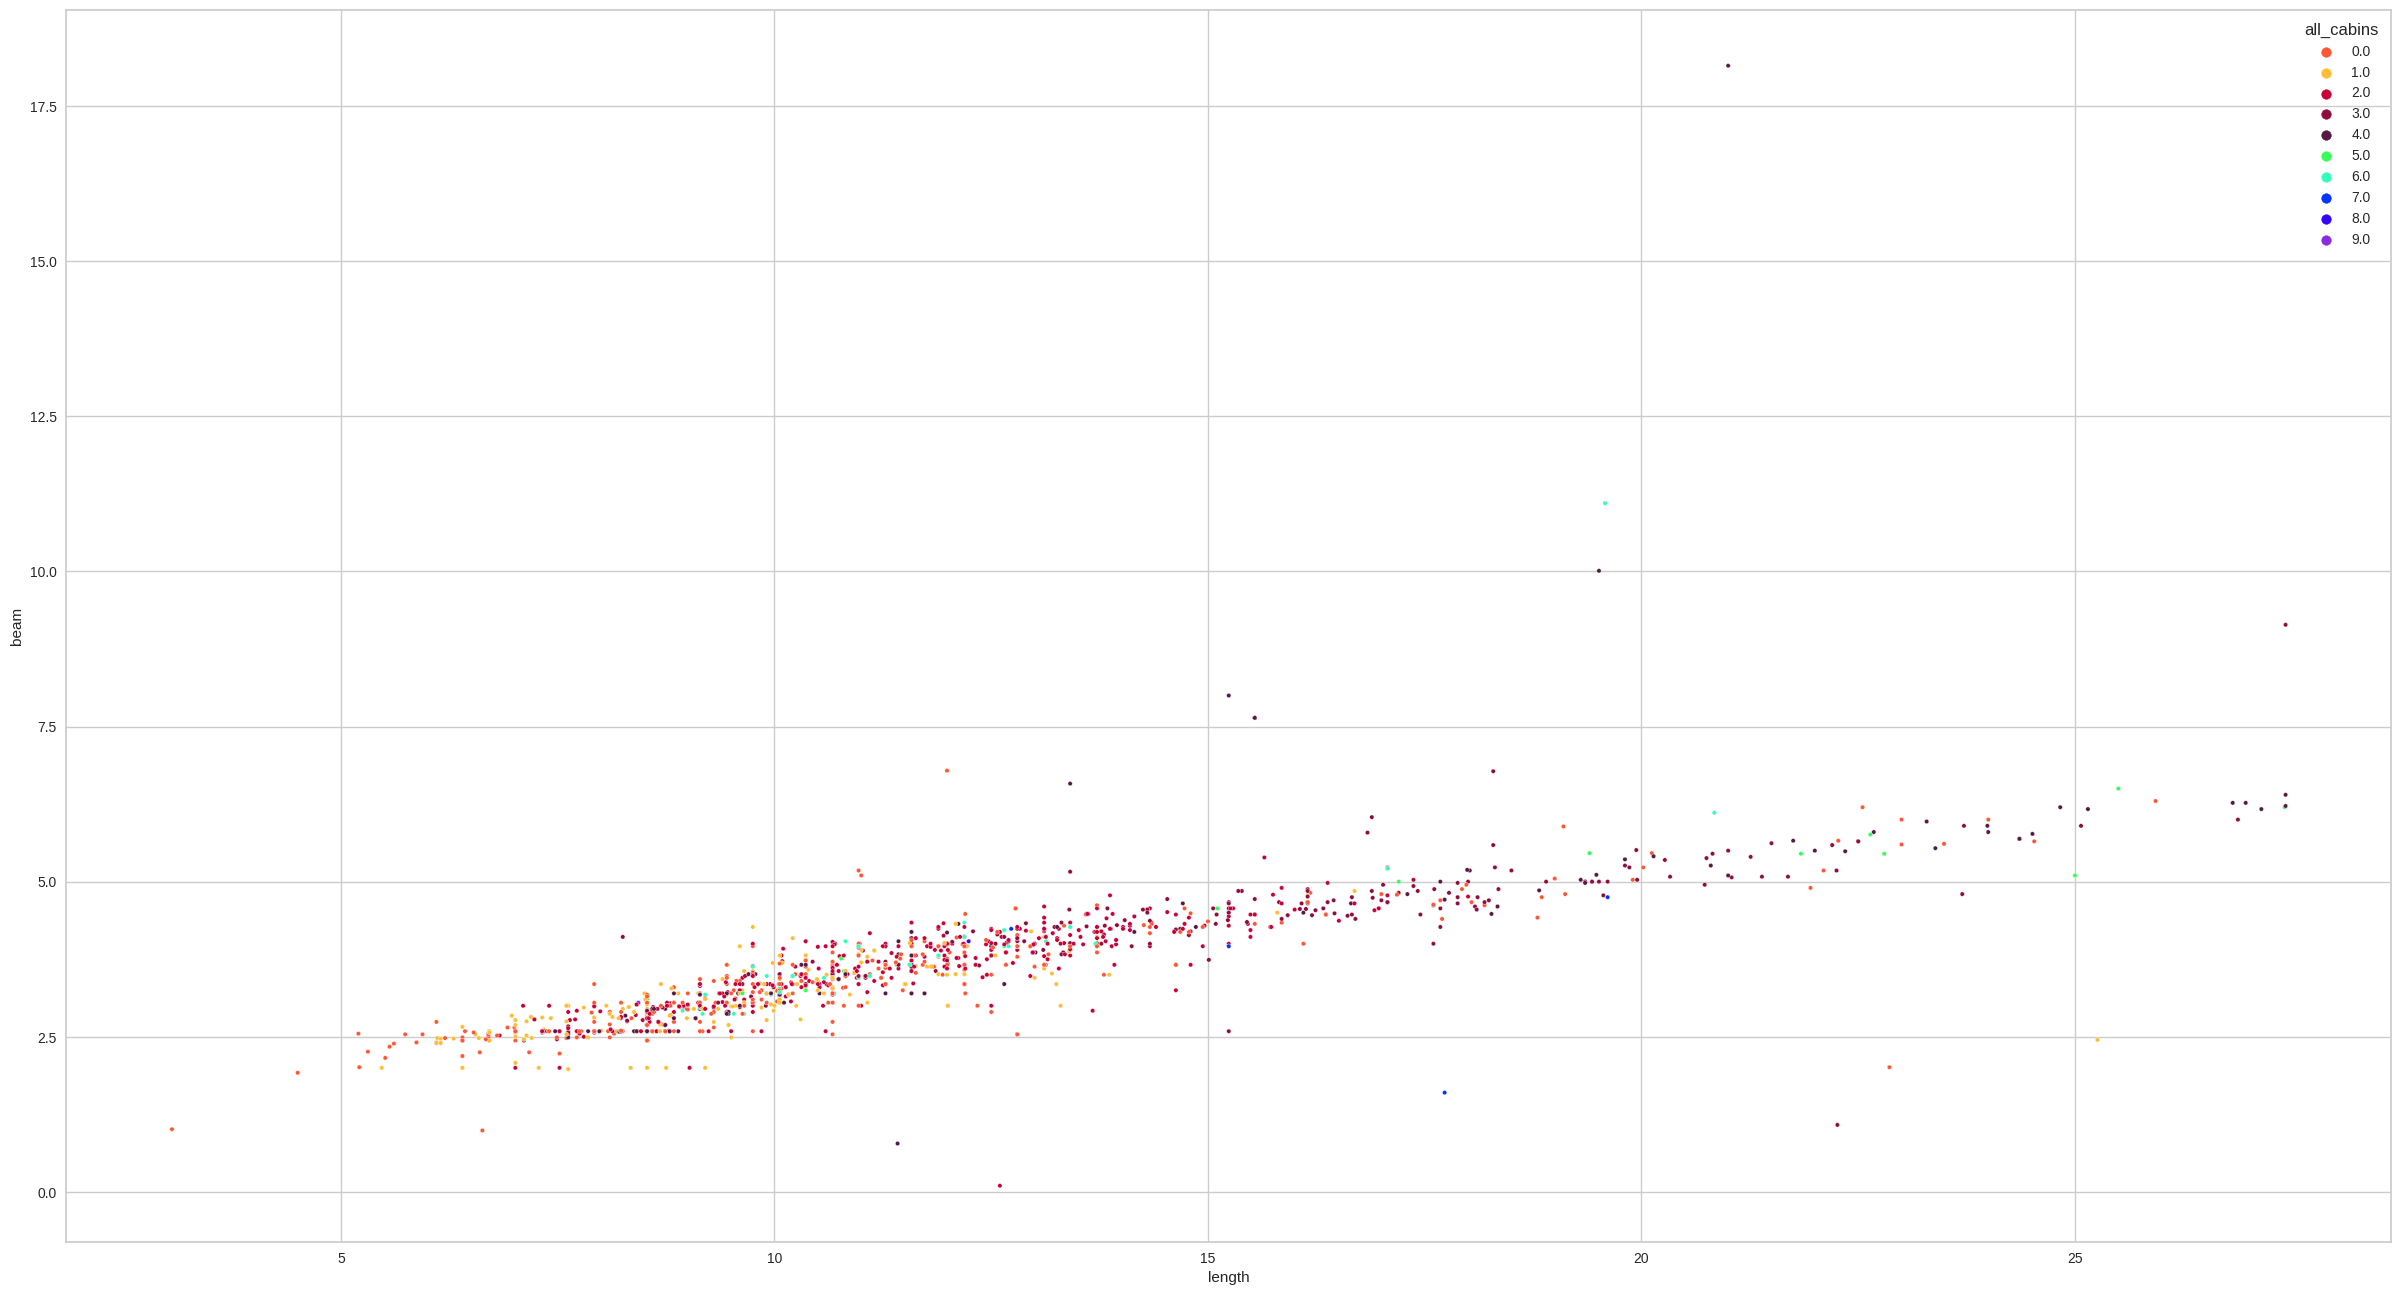

In [ ]:
plot_custom_scatter('length', 'beam', x_test_draft, 'all_cabins')

**CONCLUSIONS:**

A noticeable trend is that the larger the yacht the more cabins it has.

In [ ]:
x_test_draft['all_cabins'].value_counts()

2.0    380
0.0    369
1.0    225
3.0    175
4.0    163
6.0     63
5.0     18
7.0      5
8.0      2
9.0      1
Name: all_cabins, dtype: int64

Copy ***x_test_draft*** to avoid modifying the data

In [ ]:
x_test_all_cabins = x_test_draft.copy()

Determine the set where ***'all_cabins'*** == 0. For this set, the value of ***'all_cabins'*** is predicted based on KNN.

In [ ]:
zero_cabins_data = x_test_all_cabins[x_test_all_cabins['all_cabins'] == 0]
zero_cabins_data

year_of_production  length  beam  horse_power_sum  number_of_photos  \
2018              1996.0   13.72  4.62            840.0              41.0   
2865              1984.0   16.18  4.82            870.0              79.0   
5802              2000.0   17.68  4.70            840.0              96.0   
2579              1999.0   12.19  3.66            850.0              46.0   
1893              2022.0   11.28  3.35            640.0              29.0   
...                  ...     ...   ...              ...               ...   
438               2019.0   22.86  2.01           1240.0              20.0   
434               2001.0   10.06  3.45            620.0              34.0   
751               2018.0   13.80  3.50            870.0              14.0   
2184              2015.0    8.53  2.44            320.0              30.0   
7010              2005.0   12.19  3.96            660.0              60.0   

      all_cabins  all_bathrooms  Draft  
2018         0.0            2.0  2.296  
2865         0.0            3.0  1.220  
5802         0.0            2.0  1.580  
2579         0.0            1.0  1.951  
1893         0.0            0.0  1.798  
...          ...            ...    ...  
438          0.0            3.0  2.688  
434          0.0            1.0  1.696  
751          0.0            1.0  2.080  
2184         0.0            0.0  1.341  
7010         0.0            1.0  1.070  

[369 rows x 8 columns]

Get index where ***'all_cabins'*** == 0

In [ ]:
x_test_idx_drop_cabins = zero_cabins_data.index
x_test_idx_drop_cabins

Int64Index([2018, 2865, 5802, 2579, 1893, 1511, 1176, 1992, 6747, 2439,
            ...
            5167, 4213, 7110,  426,  805,  438,  434,  751, 2184, 7010],
           dtype='int64', length=369)

Prediction of number of cabins based on KNN

In [ ]:
gs_knn_cab_test, X_train_knn_cab_test, y_train_knn_cab_test, y_train_pred_knn_cab_test, X_test_knn_cab_test, y_test_knn_cab_test, y_test_pred_knn_cab_test = knn_classificator_cabins(x_test_all_cabins, x_test_idx_drop_cabins, test_size=0.2, random_state=42)

Najlepsze parametry: {'knn__metric': 'minkowski', 'knn__n_neighbors': 38, 'knn__p': 1, 'knn__weights': 'distance'}
Test Accuracy: 0.6763285024154589
Train Accuracy: 0.9927272727272727
0.6763285024154589


Display confusion matrix on train set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


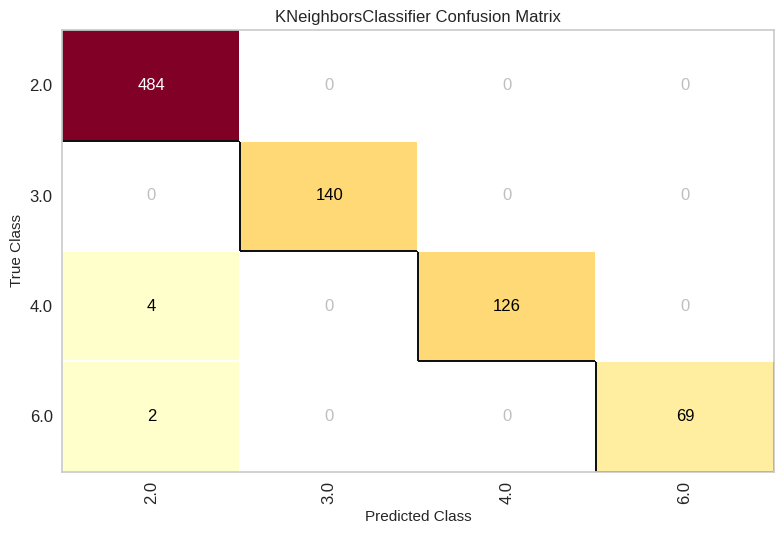

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_cab_test, X_train_knn_cab_test, y_train_knn_cab_test)

In [ ]:
knn_class_report_test = classification_report(y_train_knn_cab_test, y_train_pred_knn_cab_test)
print(knn_class_report_test)

              precision    recall  f1-score   support

         2.0       0.99      1.00      0.99       484
         3.0       1.00      1.00      1.00       140
         4.0       1.00      0.97      0.98       130
         6.0       1.00      0.97      0.99        71

    accuracy                           0.99       825
   macro avg       1.00      0.99      0.99       825
weighted avg       0.99      0.99      0.99       825



**CONCLUSIONS:**

The model achieves an overall accuracy (precision) of 99%, indicating that the model is able to correctly classify 99% of the observations in the dataset.

Display confusion matrix on test set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


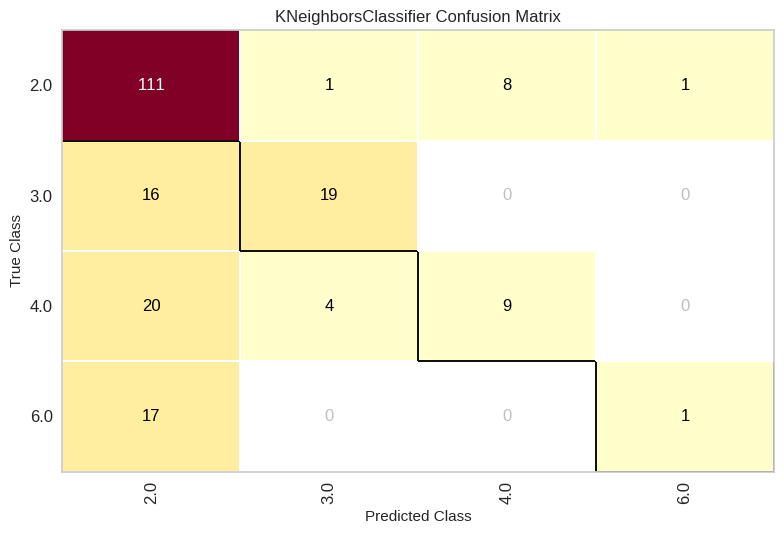

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_cab_test, X_test_knn_cab_test, y_test_knn_cab_test)

In [ ]:
knn_class_report_test = classification_report(y_test_knn_cab_test, y_test_pred_knn_cab_test)
print(knn_class_report_test)

              precision    recall  f1-score   support

         2.0       0.68      0.92      0.78       121
         3.0       0.79      0.54      0.64        35
         4.0       0.53      0.27      0.36        33
         6.0       0.50      0.06      0.10        18

    accuracy                           0.68       207
   macro avg       0.62      0.45      0.47       207
weighted avg       0.66      0.68      0.63       207



**CONCLUSIONS:**

The overall accuracy (precision) of the model is 68%, meaning that the model is able to correctly classify approximately 68% of the observations in the dataset.

Differences in effectiveness for different classes:

Class 2.0 seems to be the most effective classifier, obtaining relatively high
values for precision (0.68), recall (0.92) and F1 score (0.78). This means that the model has a relatively low number of false positives and a relatively high number of true positive predictions for this class.

Class 3.0 has lower values for precision (0.79), recall (0.54) and F1 score (0.64) compared to class 2.0, indicating that the model has difficulty identifying this class.

Class 4.0 has even lower values for precision (0.53), recall (0.27) and F1 score (0.36), suggesting challenges in successfully classifying this class.

Class 6.0 has the lowest values for precision (0.50), recall (0.06) and F1 score (0.10), indicating that the model has significant difficulties in identifying this class.


Mean values:
The macro-average precision, recall and F1 score are 0.62, 0.45 and 0.47 respectively, indicating the overall moderate performance of the model in classifying the different classes.


In summary, the model shows moderate performance in classifying the different classes. The classification of class 2.0 is relatively effective, while classes 3.0, 4.0 and 6.0 present more difficulties. Optimisation of the model and further research may be necessary to improve classification performance, especially for more difficult to identify classes.

Prediction of data in ***'all_cabins'*** column using KNN model

In [ ]:
x_test_fillled_cabins = gs_knn_cab_test.predict(zero_cabins_data[['length', 'beam','all_bathrooms','horse_power_sum', 'year_of_production']])

Inserting predicted values into the data frame

In [ ]:
zero_cabins_data['all_cabins'] = x_test_fillled_cabins
zero_cabins_data

<ipython-input-166-f2345cdc5590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_cabins_data['all_cabins'] = x_test_fillled_cabins


year_of_production  length  beam  horse_power_sum  number_of_photos  \
2018              1996.0   13.72  4.62            840.0              41.0   
2865              1984.0   16.18  4.82            870.0              79.0   
5802              2000.0   17.68  4.70            840.0              96.0   
2579              1999.0   12.19  3.66            850.0              46.0   
1893              2022.0   11.28  3.35            640.0              29.0   
...                  ...     ...   ...              ...               ...   
438               2019.0   22.86  2.01           1240.0              20.0   
434               2001.0   10.06  3.45            620.0              34.0   
751               2018.0   13.80  3.50            870.0              14.0   
2184              2015.0    8.53  2.44            320.0              30.0   
7010              2005.0   12.19  3.96            660.0              60.0   

      all_cabins  all_bathrooms  Draft  
2018         2.0            2.0  2.296  
2865         2.0            3.0  1.220  
5802         2.0            2.0  1.580  
2579         2.0            1.0  1.951  
1893         2.0            0.0  1.798  
...          ...            ...    ...  
438          3.0            3.0  2.688  
434          2.0            1.0  1.696  
751          2.0            1.0  2.080  
2184         2.0            0.0  1.341  
7010         2.0            1.0  1.070  

[369 rows x 8 columns]

Fill in the data in the column ***'all_cabins'*** with the required data.

In [ ]:
x_test_draft.loc[x_test_draft['all_cabins'] == 0, 'all_cabins'] = zero_cabins_data['all_cabins']
x_test_draft

year_of_production  length  beam  horse_power_sum  number_of_photos  \
625               2008.0   12.00  3.00            900.0              13.0   
7031              2002.0   10.31  3.40            520.0              17.0   
101               2009.0   20.75  5.38           2400.0               9.0   
3956              2000.0   10.13  3.30            560.0              40.0   
2018              1996.0   13.72  4.62            840.0              41.0   
...                  ...     ...   ...              ...               ...   
751               2018.0   13.80  3.50            870.0              14.0   
2184              2015.0    8.53  2.44            320.0              30.0   
1872              2008.0    8.53  2.00            300.0              10.0   
4019              1973.0    6.40  2.00             10.0              16.0   
7010              2005.0   12.19  3.96            660.0              60.0   

      all_cabins  all_bathrooms  Draft  
625          1.0            2.0  1.000  
7031         6.0            1.0  1.090  
101          3.0            3.0  3.151  
3956         4.0            1.0  0.940  
2018         2.0            2.0  2.296  
...          ...            ...    ...  
751          2.0            1.0  2.080  
2184         2.0            0.0  1.341  
1872         1.0            1.0  1.000  
4019         1.0            1.0  0.800  
7010         2.0            1.0  1.070  

[1401 rows x 8 columns]

In [ ]:
x_test_draft.isna().sum()

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      0
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

In [ ]:
zero_counts = (x_test_draft == 0).sum()
zero_counts

year_of_production      0
length                  0
beam                    0
horse_power_sum         0
number_of_photos        1
all_cabins              0
all_bathrooms         145
Draft                   0
dtype: int64

**CONCLUSIONS:**

All data in the ***'all_cabins'*** column has been completed.

#####Complete **'all_bathrooms'**

Create a scatterplot for the number of bathrooms against ***'length'*** and ***'beam'***.

<ipython-input-56-216fcd3333fd>:6: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=x, y=y, data=X, palette=custom_colors, hue=hue, s=point_size)


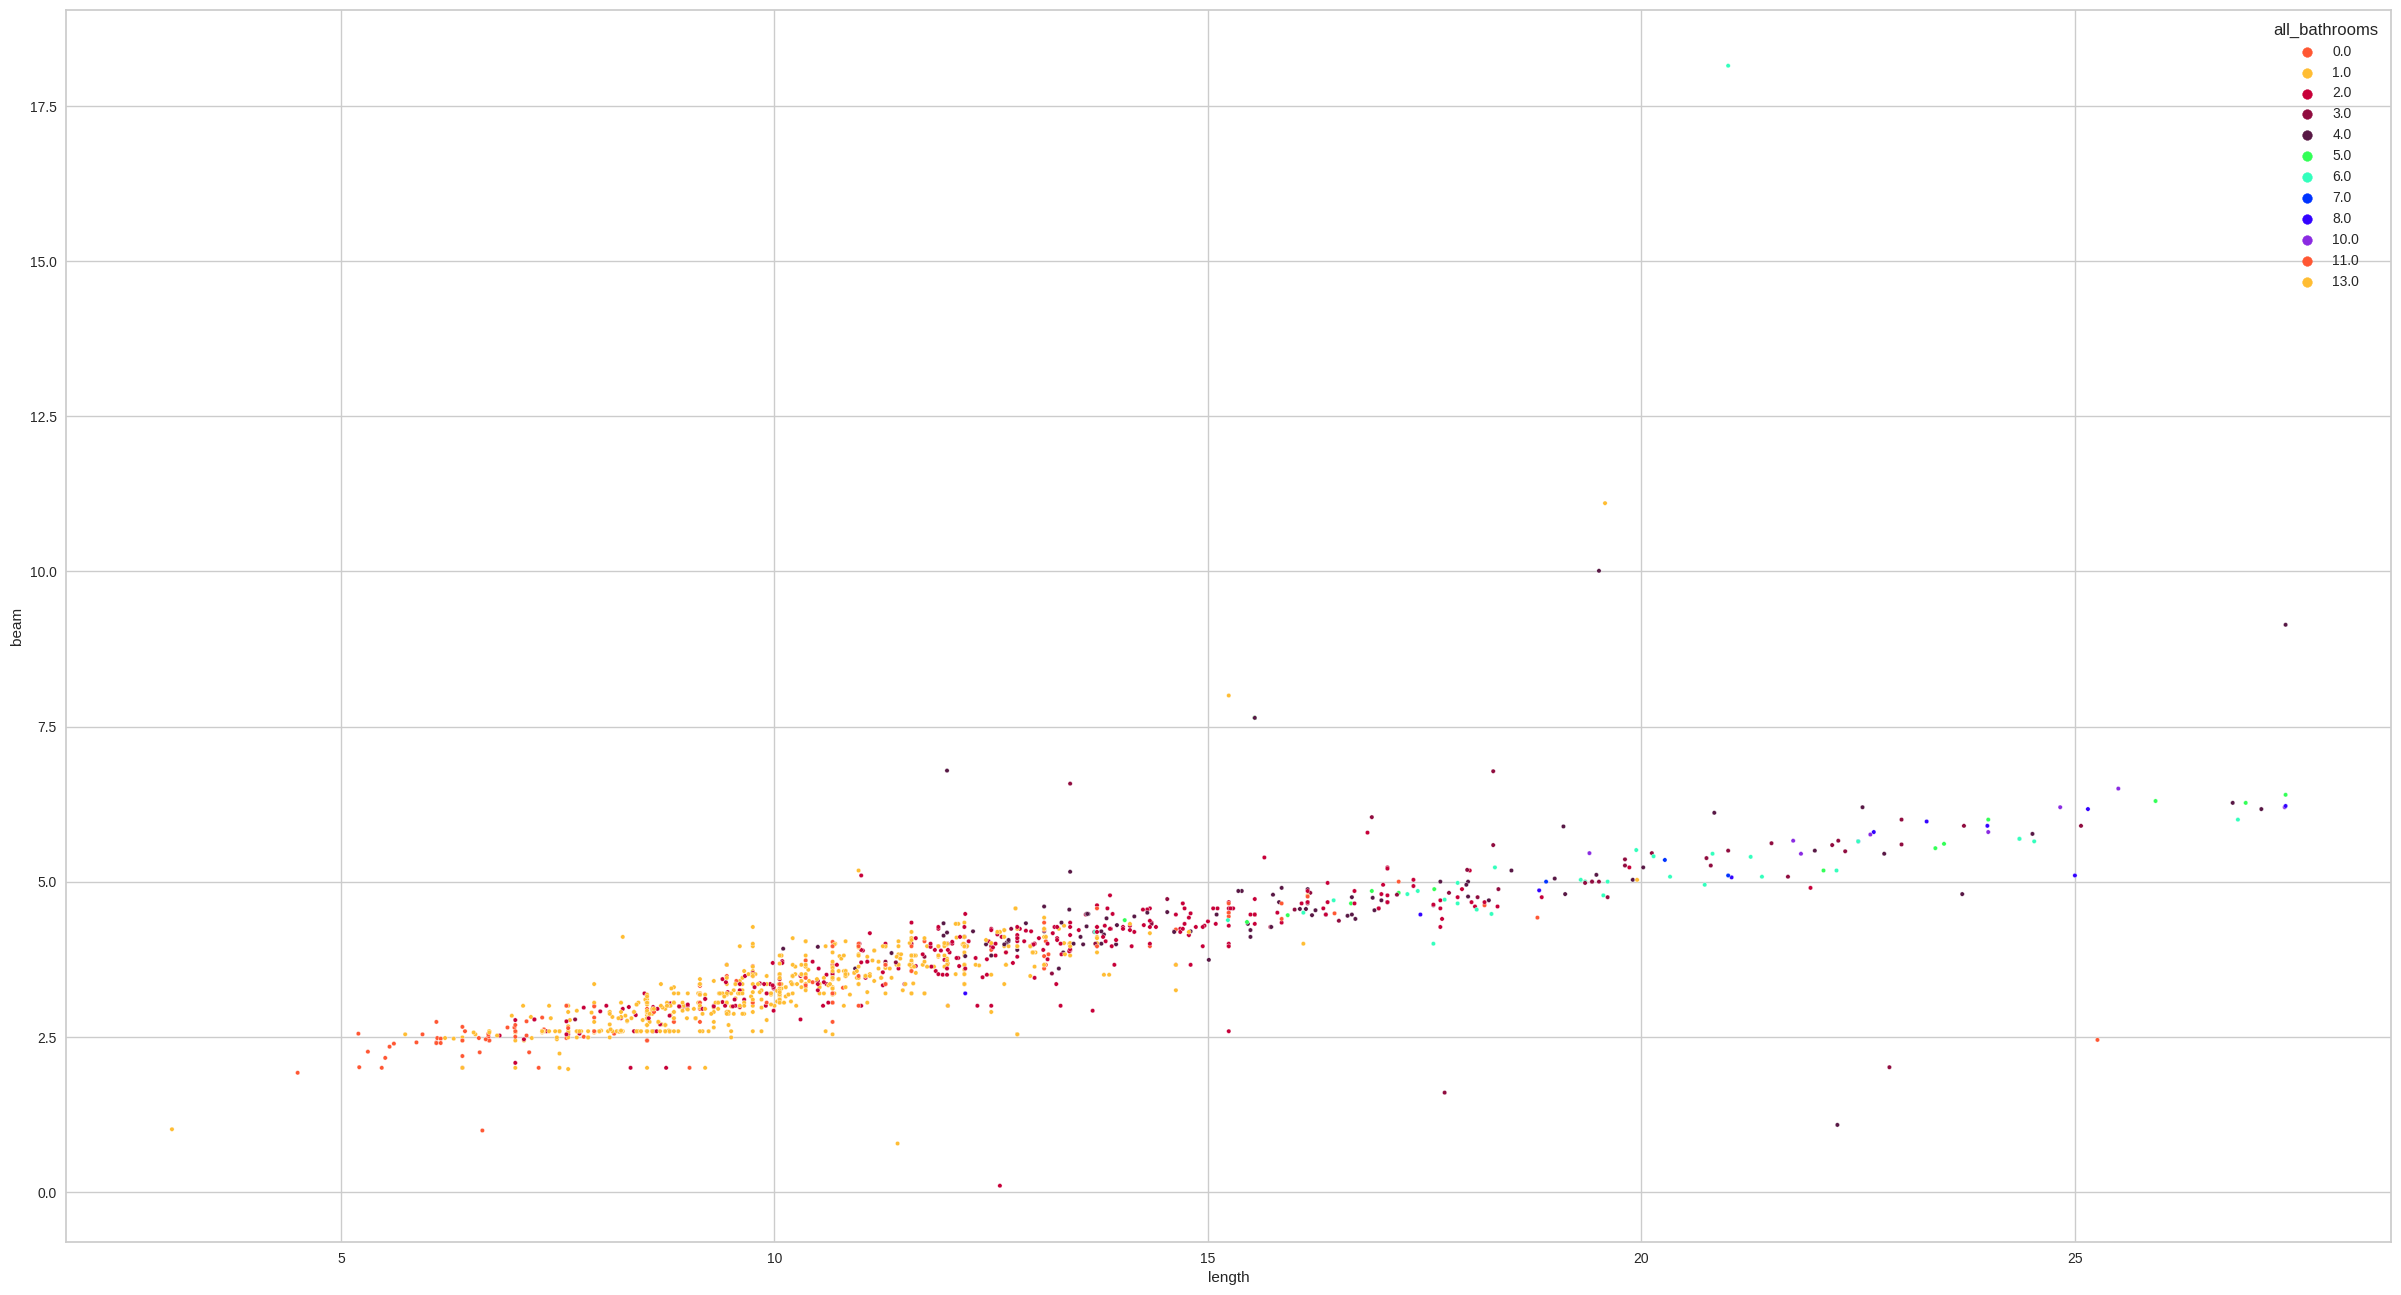

In [ ]:
plot_custom_scatter('length', 'beam', x_test_draft, 'all_bathrooms')

**CONCLUSIONS:**

A noticeable trend is that the larger the yacht the more bathrooms it has.

Add up how many yachts have a certain number of bathrooms.

In [ ]:
x_test_draft['all_bathrooms'].value_counts()

1.0     730
2.0     314
0.0     145
4.0      94
3.0      46
6.0      31
5.0      17
8.0      11
10.0      8
7.0       3
11.0      1
13.0      1
Name: all_bathrooms, dtype: int64

Copy ***x_test_draft*** to avoid modifying the data

In [ ]:
x_test_all_bathrooms = x_test_draft.copy()

Determine the set where ***'all_bathrooms'*** == 0. For this set, the value of ***'all_bathrooms'*** is predicted based on KNN.

In [ ]:
zero_bathrooms_data = x_test_all_bathrooms[x_test_all_bathrooms['all_bathrooms'] == 0]
zero_bathrooms_data

year_of_production  length  beam  horse_power_sum  number_of_photos  \
1893              2022.0   11.28  3.35            640.0              29.0   
4680              2018.0    9.02  2.00            500.0              21.0   
1176              2022.0    5.61  2.39              4.0               9.0   
1992              1995.0    9.45  3.05            580.0              67.0   
1634              2000.0   15.24  4.44            865.0              15.0   
...                  ...     ...   ...              ...               ...   
1701              1998.0   13.72  4.57            840.0              13.0   
1888              2014.0   10.06  3.35            620.0              23.0   
2226              2005.0   10.67  2.74            600.0              43.0   
4010              1980.0   10.97  3.96            700.0              38.0   
2184              2015.0    8.53  2.44            320.0              30.0   

      all_cabins  all_bathrooms  Draft  
1893         2.0            0.0  1.798  
4680         2.0            0.0  1.302  
1176         2.0            0.0  0.760  
1992         2.0            0.0  1.555  
1634         2.0            0.0  1.000  
...          ...            ...    ...  
1701         2.0            0.0  1.140  
1888         2.0            0.0  1.676  
2226         2.0            0.0  1.615  
4010         6.0            0.0  0.970  
2184         2.0            0.0  1.341  

[145 rows x 8 columns]

Get index where ***'all_bathrooms'*** == 0

In [ ]:
x_test_idx_drop_bath = zero_bathrooms_data.index
x_test_idx_drop_bath

Int64Index([1893, 4680, 1176, 1992, 1634, 1665, 1721, 1702, 2251, 6890,
            ...
            2225, 4102, 3123, 5465, 3570, 1701, 1888, 2226, 4010, 2184],
           dtype='int64', length=145)

Prediction of number of bathrooms based on KNN

In [ ]:
gs_knn_bath_test, X_train_knn_bath_test, y_train_knn_bath_test, y_train_pred_knn_bath_test, X_test_knn_bath_test, y_test_knn_bath_test, y_test_pred_knn_bath_test = knn_classificator_bathrooms(x_test_all_bathrooms, x_test_idx_drop_bath, test_size=0.2, random_state=42)

Najlepsze parametry: {'knn__metric': 'minkowski', 'knn__n_neighbors': 45, 'knn__p': 1, 'knn__weights': 'distance'}
Test Accuracy: 0.7023809523809523
Train Accuracy: 0.999003984063745
0.7023809523809523


Display confusion matrix on train set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


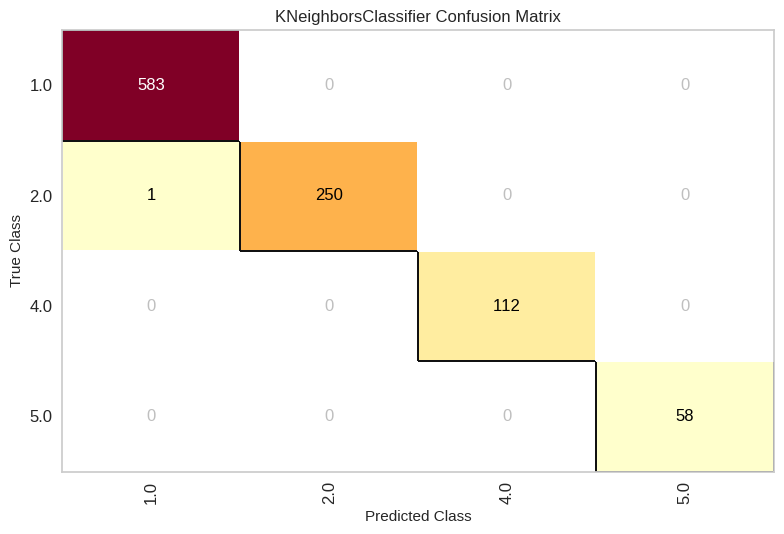

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_bath_test, X_train_knn_bath_test, y_train_knn_bath_test)

In [ ]:
knn_class_report_bath_test = classification_report(y_train_knn_bath_test, y_train_pred_knn_bath_test)
print(knn_class_report_bath_test)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       583
         2.0       1.00      1.00      1.00       251
         4.0       1.00      1.00      1.00       112
         5.0       1.00      1.00      1.00        58

    accuracy                           1.00      1004
   macro avg       1.00      1.00      1.00      1004
weighted avg       1.00      1.00      1.00      1004



**CONCLUSIONS:**

The model shows excellent performance in classifying the different classes. Precision, sensitivity and F1 for each class are 100%, meaning that the model correctly identifies each class in this dataset.

Display confusion matrix on test set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


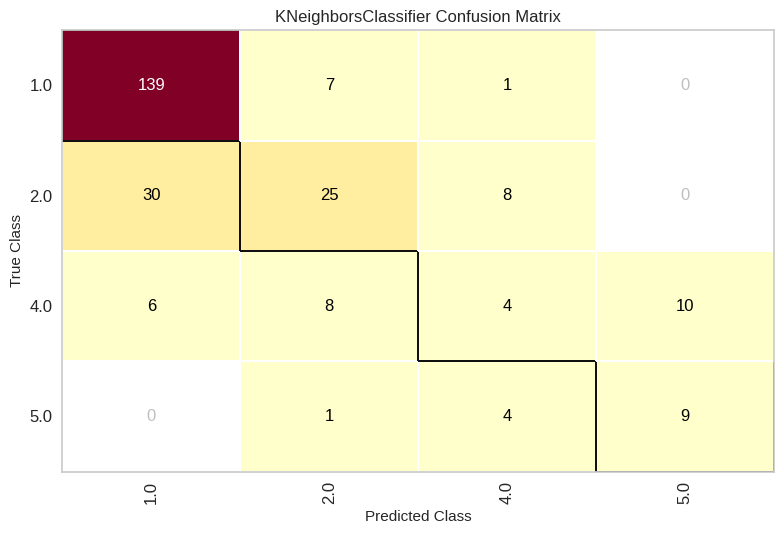

<Figure size 800x550 with 0 Axes>

In [ ]:
plot_confusion_matrix(gs_knn_bath_test, X_test_knn_bath_test, y_test_knn_bath_test)

In [ ]:
knn_class_report_bath_test = classification_report(y_test_knn_bath_test, y_test_pred_knn_bath_test)
print(knn_class_report_bath_test)

              precision    recall  f1-score   support

         1.0       0.79      0.95      0.86       147
         2.0       0.61      0.40      0.48        63
         4.0       0.24      0.14      0.18        28
         5.0       0.47      0.64      0.55        14

    accuracy                           0.70       252
   macro avg       0.53      0.53      0.52       252
weighted avg       0.67      0.70      0.67       252



**CONCLUSIONS:**

 The overall accuracy (precision) of the model is 70%, meaning that the model is able to correctly classify approximately 70% of the observations in the dataset.

Performance for each class:

Class 1.0 appears to classify relatively well, with relatively high values for precision (0.79), recall (0.95) and F1 score (0.86). This means that the model has a relatively low number of false positives and a relatively high number of true positive predictions for this class.

Class 2.0 has lower precision (0.61) and recall (0.40) values, indicating that the model has some difficulty in identifying this class.

Class 4.0 has even lower precision (0.24) and recall (0.14) values, suggesting challenges in successfully classifying this class.

Class 5.0 has relatively better precision (0.47) and recall (0.64) values, but these are still not very high.


In summary, the model shows moderate performance in classifying different classes. The classification of class 1.0 is relatively effective, while classes 2.0, 4.0 and 5.0 present more difficulties. There is room for optimisation of the model and further research to improve classification performance, especially for more difficult to identify classes.

Prediction of data in ***'all_bathrooms'*** column using KNN model

In [ ]:
x_test_fillled_bathrooms = gs_knn_bath_test.predict(zero_bathrooms_data[['length', 'beam', 'all_cabins', 'horse_power_sum', 'year_of_production']])

Inserting predicted values into the data frame

In [ ]:
zero_bathrooms_data['all_bathrooms'] = x_test_fillled_bathrooms
zero_bathrooms_data

<ipython-input-181-0d24806e0840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_bathrooms_data['all_bathrooms'] = x_test_fillled_bathrooms


year_of_production  length  beam  horse_power_sum  number_of_photos  \
1893              2022.0   11.28  3.35            640.0              29.0   
4680              2018.0    9.02  2.00            500.0              21.0   
1176              2022.0    5.61  2.39              4.0               9.0   
1992              1995.0    9.45  3.05            580.0              67.0   
1634              2000.0   15.24  4.44            865.0              15.0   
...                  ...     ...   ...              ...               ...   
1701              1998.0   13.72  4.57            840.0              13.0   
1888              2014.0   10.06  3.35            620.0              23.0   
2226              2005.0   10.67  2.74            600.0              43.0   
4010              1980.0   10.97  3.96            700.0              38.0   
2184              2015.0    8.53  2.44            320.0              30.0   

      all_cabins  all_bathrooms  Draft  
1893         2.0            1.0  1.798  
4680         2.0            1.0  1.302  
1176         2.0            1.0  0.760  
1992         2.0            1.0  1.555  
1634         2.0            2.0  1.000  
...          ...            ...    ...  
1701         2.0            2.0  1.140  
1888         2.0            1.0  1.676  
2226         2.0            1.0  1.615  
4010         6.0            1.0  0.970  
2184         2.0            1.0  1.341  

[145 rows x 8 columns]

Fill in the data in the column ***'all_bathrooms'*** with the required data.

In [ ]:
x_test_draft.loc[x_test_draft['all_bathrooms'] == 0, 'all_bathrooms'] = zero_bathrooms_data['all_bathrooms']
x_test_draft

year_of_production  length  beam  horse_power_sum  number_of_photos  \
625               2008.0   12.00  3.00            900.0              13.0   
7031              2002.0   10.31  3.40            520.0              17.0   
101               2009.0   20.75  5.38           2400.0               9.0   
3956              2000.0   10.13  3.30            560.0              40.0   
2018              1996.0   13.72  4.62            840.0              41.0   
...                  ...     ...   ...              ...               ...   
751               2018.0   13.80  3.50            870.0              14.0   
2184              2015.0    8.53  2.44            320.0              30.0   
1872              2008.0    8.53  2.00            300.0              10.0   
4019              1973.0    6.40  2.00             10.0              16.0   
7010              2005.0   12.19  3.96            660.0              60.0   

      all_cabins  all_bathrooms  Draft  
625          1.0            2.0  1.000  
7031         6.0            1.0  1.090  
101          3.0            3.0  3.151  
3956         4.0            1.0  0.940  
2018         2.0            2.0  2.296  
...          ...            ...    ...  
751          2.0            1.0  2.080  
2184         2.0            1.0  1.341  
1872         1.0            1.0  1.000  
4019         1.0            1.0  0.800  
7010         2.0            1.0  1.070  

[1401 rows x 8 columns]

In [ ]:
x_test_draft.isna().sum()

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      0
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

In [ ]:
zero_counts = (x_test_draft == 0).sum()
zero_counts

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      1
all_cabins            0
all_bathrooms         0
Draft                 0
dtype: int64

**CONCLUSIONS:**

All data in the ***'all_bathrooms'*** column has been completed.

####y_test

Search for indexes left over from ***X_test***


In [ ]:
x_test_selected_index_x = select_index_x(x_test_draft)

Selecting the same indexes for ***y_test*** as for ***X_test***

In [ ]:
y_test_selected = select_index_y(y_test, x_test_selected_index_x)
y_test_selected

price
625   199000.00
7031   53934.00
101   855000.00
3956   36904.97
2018  134625.10
...         ...
751   340000.00
2184   91543.03
1872   45412.57
4019    8114.15
7010  109711.90

[1401 rows x 1 columns]

####df_test

Combination of ***X_train*** and ***y_train*** in a single data frame

In [ ]:
df_test_selected = create_df_fill(x_test_draft, y_test_selected)
df_test_selected

year_of_production  length  beam  horse_power_sum  number_of_photos  \
625               2008.0   12.00  3.00            900.0              13.0   
7031              2002.0   10.31  3.40            520.0              17.0   
101               2009.0   20.75  5.38           2400.0               9.0   
3956              2000.0   10.13  3.30            560.0              40.0   
2018              1996.0   13.72  4.62            840.0              41.0   
...                  ...     ...   ...              ...               ...   
751               2018.0   13.80  3.50            870.0              14.0   
2184              2015.0    8.53  2.44            320.0              30.0   
1872              2008.0    8.53  2.00            300.0              10.0   
4019              1973.0    6.40  2.00             10.0              16.0   
7010              2005.0   12.19  3.96            660.0              60.0   

      all_cabins  all_bathrooms  Draft      price  
625          1.0            2.0  1.000  199000.00  
7031         6.0            1.0  1.090   53934.00  
101          3.0            3.0  3.151  855000.00  
3956         4.0            1.0  0.940   36904.97  
2018         2.0            2.0  2.296  134625.10  
...          ...            ...    ...        ...  
751          2.0            1.0  2.080  340000.00  
2184         2.0            1.0  1.341   91543.03  
1872         1.0            1.0  1.000   45412.57  
4019         1.0            1.0  0.800    8114.15  
7010         2.0            1.0  1.070  109711.90  

[1401 rows x 9 columns]

In [ ]:
df_test_selected.columns.tolist()

['year_of_production',
 'length',
 'beam',
 'horse_power_sum',
 'number_of_photos',
 'all_cabins',
 'all_bathrooms',
 'Draft',
 'price']

Display rows containing the value '0'

In [ ]:
rows_with_zeros = df_test_selected[df_test_selected.isin([0]).any(axis=1)]
rows_with_zeros

year_of_production  length  beam  horse_power_sum  number_of_photos  \
2197              2017.0    9.75  3.05            570.0               0.0   

      all_cabins  all_bathrooms  Draft      price  
2197         2.0            1.0  1.585  205921.46

In [ ]:
zero_counts = (df_test_selected == 0).sum()
zero_counts

year_of_production    0
length                0
beam                  0
horse_power_sum       0
number_of_photos      1
all_cabins            0
all_bathrooms         0
Draft                 0
price                 0
dtype: int64

####Charts

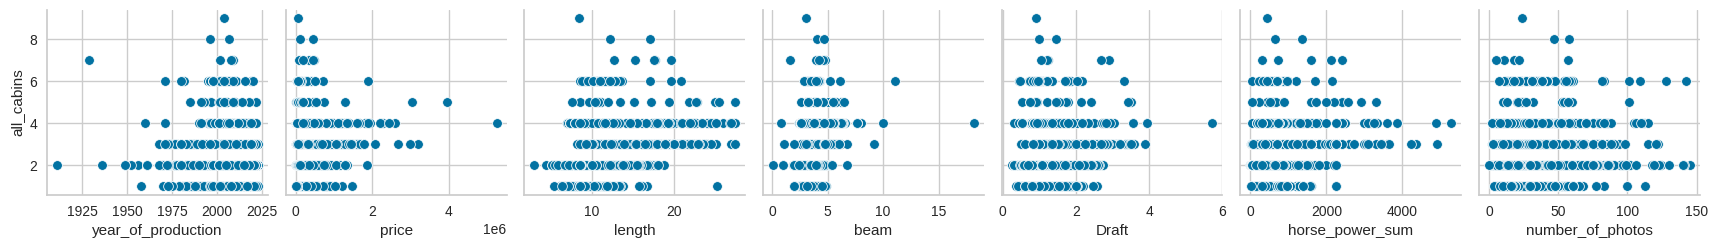

In [ ]:
plot_pairplot(df_test_selected, 'all_cabins', ['year_of_production', 'price', 'length', 'beam', 'Draft',
                              'horse_power_sum', 'number_of_photos'])

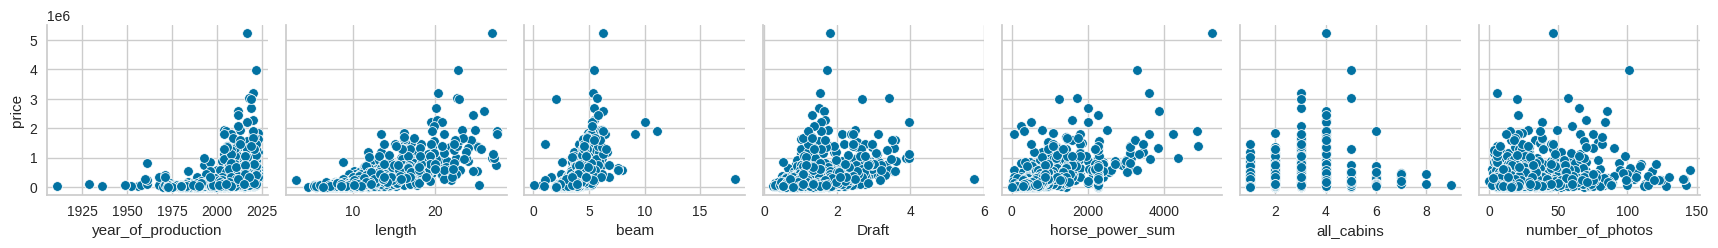

In [ ]:
plot_pairplot(df_test_selected, 'price', ['year_of_production', 'length', 'beam', 'Draft',
                              'horse_power_sum', 'all_cabins', 'number_of_photos'])

Create and display a scatter plot of ***'length'*** against ***'beam'***, coloured by ***'all_cabins'***

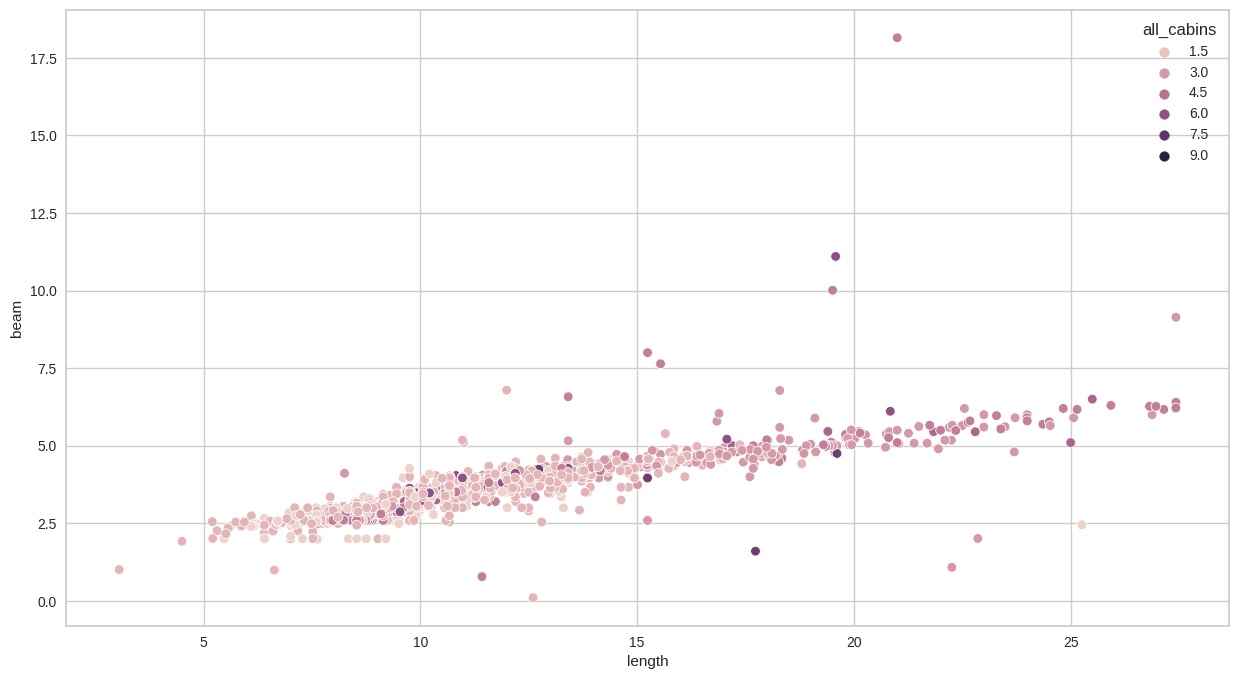

In [ ]:
plot_scatter_x_vs_y(df_test_selected, 'length', 'beam', 'all_cabins')

Create and display a scatter plot of ***'length'*** against ***'beam'***, coloured by ***'price'***

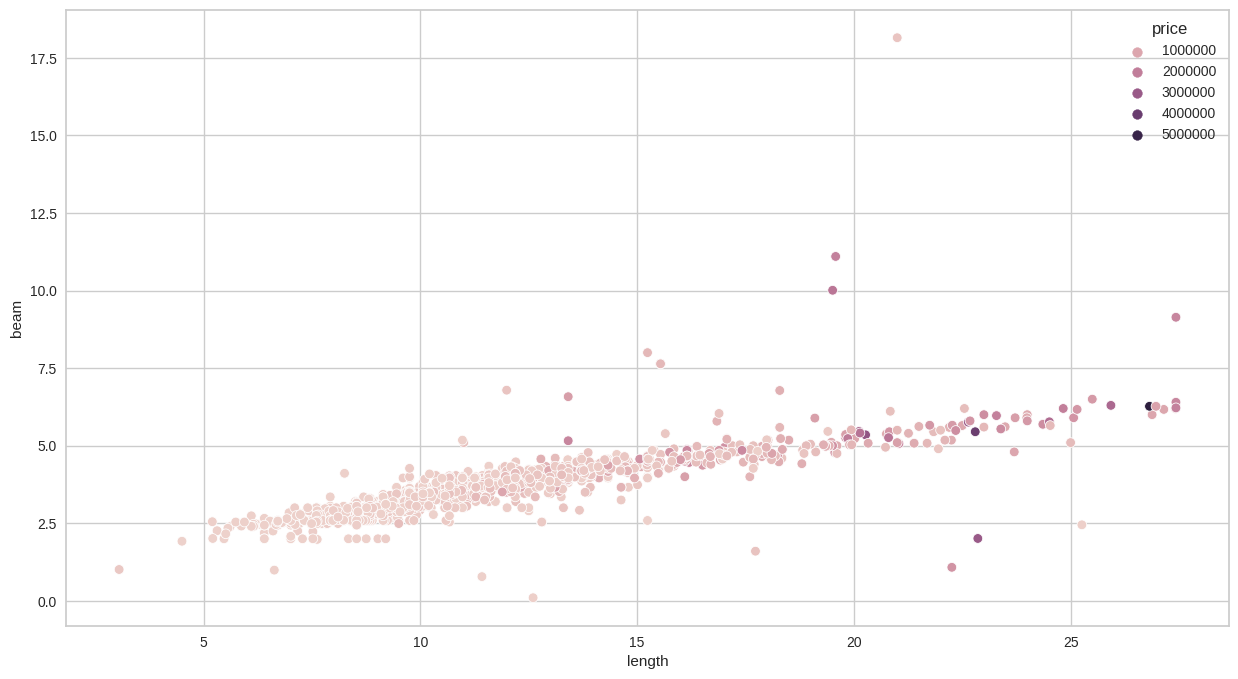

In [ ]:
plot_scatter_x_vs_y(df_test_selected, 'length', 'beam', 'price')

Create and display a scatter plot of ***'length'*** against ***'year_of_production'***, coloured by ***'price'***

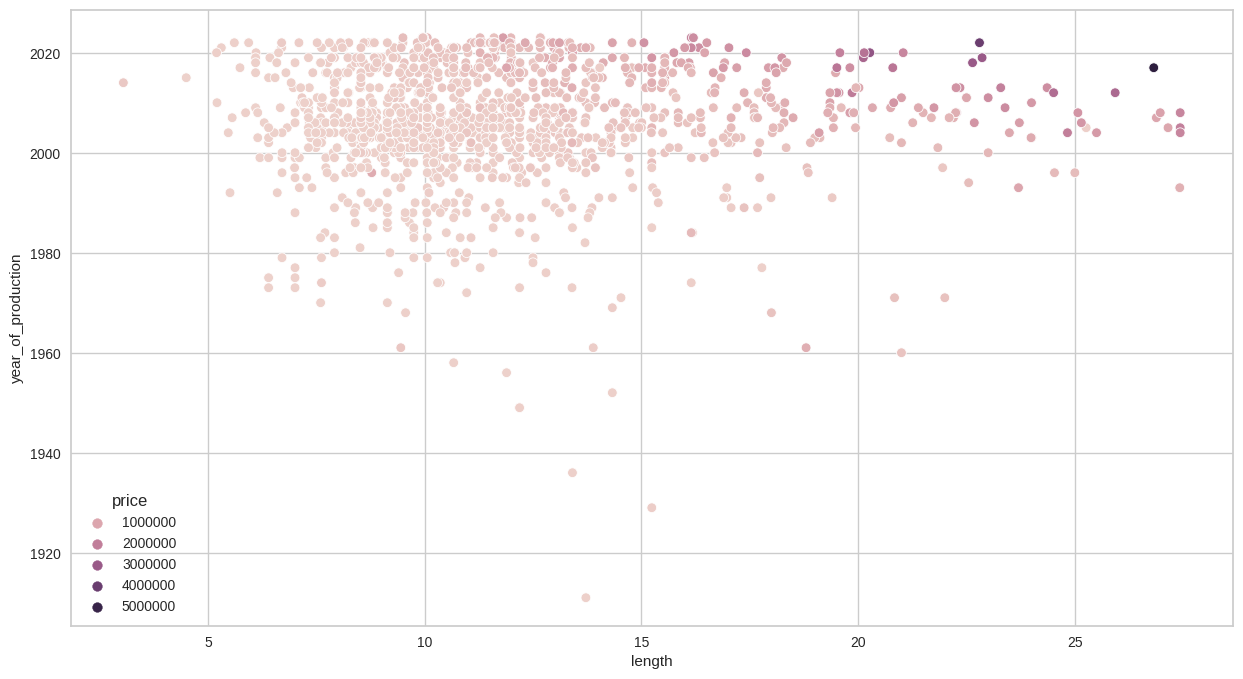

In [ ]:
plot_scatter_x_vs_y(df_test_selected, 'length', 'year_of_production', 'price')

**CONCLUSIONS:**

Analysing the maps, the following conclusions can be drawn
The larger the yacht, the more cabins.
The price of yachts increases significantly with the size of the yacht.
Large yachts depreciate more slowly.


#Model Training and Evaluation

**Model training**


The model was trained on the training data using appropriate algorithms. The process of training the model involved fitting the model to the training data, adjusting the parameters and finding the optimal model that best represents the patterns in the data.


**Model evaluation:**


The quality of the model was assessed using various metrics:
- **Mean Absolute Error (MAE):** Calculates the mean absolute error between the predictions and the actual data.
- **Mean Absolute Percentage Error (MAPE):** Calculates the average percentage error between predictions and actual data.
- **train_score:** (e.g. accuracy, cost function)  is calculated on training data, i.e. the same data that the model uses for learning (training). This is a measure of how well the model fits the training data.
- **test_score:** Calculated on test data, which the model has not seen during training, but which is specifically reserved for assessing its quality. This is a measure of how well the model generalises its predictions to new, previously unseen data.


**Parameters**.

**best_params** is a dictionary containing the best model parameters found during the hyperparameter tuning process using a method such as Grid Search. It is a key element in the model optimisation process to help find the best configuration of hyperparameters for a given machine learning algorithm.


These metrics were used to accurately assess the quality of the models and compare their performance on test data.

Rename collections so that they are consistent

In [ ]:
X_train_fill = x_train_draft
y_train_fill = y_train_selected

X_test_fill = x_test_draft
y_test_fill = y_test_selected

##Linear Regression

***Linear regression*** is a foundational technique in statistics and machine learning used for predicting numerical values based on a linear relationship between variables.

In this method, a linear relationship is assumed between the independent variable (or predictor) and the dependent variable (the variable we want to predict). One independent variable (X) and one dependent variable (y) are considered. The linear regression model is expressed in terms of an equation:

***y=β0+β1x+ε***

where:
- **y** represents the dependent variable (the one to be predicted),
- **x** represents the independent variable (the feature or predictor),
- **β0** denotes the intercept, indicating the *y* value when *x=0*,
- **β1** is the slope coefficient, determining how *y* changes with a unit change in *x*,
- **ε** stands for the error term.

The objective is to determine the optimal parameters *β0* and *β1* that allow the model to best fit the data. Given sets of *x* and *y* data, linear regression models seek the line (or hyperplane for multiple variables) that best represents this linear relationship.

In [ ]:
class LinearRegressionModel:
  def __init__(self):
    self.lr_pipeline = Pipeline([
                                ("sc", StandardScaler()),
                                ('lr', LinearRegression())
                            ])
    self.gs_lr = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_lr = {}
    self.gs_lr = GridSearchCV(self.lr_pipeline, param_grid=params_lr, cv=10)
    self.gs_lr.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_lr.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score = self.gs_lr.score(X_train_fill, y_train_fill)
    test_score = self.gs_lr.score(X_test_fill, y_test_fill)
    return train_score, test_score

  def evaluate(self, X_test_fill, y_test_fill):
    y_lr_predict = self.gs_lr.predict(X_test_fill)
    mae = mean_absolute_error(y_test_fill, y_lr_predict)
    mape = mean_absolute_percentage_error(y_test_fill, y_lr_predict)
    return y_lr_predict, mae, mape

In [ ]:
lr_model = LinearRegressionModel()
lr_model.fit(X_train_fill, y_train_fill)
best_params_lr = lr_model.get_best_params()
train_score_lr, test_score_lr = lr_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_lr_predict, mae_lr, mape_lr = lr_model.evaluate(X_test_fill, y_test_fill)

In [ ]:
print("Best Parameters Linear Regression:", best_params_lr)
print("Train Score (Linear Regression):", train_score_lr)
print("Test Score (Linear Regression):", test_score_lr)
print("MAE (Linear Regression):", mae_lr)
print("MAPE (Linear Regression):", mape_lr)

Best Parameters Linear Regression: {}
Train Score (Linear Regression): 0.4886708247764726
Test Score (Linear Regression): 0.48353671471478
MAE (Linear Regression): 190843.4188749755
MAPE (Linear Regression): 2.569512740967673


**CONCLUSIONS:**

The linear regression results are not satisfactory. The conclusion is that the algorithm cannot cope with the data and another model should be sought. ***MAE*** and ***MAPE*** are very large, ***train_score*** and ***test_score*** are unsatisfactory.

##Polynomial Features

***Polynomial features*** refer to an approach in machine learning and data analysis where new features are created by raising existing features to various powers. This technique allows for a more complex representation of the relationship between variables, particularly useful when a linear relationship is not sufficient to accurately model the data.

For example, with a single input feature ***x***, generating polynomial features of degree 2 would involve creating new features ***x2*** , ***x3***, and so on. The resulting dataset would then include these new features alongside the original
***x*** values.

In a mathematical sense, for a single input feature *x*, generating polynomial features of degree 2 would look like this:

\



> ***x2, x3,..., xn***



\

These features can then be used in polynomial regression, a type of regression analysis where the relationship between the independent variable and the dependent variable is modeled as an ***n-th*** degree polynomial.

Polynomial features are valuable when the underlying relationship between the variables is better represented by a curve rather than a straight line. By introducing polynomial features, we can capture more complex patterns in the data, leading to a more accurate model. However, it's important to strike a balance and not use an overly complex degree of polynomial features to avoid overfitting the model to the training data.

In [ ]:
class PolynomialRegressionModel:
  def __init__(self):
    self.poly_pipeline = Pipeline([
                                  ('sc', StandardScaler()),
                                  ('poly', PolynomialFeatures()),
                                  ('lr', LinearRegression())
                              ])
    self.gs_poly = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_poly = {'poly__degree': [1, 2, 3]}
    self.gs_poly = GridSearchCV(self.poly_pipeline, param_grid=params_poly, cv=10)
    self.gs_poly.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_poly.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score_poly = self.gs_poly.score(X_train_fill, y_train_fill)
    test_score_poly = self.gs_poly.score(X_test_fill, y_test_fill)
    return train_score_poly, test_score_poly

  def evaluate(self, X_test_fill, y_test_fill):
    y_poly_predict = self.gs_poly.predict(X_test_fill)
    mae_poly = mean_absolute_error(y_test_fill, y_poly_predict)
    mape_poly = mean_absolute_percentage_error(y_test_fill, y_poly_predict)
    return y_poly_predict, mae_poly, mape_poly

In [ ]:
poly_model = PolynomialRegressionModel()
poly_model.fit(X_train_fill, y_train_fill)
best_params_poly = poly_model.get_best_params()
train_score_poly, test_score_poly = poly_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_poly_predict, mae_poly, mape_poly = poly_model.evaluate(X_test_fill, y_test_fill)

In [ ]:
print("Best Parameters Polynomial Regression:", best_params_poly)
print("Train Score (Polynomial Regression):", train_score_poly)
print("Test Score (Polynomial Regression):", test_score_poly)
print("MAE (Polynomial Regression):", mae_poly)
print("MAPE (Polynomial Regression):", mape_poly)

Best Parameters Polynomial Regression: {'poly__degree': 2}
Train Score (Polynomial Regression): 0.7821569393829149
Test Score (Polynomial Regression): 0.6393601643466823
MAE (Polynomial Regression): 131267.38989585676
MAPE (Polynomial Regression): 1.6906418134442094


**CONCLUSIONS:**

The results from Polynomial Features are unsatisfactory. The conclusion is that the algorithm cannot cope with the data and another model should be sought. ***MAE*** and ***MAPE*** are very large, ***train_score*** and ***test_score*** are slightly better than in Linear Regression, but still unsatisfactory.

##Ridge Regression

***Ridge Regression***, also known as Tikhonov regularization or L2 regularization, is a linear regression technique used to address the problem of multicollinearity in multiple regression data analysis.

In standard linear regression, the goal is to find the best-fit line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the observed values and the predicted values. However, when dealing with multicollinearity, where independent variables are highly correlated, the standard linear regression can produce unreliable and highly sensitive predictions.

Ridge Regression addresses this issue by adding a penalty term to the standard linear regression objective function. This penalty term is proportional to the square of the magnitude of the coefficients of the independent variables. By penalizing large coefficients, Ridge Regression discourages overly complex models and stabilizes the parameter estimates, making the model more robust.

The objective function in Ridge Regression is to minimize the sum of squared differences between the observed and predicted values, but with an additional regularization term, often denoted as alpha times the sum of squares of the coefficients:

\

> ***Objective = Sum of squared differences + alpha * (sum of squares of coefficients)***

\

The parameter ***alpha*** controls the strength of the regularization. A higher ***alpha*** leads to stronger regularization and smaller coefficients.

Ridge Regression is especially useful when dealing with datasets with high multicollinearity, where it helps prevent overfitting and provides a more reliable model for prediction.

In [ ]:
class RidgeRegressionModel:
  def __init__(self):
    self.ridge_pipeline = Pipeline([
                                    ('sc', StandardScaler()),
                                    ('ridge', Ridge())
                                  ])
    self.gs_ridge = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_ridge = {'ridge__alpha': [0.1, 1.0, 10.0, 100, 1000]}
    self.gs_ridge = GridSearchCV(self.ridge_pipeline, param_grid=params_ridge, cv=10)
    self.gs_ridge.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_ridge.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score_ridge = self.gs_ridge.score(X_train_fill, y_train_fill)
    test_score_ridge = self.gs_ridge.score(X_test_fill, y_test_fill)
    return train_score_ridge, test_score_ridge

  def evaluate(self, X_test_fill, y_test_fill):
    y_ridge_predict = self.gs_ridge.predict(X_test_fill)
    mae_ridge = mean_absolute_error(y_test_fill, y_ridge_predict)
    mape_ridge = mean_absolute_percentage_error(y_test_fill, y_ridge_predict)
    return y_ridge_predict, mae_ridge, mape_ridge

In [ ]:
ridge_model = RidgeRegressionModel()
ridge_model.fit(X_train_fill, y_train_fill)
best_params_ridge = ridge_model.get_best_params()
train_score_ridge, test_score_ridge = ridge_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_ridge_predict, mae_ridge, mape_ridge = ridge_model.evaluate(X_test_fill, y_test_fill)

In [ ]:
print("Best Parameters Ridge Regression:", best_params_ridge)
print("Train Score (Ridge Regression):", train_score_ridge)
print("Test Score (Ridge Regression):", test_score_ridge)
print("MAE (Ridge Regression):", mae_ridge)
print("MAPE (Ridge Regression):", mape_ridge)

Best Parameters Ridge Regression: {'ridge__alpha': 1000}
Train Score (Ridge Regression): 0.48519384111825703
Test Score (Ridge Regression): 0.5199083792250678
MAE (Ridge Regression): 179053.035428358
MAPE (Ridge Regression): 2.220704558668444


**CONCLUSIONS:**

The Ridge Regression results are not satisfactory. The conclusion is that the algorithm cannot cope with the data and another model should be sought. ***MAE*** and ***MAPE*** are very large, ***train_score*** and ***test_score*** are worse than for Polynomial Features and still unsatisfactory.

## Lasso Regression

***Lasso Regression***, short for Least Absolute Shrinkage and Selection Operator Regression, is a regression method used in data analysis. In addition to fitting a model to the data, it aims to reduce the number of features by assigning zero weights to irrelevant variables. It is a form of regularization (penalization) that encourages simpler models with fewer variables.

The main objective of Lasso regression is to minimize the sum of squared differences between predicted values and actual data, taking into account a penalty for the coefficients of the features, expressed as the absolute value (L1 penalty).

Lasso Regression can be particularly useful in problems where we suspect that only a subset of features is important for the model, and the rest might be redundant. By penalizing the weights of features, the model tends to select only the most significant features, potentially leading to better interpretability and efficiency of the model.

For implementing Lasso Regression setting an appropriate regularization parameter (***alpha***) is crucial for achieving the best results.

In [ ]:
class LassoRegressionModel:
  def __init__(self):
    self.lasso_pipeline = Pipeline([
                                    ('sc', StandardScaler()),
                                    ('lasso', Lasso())
                                ])
    self.gs_lasso = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_lasso = {'lasso__alpha': [0.1, 1.0, 10.0]}
    self.gs_lasso = GridSearchCV(self.lasso_pipeline, param_grid=params_lasso, cv=10)
    self.gs_lasso.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_lasso.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score_lasso = self.gs_lasso.score(X_train_fill, y_train_fill)
    test_score_lasso = self.gs_lasso.score(X_test_fill, y_test_fill)
    return train_score_lasso, test_score_lasso

  def evaluate(self, X_test_fill, y_test_fill):
    y_lasso_predict = self.gs_lasso.predict(X_test_fill)
    mae_lasso = mean_absolute_error(y_test_fill, y_lasso_predict)
    mape_lasso = mean_absolute_percentage_error(y_test_fill, y_lasso_predict)
    return y_lasso_predict, mae_lasso, mape_lasso

In [ ]:
lasso_model = LassoRegressionModel()
lasso_model.fit(X_train_fill, y_train_fill)
best_params_lasso = lasso_model.get_best_params()
train_score_lasso, test_score_lasso = lasso_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_lasso_predict, mae_lasso, mape_lasso = lasso_model.evaluate(X_test_fill, y_test_fill)

In [ ]:
print("Best Parameters (Lasso):", best_params_lasso)
print("Train Score (Lasso):", train_score_lasso)
print("Test Score (Lasso):", test_score_lasso)
print("MAE (Lasso):", mae_lasso)
print("MAPE (Lasso):", mape_lasso)

Best Parameters (Lasso): {'lasso__alpha': 10.0}
Train Score (Lasso): 0.4886708230533985
Test Score (Lasso): 0.4835500160672026
MAE (Lasso): 190838.33414615446
MAPE (Lasso): 2.569367613418771


**CONCLUSIONS:**

The Lasso Regression results are not satisfactory. The conclusion is that the algorithm cannot cope with the data and another model should be sought. ***MAE*** and ***MAPE*** are very large, ***train_score*** and ***test_score*** are very close to Linear Regression and still unsatisfactory.

##Decission Tree Regressor

***Decision Tree Regressor*** is a machine learning model used for regression tasks. It's a type of decision tree algorithm that predicts a continuous output variable (numeric value) based on input features. In contrast to Decision Tree Classifier, which predicts discrete categories, the Decision Tree Regressor predicts a quantity.

The decision tree regressor works by splitting the dataset into subsets based on the values of input features. It makes these splits in a way that minimizes the variance of the target variable within each subset. This variance reduction is usually done using algorithms like Mean Squared Error (MSE) to determine the best split points.

Once the tree is constructed, during prediction, a new instance traverses the tree from the root to a leaf node based on its feature values, and the output is the average (or another aggregation) of the target values of the training samples in that leaf node.

Decision Tree Regressor is popular for its simplicity, interpretability, and capability to capture non-linear relationships in the data. However, it can suffer from overfitting if the tree becomes too complex or if not pruned properly.

In [ ]:
class DecisionTreeRegressorModel:
  def __init__(self):
    self.tree_pipeline = Pipeline([
                                  ('sc', StandardScaler()),
                                  ('tree', DecisionTreeRegressor())
                              ])
    self.gs_tree = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_tree = {'tree__max_depth': [5, 6, 7, 8, 9],
                   'tree__min_samples_split': [2, 3, 4],
                   'tree__min_samples_leaf': [4, 5, 6, 7]}

    self.gs_tree = GridSearchCV(self.tree_pipeline, param_grid=params_tree, cv=10)
    self.gs_tree.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_tree.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score_tree = self.gs_tree.score(X_train_fill, y_train_fill)
    test_score_tree = self.gs_tree.score(X_test_fill, y_test_fill)
    return train_score_tree, test_score_tree

  def evaluate(self, X_test_fill, y_test_fill):
    y_tree_predict = self.gs_tree.predict(X_test_fill)
    mae_tree = mean_absolute_error(y_test_fill, y_tree_predict)
    mape_tree = mean_absolute_percentage_error(y_test_fill, y_tree_predict)
    return y_tree_predict, mae_tree, mape_tree

In [ ]:
tree_model = DecisionTreeRegressorModel()
tree_model.fit(X_train_fill, y_train_fill)
best_params_tree = tree_model.get_best_params()
train_score_tree, test_score_tree = tree_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_tree_predict, mae_tree, mape_tree = tree_model.evaluate(X_test_fill, y_test_fill)

In [ ]:
print("Best Parameters:", best_params_tree)
print("Train Score (Tree):", train_score_tree)
print("Test Score (Tree):", test_score_tree)
print("MAE (Tree):", mae_tree)
print("MAPE (Tree):", mape_tree)

Best Parameters: {'tree__max_depth': 8, 'tree__min_samples_leaf': 7, 'tree__min_samples_split': 3}
Train Score (Tree): 0.8845422220426565
Test Score (Tree): 0.8433241325963122
MAE (Tree): 74158.29652671
MAPE (Tree): 0.4081563466845187


**CONCLUSIONS:**

The results of the Decision Tree Regressor are satisfactory. The conclusion is that the algorithm can handle the data and is the best model so far. ***MAE*** and ***MAPE*** are much lower, ***train_score*** and ***test_score*** are around 90%, so this is already a more satisfactory result, but better values are sought.

##ARD Regression

***ARD Regression*** (Automatic Relevance Determination Regression) is a machine learning regression technique. It is an extension of linear regression that allows for the adaptive determination of the importance (relevance) of individual input features in the model.

In ARD regression models, *probability distributions* are used to determine the weight (relevance) of each feature in the model. Important features are given higher weights, while less important features are given lower weights. This process is called automatic relevance determination because the model autonomously adjusts the weight of individual features, eliminating the need for manual weight setting.

ARD Regression can be particularly useful when dealing with a large number of input features and when we want to automate the feature selection process by determining which features are most significant for prediction. This allows us to reduce the model's complexity while avoiding overfitting.

In summary, ARD Regression is a regression method that automatically determines the importance of individual features in the model, aiding in effective feature selection and preventing overfitting.

In [ ]:
class ARDRegressionModel:
  def __init__(self):
    self.ard_pipeline = Pipeline([
                                  ('sc', StandardScaler()),
                                  ('poly', PolynomialFeatures()),
                                  ('ard', ARDRegression())
                              ])
    self.gs_ard = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_ard = {
        'poly__degree': [2],
        'ard__n_iter': [100, 200],
        'ard__tol': [1e-4, 1e-5],
        'ard__alpha_1': [1e-5],
        'ard__alpha_2': [1e-5],
        'ard__lambda_1': [1e-5],
        'ard__lambda_2': [1e-5],
        'ard__compute_score': [True, False],
        'ard__threshold_lambda': [1e2, 1e3, 1e4]}

    self.gs_ard = GridSearchCV(self.ard_pipeline, param_grid=params_ard, cv=10)
    self.gs_ard.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_ard.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score_ard = self.gs_ard.score(X_train_fill, y_train_fill)
    test_score_ard = self.gs_ard.score(X_test_fill, y_test_fill)
    return train_score_ard, test_score_ard

  def evaluate(self, X_test_fill, y_test_fill):
    y_ard_predict = self.gs_ard.predict(X_test_fill)
    mae_ard = mean_absolute_error(y_test_fill, y_ard_predict)
    mape_ard = mean_absolute_percentage_error(y_test_fill, y_ard_predict)
    return y_ard_predict, mae_ard, mape_ard

In [ ]:
ard_model = ARDRegressionModel()
ard_model.fit(X_train_fill, y_train_fill)
best_params_ard = ard_model.get_best_params()
train_score_ard, test_score_ard = ard_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_ard_predict, mae_ard, mape_ard = ard_model.evaluate(X_test_fill, y_test_fill)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
print("Best Parameters (ARD Regression):", best_params_ard)
print("Train Score (ARD Regression):", train_score_ard)
print("Test Score (ARD Regression):", test_score_ard)
print("MAE (ARD Regression):", mae_ard)
print("MAPE (ARD Regression):", mape_ard)

Best Parameters (ARD Regression): {'ard__alpha_1': 1e-05, 'ard__alpha_2': 1e-05, 'ard__compute_score': True, 'ard__lambda_1': 1e-05, 'ard__lambda_2': 1e-05, 'ard__n_iter': 100, 'ard__threshold_lambda': 100.0, 'ard__tol': 0.0001, 'poly__degree': 2}
Train Score (ARD Regression): 0.7768102889999926
Test Score (ARD Regression): 0.6442604437952109
MAE (ARD Regression): 129171.83813854284
MAPE (ARD Regression): 1.5997053823504899


**CONCLUSIONS:**

The results of ARD Regression are unsatisfactory. The conclusion is that the algorithm cannot cope with the data and another model should be sought. ***MAE*** and ***MAPE*** are very large, ***train_score*** and ***test_score*** are worse than in Decision Tree Regressor and unsatisfactory.

## Bayesian Ridge Regression

***Bayesian Ridge Regression*** is a probabilistic approach to linear regression that incorporates a Bayesian perspective for estimating the model parameters. Unlike traditional linear regression, which provides point estimates for the parameters (e.g., coefficients), Bayesian Ridge Regression estimates a posterior distribution over the parameters, giving a range of possible values rather than a single value.

In Bayesian Ridge Regression, a prior distribution is assigned to the model parameters, representing our beliefs about the parameters before observing the data. As data is observed, this prior distribution is combined with the likelihood of the data given the parameters to compute a posterior distribution using Bayes' theorem. The posterior distribution represents our updated beliefs about the parameters after observing the data.

The "ridge" in Bayesian Ridge Regression refers to the regularization term added to the likelihood function, which helps prevent overfitting by penalizing large parameter values. This regularization term is typically represented by the L2 norm (sum of squares of the parameters), hence the term "ridge."

The advantages of Bayesian Ridge Regression include the ability to handle multicollinearity (high correlation between input features) and uncertainty estimation for the model parameters, providing a more comprehensive understanding of the model's predictions.

In summary, Bayesian Ridge Regression is a Bayesian approach to linear regression that considers a probabilistic perspective, estimating a posterior distribution for model parameters and incorporating a regularization term to prevent overfitting.

In [ ]:
class BayesianRidgeModel:
  def __init__(self):
    self.bayesian_pipeline = Pipeline([
                                      ('sc', StandardScaler()),
                                      ('poly', PolynomialFeatures()),
                                      ('bayesian', BayesianRidge())
                                  ])
    self.gs_bayesian = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_bayesian = {
        'poly__degree': [2],
        'bayesian__n_iter': [100, 200],
        'bayesian__tol': [1e-4, 1e-5],
        'bayesian__alpha_1': [1e-5, 1e-6, 1e-7],
        'bayesian__alpha_2': [1e-5, 1e-6, 1e-7],
        'bayesian__lambda_1': [1e-5, 1e-6, 1e-7],
        'bayesian__lambda_2': [1e-5, 1e-6, 1e-7],
        'bayesian__fit_intercept': [True, False]
        }

    self.gs_bayesian = GridSearchCV(self.bayesian_pipeline, param_grid=params_bayesian, cv=10)
    self.gs_bayesian.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_bayesian.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score_bayesian = self.gs_bayesian.score(X_train_fill, y_train_fill)
    test_score_bayesian = self.gs_bayesian.score(X_test_fill, y_test_fill)
    return train_score_bayesian, test_score_bayesian

  def evaluate(self, X_test_fill, y_test_fill):
    y_bayesian_predict = self.gs_bayesian.predict(X_test_fill)
    mae_bayesian = mean_absolute_error(y_test_fill, y_bayesian_predict)
    mape_bayesian = mean_absolute_percentage_error(y_test_fill, y_bayesian_predict)
    return y_bayesian_predict, mae_bayesian, mape_bayesian

In [ ]:
bayesian_model = BayesianRidgeModel()
bayesian_model.fit(X_train_fill, y_train_fill)
best_params_bayesian = bayesian_model.get_best_params()
train_score_bayesian, test_score_bayesian = bayesian_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_bayesian_predict, mae_bayesian, mape_bayesian = bayesian_model.evaluate(X_test_fill, y_test_fill)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [ ]:
print("Best Parameters (Bayesian Ridge Regression):", best_params_bayesian)
print("Train Score (Bayesian Ridge Regression):", train_score_bayesian)
print("Test Score (Bayesian Ridge Regression):", test_score_bayesian)
print("MAE (Bayesian Ridge Regression):", mae_bayesian)
print("MAPE (Bayesian Ridge Regression):", mape_bayesian)

Best Parameters (Bayesian Ridge Regression): {'bayesian__alpha_1': 1e-07, 'bayesian__alpha_2': 1e-05, 'bayesian__fit_intercept': True, 'bayesian__lambda_1': 1e-05, 'bayesian__lambda_2': 1e-05, 'bayesian__n_iter': 100, 'bayesian__tol': 0.0001, 'poly__degree': 2}
Train Score (Bayesian Ridge Regression): 0.7821291920829747
Test Score (Bayesian Ridge Regression): 0.6428915219612302
MAE (Bayesian Ridge Regression): 130436.78969735834
MAPE (Bayesian Ridge Regression): 1.678216134554156


**CONCLUSIONS:**

The results of Bayesian Ridge Regression are not satisfactory. The conclusion is that the algorithm cannot cope with the data and another model should be sought. ***MAEv and ***MAPE*** are very large, ***train_score*** and ***test_score*** are similar to ARD Regression and still unsatisfactory.

## Bagging Regressor

***Bagging Regressor*** (Bootstrap Aggregating Regressor) is a machine learning technique that involves using an ensemble of regression models to improve prediction quality. It is a variation of the Bagging method (Bootstrap Aggregating) applied in the context of regression.

\

The Bagging Regressor works as follows:

- **Bootstrap sampling**: Samples are drawn with replacement from the original dataset (bootstrap sampling). Several different subsets of data are created, which are used to train various regression models.

- **Modeling**: A separate regression model is trained on each of these data subsets. These can be different regression models, such as decision trees, linear regression, etc.

- **Aggregation**: The prediction results obtained from individual models are aggregated to obtain the final prediction. In regression, the most common approach is to average the results obtained from different models.

\
Benefits of using Bagging Regressor include:

- **Variance reduction**: By averaging predictions from multiple models, variance is reduced, leading to more stable and accurate forecasts.
- **Overfitting prevention**: By using different data subsets to train different models, bagging can help prevent overfitting.

\
In summary, the Bagging Regressor is an ensemble technique that involves training multiple regression models on different data subsets and combining their predictions to obtain the final result. It is an effective tool for improving the performance of regression models.

In [ ]:
class BaggingRegressorModel:
  def __init__(self):
    self.bagging_pipeline = Pipeline([
                                      ('sc', StandardScaler()),
                                      ('bagging', BaggingRegressor(base_estimator=DecisionTreeRegressor()))
                                  ])
    self.gs_bagging = None

  def perform_grid_search(self, X_train_fill, y_train_fill):
    params_bagging = {
        'bagging__n_estimators': [10, 20, 30],
        'bagging__max_samples': [0.7, 0.8, 0.9, 1.0],
        'bagging__max_features': [0.7, 0.8, 0.9, 1.0]
    }

    self.gs_bagging = GridSearchCV(self.bagging_pipeline, param_grid=params_bagging, cv=10)
    self.gs_bagging.fit(X_train_fill, y_train_fill)

  def fit(self, X_train_fill, y_train_fill):
    self.perform_grid_search(X_train_fill, y_train_fill)

  def get_best_params(self):
    return self.gs_bagging.best_params_

  def get_scores(self, X_train_fill, y_train_fill, X_test_fill, y_test_fill):
    train_score_bagging = self.gs_bagging.score(X_train_fill, y_train_fill)
    test_score_bagging = self.gs_bagging.score(X_test_fill, y_test_fill)
    return train_score_bagging, test_score_bagging

  def evaluate(self, X_test_fill, y_test_fill):
    y_bagging_predict = self.gs_bagging.predict(X_test_fill)
    mae_bagging = mean_absolute_error(y_test_fill, y_bagging_predict)
    mape_bagging = mean_absolute_percentage_error(y_test_fill, y_bagging_predict)
    return y_bagging_predict, mae_bagging, mape_bagging

In [ ]:
bagging_model = BaggingRegressorModel()
bagging_model.fit(X_train_fill, y_train_fill)
best_params_bagging = bagging_model.get_best_params()
train_score_bagging, test_score_bagging = bagging_model.get_scores(X_train_fill, y_train_fill, X_test_fill, y_test_fill)
y_bagging_predict, mae_bagging, mape_bagging = bagging_model.evaluate(X_test_fill, y_test_fill)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversion

In [ ]:
print("Best Parameters (Bagging Regressor):", best_params_bagging)
print("Train Score (Bagging Regressor):", train_score_bagging)
print("Test Score (Bagging Regressor):", test_score_bagging)
print("MAE (Bagging Regressor):", mae_bagging)
print("MAPE (Bagging Regressor):", mape_bagging)

Best Parameters (Bagging Regressor): {'bagging__max_features': 1.0, 'bagging__max_samples': 1.0, 'bagging__n_estimators': 20}
Train Score (Bagging Regressor): 0.9814284598716841
Test Score (Bagging Regressor): 0.8605302367417978
MAE (Bagging Regressor): 65342.08966754784
MAPE (Bagging Regressor): 0.34835394955127


**CONCLUSIONS:**

The results of the Bagging Regressor are satisfactory. It can be concluded that the algorithm handles the data very well and is the best model. ***MAE*** and ***MAPE*** are the lowest, ***train_score*** and ***test_score*** are at a high level, which is a satisfactory result.

##Summary of all results from different regression methods

Download data from any model

In [ ]:
data = {
        'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso', 'Decission Tree Regressor', 'ARD Regression', 'Bayesian Ridge Regression', 'Bagging Regressor'],
        'Best Parameters': [best_params_lr, best_params_poly, best_params_ridge, best_params_lasso, best_params_tree, best_params_ard, best_params_bayesian, best_params_bagging],
        'Train Score': [train_score_lr, train_score_poly, train_score_ridge, train_score_lasso, train_score_tree, train_score_ard, train_score_bayesian, train_score_bagging],
        'Test Score': [test_score_lr, test_score_poly, test_score_ridge, test_score_lasso, test_score_tree, test_score_ard, test_score_bayesian, test_score_bagging],
        'Mean Absolute Error (MAE)': [mae_lr, mae_poly, mae_ridge, mae_lasso, mae_tree, mae_ard, mae_bayesian, mae_bagging],
        'Mean Absolute Percentage Error (MAPE)': [mape_lr, mape_poly, mape_ridge, mape_lasso, mape_tree, mape_ard, mape_bayesian, mape_bagging]
}

Create a Data Drame from the results of different regressions

In [ ]:
results_df = pd.DataFrame(data)
results_df

Model  \
0          Linear Regression   
1      Polynomial Regression   
2           Ridge Regression   
3                      Lasso   
4   Decission Tree Regressor   
5             ARD Regression   
6  Bayesian Ridge Regression   
7          Bagging Regressor   

                                     Best Parameters  Train Score  Test Score  \
0                                                 {}     0.488671    0.483537   
1                                {'poly__degree': 2}     0.782157    0.639360   
2                             {'ridge__alpha': 1000}     0.485194    0.519908   
3                             {'lasso__alpha': 10.0}     0.488671    0.483550   
4  {'tree__max_depth': 8, 'tree__min_samples_leaf...     0.884542    0.843324   
5  {'ard__alpha_1': 1e-05, 'ard__alpha_2': 1e-05,...     0.776810    0.644260   
6  {'bayesian__alpha_1': 1e-07, 'bayesian__alpha_...     0.782129    0.642892   
7  {'bagging__max_features': 1.0, 'bagging__max_s...     0.981428    0.860530   

   Mean Absolute Error (MAE)  Mean Absolute Percentage Error (MAPE)  
0              190843.418875                               2.569513  
1              131267.389896                               1.690642  
2              179053.035428                               2.220705  
3              190838.334146                               2.569368  
4               74158.296527                               0.408156  
5              129171.838139                               1.599705  
6              130436.789697                               1.678216  
7               65342.089668                               0.348354

#Conclusions

- The choice of different models allows to explore different aspects of the data and to better understand how to model relationships.
- The Decision Tree Regressor and Bagging Regressor models achieved the highest prediction accuracy.
- The Polynomial Regression model also performed well, especially when compared to the Linear Regression.
- Regularised models such as Ridge and Lasso improved their performance over the linear model, but did not achieve as high an accuracy as some other models.
- ARD Regression and Bayesian Ridge Regression are effective models in terms of accuracy and balance between results on training and test data.

- The most influential characteristics on the price of a yacht are horse power, year of production, length, beam, maxDraft.

- The practical implications of the project on predicting yacht prices using machine learning are important for assessing the value of yachts and could have wide application in the marine industry.
  - ***Optimising Yacht Pricing:*** The use of regression models allows accurate estimation of yacht prices, which is extremely important in the context of yacht sales. Owners and dealers can adjust prices to maximise profits or attract more customers.
  - ***Business Decision Support:*** Regression models provide data based on correlation analysis support business decisions on pricing and marketing strategies for different types of yachts.
  - ***Customer Profiling:*** Price prediction can help identify groups of customers interested in specific yacht prices, allowing you to tailor your offering to market preferences.
  - ***Investment Management:*** Investors can use models to assess the attractiveness of buying a yacht as an investment and forecast potential returns.
  - ***Market Pricing Reliability:*** Access to accurate yacht price forecasts can help to establish more competitive and fair prices in the marketplace, benefiting customers.
  - ***Improving Negotiations:*** Accurate price forecasts allow for better preparation for price negotiations, which can lead to more beneficial transactions for both sellers and buyers.
  - ***Monitoring Market Trends:*** Analysing changes in yacht prices over time allows you to track market trends and respond quickly to changes in supply and demand.
  - ***Supporting Yacht Sales Agencies:*** Yacht sales agencies can use models in the process of valuing and selling yachts, increasing the professionalism and efficiency of their services.
  - ***Personalising the Offer to the Client:*** Based on price forecasts, an offer can be tailored to a specific client, providing proposals that best meet their expectations and financial capabilities.
  - ***Research and Development Support:*** The data collected by the project can be a valuable source of information for industry researchers, supporting the development and improvement of technologies and strategies in the yachting sector.

# What can be to improve performance

- ***Model Improvement:*** It is possible to further refine model parameters, explore other machine learning algorithms and test different loss functions to achieve even better price prediction results.
- ***Advanced Feature Engineering Techniques:*** Perform more advanced feature engineering techniques, such as creating feature interactions, scaling or feature normalisation, which can improve model quality.
- ***Integrate External Data:*** Consider integrating additional data sources, such as yacht range data, service history or location information, to increase model complexity and accuracy.
- ***Apply Ensemble Learning:*** Use ensemble learning techniques, such as bagging, boosting or stacking, to combine different models into a single stronger model, which can effectively increase prediction accuracy.
- ***Inclusion of Additional Features:*** Exploe and add additional features, such as seasonality, market trends or macro-economic data, to improve predictions and increase understanding of the factors influencing yacht prices.
- ***Extend the Project with a Web Application:*** Create an interactive web application that allows users to enter yacht parameters and receive a real-time price prediction, making the project more useful and accessible to a wider audience.